# All MBD sites, MAF filtering 0.05, RankNorm


In [1]:
INPUT = '../analyses/2bRAD/Inputs/'
mQTL = '../analyses/2bRAD/mQTL/'

In [2]:
#function to run bash commands cleanly
js <- function(shell_command){
    cat(system(shell_command, intern=TRUE), sep='\n')}

## Format genetic data

In [1]:
library(MatrixEQTL)
library(tidyverse)
library(reshape2)

Warning message:
“Your system is mis-configured: ‘/etc/localtime’ is not a symlink”
Warning message:
“It is strongly recommended to set envionment variable TZ to ‘America/Chicago’ (or equivalent)”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [38]:
geno <- read.table(paste0(INPUT,'MBD_HCSS_Afilt32m70_maf05_m2pop.geno'))

In [39]:
# less than 50% hets in full dataset
dim(geno)

[1] 2860   18

In [40]:
head(geno)

HC1.2 HC1.4 HC2.15 HC2.17 HC3.1 HC3.5 HC3.7 HC3.10 HC3.11 SS2.9
Contig0_109103 1     1     0      1      2     0     0     1      1      0    
Contig0_109119 0     0     0      0      2     0     0     0      1      0    
Contig0_109123 0     0     0      0      2     0     0     0      1      0    
Contig3_14914  0     0     0      0      0     0     0     1      0      0    
Contig4_51093  1     1     0      0      0     0     0     0      0      1    
Contig9_17749  1     0     0      0      0     1     0     0      0      1    
               SS2.14 SS2.18 SS3.3 SS3.14 SS3.15 SS3.16 SS3.20 SS5.18
Contig0_109103 0      0      0     2      0      1      0      2     
Contig0_109119 0      0      0     0      0      0      0      0     
Contig0_109123 0      0      0     0      0      0      0      0     
Contig3_14914  0      1      1     0      2      1      1      1     
Contig4_51093  0      0      0     0      0      0      0      0     
Contig9_17749  1      1      0     2      1      0      0      1

In [41]:
geno <- cbind(as.character(rownames(geno)),geno)
#colnames(geno) <- c("id",colnames(geno)[-1])
rownames(geno) <- NULL
# change sample names to match epigenetics
mbdorder = c("hc1_2","hc1_4","hc2_15","hc2_17","hc3_1","hc3_5","hc3_7","hc3_10","hc3_11",
        "ss2_9","ss2_14","ss2_18","ss3_3","ss3_14","ss3_15","ss3_16","ss3_20","ss5_18")
colnames(geno) <- c("id",mbdorder)
head(geno)
write.table(geno,paste0(mQTL,'MBD_HCSS_Afilt32m70_maf05_m2pop_format.tab'),sep="\t",quote = F,row.names = F)

id             hc1_2 hc1_4 hc2_15 hc2_17 hc3_1 hc3_5 hc3_7 hc3_10 hc3_11
1 Contig0_109103 1     1     0      1      2     0     0     1      1     
2 Contig0_109119 0     0     0      0      2     0     0     0      1     
3 Contig0_109123 0     0     0      0      2     0     0     0      1     
4 Contig3_14914  0     0     0      0      0     0     0     1      0     
5 Contig4_51093  1     1     0      0      0     0     0     0      0     
6 Contig9_17749  1     0     0      0      0     1     0     0      0     
  ss2_9 ss2_14 ss2_18 ss3_3 ss3_14 ss3_15 ss3_16 ss3_20 ss5_18
1 0     0      0      0     2      0      1      0      2     
2 0     0      0      0     0      0      0      0      0     
3 0     0      0      0     0      0      0      0      0     
4 0     0      1      1     0      2      1      1      1     
5 1     0      0      0     0      0      0      0      0     
6 1     1      1      0     2      1      0      0      1

In [42]:
geno %>% mutate_if(is.factor, as.character) -> geno

In [43]:
# get snp position file
geno <- as.data.frame(geno,stringsAsFactors = F)
chr = sapply(strsplit(geno$id,"_"), '[',1)
pos = sapply(strsplit(geno$id,"_"), '[',2)
snppos <- as.data.frame(cbind(geno$id,chr,pos),stringsAsFactors = F)
snppos$pos <- as.numeric(snppos$pos)
colnames(snppos) <- c('snp','chr','pos')
head(snppos)
write.table(snppos,file=paste(mQTL,"snppos_mqtl_05_m2pop.tab"),quote = F,row.names = F,sep = "\t")

snp            chr     pos   
1 Contig0_109103 Contig0 109103
2 Contig0_109119 Contig0 109119
3 Contig0_109123 Contig0 109123
4 Contig3_14914  Contig3  14914
5 Contig4_51093  Contig4  51093
6 Contig9_17749  Contig9  17749

In [44]:

bed <- cbind(chr,pos,pos, geno$id)
write.table(bed,file=paste0(mQTL,"snppos_mqtl_05_m2pop.BED"),quote = F,row.names = F,col.names=F,sep = "\t")

In [27]:
dim(geno)

[1] 2860   19

# Looking at individual methylated sites

## Format methylation data

In [2]:
# load methylation data

load("../analyses/methylation-filtered/R-objects/meth_filter_reshaped")

meth_filter_reshaped <- mutate(meth_filter_reshaped, site=paste(chr, start, end, sep="_"))
#add sample names
key = read.csv("../data/sample-key.csv",colClasses = c("character","character"))
samples = meth_filter_reshaped$sample
mapdf <- data.frame(old=key$MBD.FILENAME,new=key$SAMPLE)
meth_filter_reshaped$sample <- mapdf$new[match(samples,mapdf$old)]


In [3]:
head(meth_filter_reshaped)

chr     start end   strand sample coverage numCs numTs percMeth  population
1 Contig0 39226 39226 +      hc1_2  21       11    10     52.38095 HC        
2 Contig0 39234 39234 +      hc1_2  24       10    14     41.66667 HC        
3 Contig0 64179 64179 +      hc1_2  10        9     1     90.00000 HC        
4 Contig0 71523 71523 +      hc1_2  13       13     0    100.00000 HC        
5 Contig0 71533 71533 +      hc1_2  17       17     0    100.00000 HC        
6 Contig0 71542 71542 +      hc1_2  16       15     1     93.75000 HC        
  site               
1 Contig0_39226_39226
2 Contig0_39234_39234
3 Contig0_64179_64179
4 Contig0_71523_71523
5 Contig0_71533_71533
6 Contig0_71542_71542

`summarise()` has grouped output by 'site', 'sample', 'chr', 'start', 'end', 'population'. You can override using the `.groups` argument.

Warning message:
“Removed 1 rows containing missing values (position_stack).”


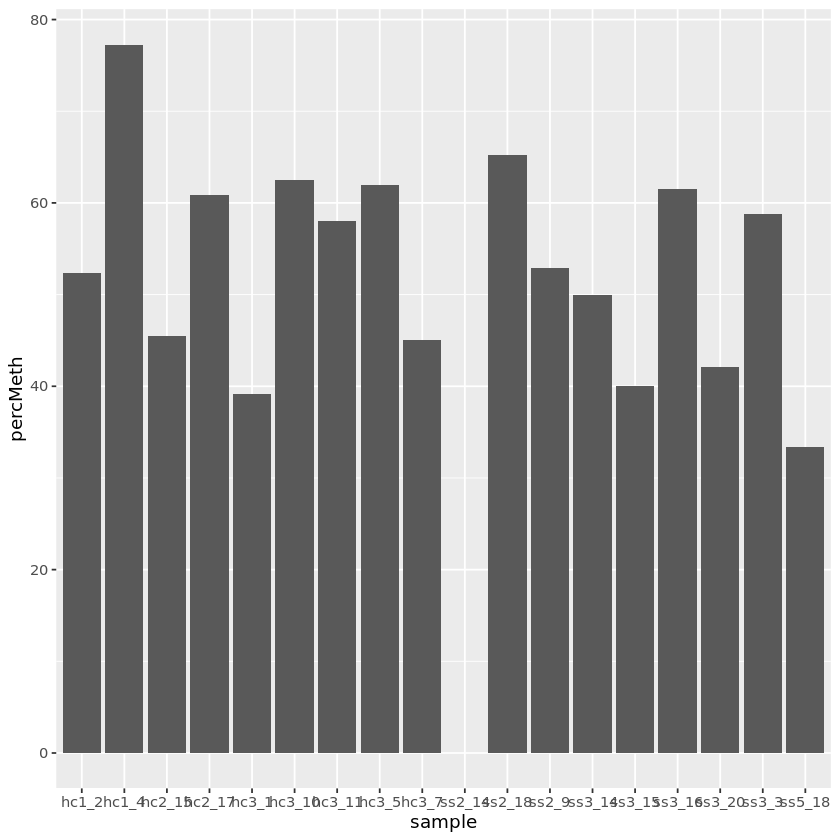

In [4]:
# Calculate % methylation for each bin
perc_meth <- meth_filter_reshaped %>% 
   group_by(site, sample, chr, start, end,population,percMeth) %>%
   dplyr::summarise(n())  

# check a couple loci to make sure % methylation is calculated separately for each sample and gene region 
perc_meth %>% filter(site=="Contig0_39226_39226") %>% ggplot(aes(x=sample, y=percMeth)) + geom_bar(stat="identity")

In [30]:

dc <- dcast(perc_meth,site~sample, value.var="percMeth")
colnames(dc) <- c("id",colnames(dc)[-1])
dc <- dc[,c("id",mbdorder)]
write.table(dc,paste0(mQTL,"meth_filter_allsites.tab"),sep="\t",row.names = F,quote = F)
head(dc)

id                  hc1_2     hc1_4     hc2_15    hc2_17    hc3_1    
1 Contig0_39226_39226  52.38095  77.27273  45.45455  60.86957  39.13043
2 Contig0_39234_39234  41.66667  25.92593  37.03704  19.23077  42.85714
3 Contig0_64179_64179  90.00000  71.42857        NA  94.44444  72.72727
4 Contig0_71523_71523 100.00000 100.00000 100.00000  88.88889  80.00000
5 Contig0_71533_71533 100.00000 100.00000  92.85714 100.00000 100.00000
6 Contig0_71542_71542  93.75000 100.00000 100.00000 100.00000 100.00000
  hc3_5     hc3_7     hc3_10    hc3_11    ss2_9     ss2_14    ss2_18   
1  61.90476  45.00000  62.50000  58.06452  52.94118        NA  65.21739
2  44.00000  30.43478  33.33333  22.22222  36.84211        NA  34.48276
3 100.00000  38.46154  91.66667  61.53846        NA        NA  73.68421
4        NA  63.63636 100.00000  93.75000  82.60870  94.44444 100.00000
5 100.00000  76.47059 100.00000 100.00000 100.00000 100.00000  88.23529
6 100.00000 100.00000  91.66667 100.00000 100.00000 100.00000 100.00000
  ss3_3     ss3_14   ss3_15   ss3_16    ss3_20    ss5_18   
1  58.82353 50.00000 40.00000  61.53846  42.10526  33.33333
2  42.10526 41.66667 48.00000  29.41176  52.17391  31.25000
3  72.72727 76.19048 87.50000 100.00000 100.00000  46.66667
4  84.61538 85.71429 87.09677  85.71429  82.35294 100.00000
5  96.66667 95.23810 94.11765  95.23810 100.00000  95.65217
6 100.00000 95.45455 96.77419  90.47619  91.66667  95.45455

In [31]:
dim(dc)

[1] 33738    19

In [32]:
myRN <- function(x){
    
    y <- x[2:19][!is.na(x[2:19])]
    n <- length(y)
    k = 0.375  
  # Ranks.
      r <- rank(y)
  
  # Apply transformation.
    out <- qnorm((r - k) / (n - 2 * k + 1))
    x[2:19][!is.na(x[2:19])] <- out
    return(x)
}


In [33]:
df_list <- lapply(1:nrow(dc), function(r_num) { myRN(dc[r_num, ]) })
dcN<- do.call(rbind, df_list)

In [16]:
write.table(dcN,paste0(mQTL,"meth_filter_allsites_RankNorm.tab"),sep="\t",row.names = F,quote = F)
head(dcN)

id                  hc1_2      hc1_4      hc2_15     hc2_17     hc3_1     
1 Contig0_39226_39226 -0.1458270  1.7961934 -0.4507442  0.4507442 -1.3153098
2 Contig0_39234_39234  0.3716615 -1.0271543  0.1458270 -1.7961934  0.8059185
3 Contig0_64179_64179  0.3348942 -0.7137046         NA  0.7137046 -0.4232249
4 Contig0_71523_71523  0.9109555  0.9109555  0.9109555  0.0000000 -1.3153098
5 Contig0_71533_71533  0.5804016  0.5804016 -1.0632442  0.5804016  0.5804016
6 Contig0_71542_71542 -0.8465244  0.5009045  0.5009045  0.5009045  0.5009045
  hc3_5     hc3_7      hc3_10     hc3_11     ss2_9      ss2_14    ss2_18    
1 0.8059185 -0.6185211  1.0271543  0.1458270  0.0000000        NA  1.3153098
2 1.0271543 -0.6185211 -0.2948402 -1.3153098  0.0000000        NA -0.1458270
3 1.2450462 -1.7393842  0.5149938 -0.9457771         NA        NA -0.1651163
4        NA -1.7961934  0.9109555  0.1458270 -0.8059185 0.2948402  0.9109555
5 0.5804016 -1.8217485  0.5804016  0.5804016  0.5804016 0.5804016 -1.3466835
6 0.5009045  0.5009045 -1.1929813  0.5009045  0.5009045 0.5009045  0.5009045
  ss3_3      ss3_14     ss3_15     ss3_16     ss3_20     ss5_18    
1  0.2948402 -0.2948402 -1.0271543  0.6185211 -0.8059185 -1.7961934
2  0.6185211  0.3716615  1.3153098 -0.8059185  1.7961934 -0.4507442
3 -0.4232249  0.0000000  0.1651163  1.2450462  1.2450462 -1.2450462
4 -0.6185211 -0.3716615 -0.1458270 -0.3716615 -1.0271543  0.9109555
5 -0.2075038 -0.5804016 -0.8465244 -0.5804016  0.5804016 -0.3504148
6  0.5009045 -0.5804016 -0.3504148 -1.8217485 -1.1929813 -0.5804016

In [34]:
# get meth position file
dcN <- as.data.frame(dcN,stringsAsFactors = F)
chr = sapply(strsplit(dcN$id,"_"), '[',1)
s1 = as.numeric(sapply(strsplit(dcN$id,"_"), '[',2))
s2 = as.numeric(sapply(strsplit(dcN$id,"_"), '[',3))
methpos <- as.data.frame(cbind(dcN$id,chr,s1,s2),stringsAsFactors = F)
methpos$s1 <- as.numeric(methpos$s1)
methpos$s2 <- as.numeric(methpos$s2)
colnames(methpos) <- c('geneid','chr','s1','s2')
head(methpos)
write.table(methpos,file=paste0(mQTL,"methsitespos_mqtl.tab"),quote = F,row.names = F,sep = "\t")

geneid              chr     s1    s2   
1 Contig0_39226_39226 Contig0 39226 39226
2 Contig0_39234_39234 Contig0 39234 39234
3 Contig0_64179_64179 Contig0 64179 64179
4 Contig0_71523_71523 Contig0 71523 71523
5 Contig0_71533_71533 Contig0 71533 71533
6 Contig0_71542_71542 Contig0 71542 71542

In [35]:
bed <- cbind(chr,s1,s2, dc$id)
write.table(bed,file=paste0(mQTL,"methsitepos_mqtl.BED"),quote = F,row.names = F,col.names=F,sep = "\t")

In [20]:
pca <- as.matrix(read.table("../analyses/2bRAD/PCA_MBD.tab"))
rownames(pca) <- mbdorder
head(pca)

Axis1     Axis2      Axis3      Axis4     Axis5     Axis6      
hc1_2  -30.85435  62.502919 -39.126699 -6.682553  8.322146  -0.7086301
hc1_4  -36.76328 -28.075423  -8.433215  7.664743 -1.618463 -31.0590303
hc2_15 -19.18685  -5.184282   7.364130 13.135168 -4.388550  12.5090228
hc2_17 -40.20686 -36.105270 -12.322371  9.687674  2.635277 -58.6181161
hc3_1  -37.82643 -36.942524  -5.509531  1.518255 -4.692239  48.6833461
hc3_5  -30.14360  55.023133 -36.232789 -5.362076  1.008838  -0.7074565
       Axis7      Axis8       Axis9       Axis10    
hc1_2   17.317525   0.2936824   0.8989264 -0.4304196
hc1_4   -9.857334  -8.3973498 -27.8566307 -0.9438271
hc2_15 -22.747310  24.8400420 -65.7538216 13.3349372
hc2_17 -13.758874 -23.7416069  23.5703357 -6.2352104
hc3_1   23.362380   9.7129216  21.5883136 -3.5359827
hc3_5   14.193249  -9.9157602  -3.6163448  3.2526797

In [21]:
# covariate
id = mbdorder
covariate <- rbind(id,t(pca[,1:3]))
write.table(covariate,paste0(mQTL,"covariate_PCA.tab"),sep="\t",row.names=T,quote=F, col.names=F)

In [22]:
js("cat ../analyses/2bRAD/mQTL/covariate_PCA.tab")

id	hc1_2	hc1_4	hc2_15	hc2_17	hc3_1	hc3_5	hc3_7	hc3_10	hc3_11	ss2_9	ss2_14	ss2_18	ss3_3	ss3_14	ss3_15	ss3_16	ss3_20	ss5_18
Axis1	-30.8543488156875	-36.7632815520323	-19.1868459086878	-40.2068600553614	-37.8264309307188	-30.1435952942239	-43.147805064287	-17.1723893577857	-19.2105366809675	32.1947376175343	32.1172093930606	37.9439432633294	46.4649184865142	38.2455275871164	4.05428367372196	32.3602240933444	5.85256860489092	45.2786809402398
Axis2	62.5029187081274	-28.0754231683899	-5.18428177862099	-36.1052703640299	-36.9425235689188	55.0231331543907	-40.1710197533959	33.7748409144085	6.78545360109611	-0.74738750177114	-0.40058296272575	-7.4312127359522	-5.83359739260907	-7.36625377184771	26.7017972049959	-4.00565592110267	-1.10587050768295	-11.419064155972
Axis3	-39.1266989566545	-8.43321512801454	7.36412985077157	-12.3223707969935	-5.5095307711699	-36.2327888745743	-7.61175942057101	24.5313250984492	48.3586753838834	-7.02619515527421	-3.77094356512209	-9.53265297227056	-16.2836332825772

In [45]:
js("bedtools window -w 50000 -u -a ../analyses/2bRAD/mQTL/snppos_mqtl_05_m2pop.BED -b ../analyses/2bRAD/mQTL/methsitepos_mqtl.BED > ../analyses/2bRAD/mQTL/snpAmethB_50kb.txt")

In [46]:
js("bedtools window -w 50000 -u -b ../analyses/2bRAD/mQTL/snppos_mqtl_05_m2pop.BED -a ../analyses/2bRAD/mQTL/methsitepos_mqtl.BED > ../analyses/2bRAD/mQTL/snpBmethA_50kb.txt")

In [47]:
# how many SNPs are within 50kb of a methylated site
js("wc -l ../analyses/2bRAD/mQTL/snpAmethB_50kb.txt")

349 ../analyses/2bRAD/mQTL/snpAmethB_50kb.txt


In [48]:
#how many mbd sites within 50kb of a SNP
js("wc -l ../analyses/2bRAD/mQTL/snpBmethA_50kb.txt")

1509 ../analyses/2bRAD/mQTL/snpBmethA_50kb.txt


In [16]:
js("head ../analyses/2bRAD/mQTL/snpBmethA_50kb.txt")

Contig0	64179	64179	Contig0_64179_64179
Contig0	71523	71523	Contig0_71523_71523
Contig0	71533	71533	Contig0_71533_71533
Contig0	71542	71542	Contig0_71542_71542
Contig0	71546	71546	Contig0_71546_71546
Contig0	71558	71558	Contig0_71558_71558
Contig0	71563	71563	Contig0_71563_71563
Contig0	71617	71617	Contig0_71617_71617
Contig0	71647	71647	Contig0_71647_71647
Contig0	71667	71667	Contig0_71667_71667


## Run eQTL

In [ ]:
# set parameters
useModel = modelLINEAR
snpfile = paste0(mQTL,"MBD_HCSS_Afilt32m70_maf05_m2pop_format.tab")
methfile = paste0(mQTL,"meth_filter_allsites_RankNorm.tab")
covfile = paste0(mQTL,"covariate_PCA.tab")

snposfile = paste0(mQTL,"snppos_mqtl_05_m2pop.tab")

pvOutputThresholdcis = 0.05
pvOutputThresholdtrans = 0.01
output_file_name_cis = paste0(mQTL,"mQTL_sites_cis50kb_p05_maf05.txt")
output_file_name_tra = paste0(mQTL,"mQTL_sites_trans50kb_p01_maf05.txt")
#errorCovariance = rab2;
errorCovariance = numeric()
# Distance for local gene-SNP pairs
cisDist = 50000  #50kb

In [30]:
snps = SlicedData$new();
snps$fileDelimiter = "\t";      # the TAB character
snps$fileOmitCharacters = "NA"; # denote missing values;
snps$fileSkipRows = 1;          # one row of column labels
snps$fileSkipColumns = 1;       # one column of row labels
snps$fileSliceSize = 2000;      # read file in pieces of 2,000 rows
snps$LoadFile( snpfile )

Rows read: 2,000

Rows read: 2860 done.



In [31]:
meth = SlicedData$new();
meth$fileDelimiter = "\t";      # the TAB character
meth$fileOmitCharacters = "NA"; # denote missing values;
meth$fileSkipRows = 1;          # one row of column labels
meth$fileSkipColumns = 1;       # one column of row labels
meth$fileSliceSize = 2000;      # read file in pieces of 2,000 rows
meth$LoadFile( methfile )

Rows read: 2,000

Rows read: 4,000

Rows read: 6,000

Rows read: 8,000

Rows read: 10,000

Rows read: 12,000

Rows read: 14,000

Rows read: 16,000

Rows read: 18,000

Rows read: 20,000

Rows read: 22,000

Rows read: 24,000

Rows read: 26,000

Rows read: 28,000

Rows read: 30,000

Rows read: 32,000

Rows read: 33738 done.



In [32]:
cvrt = SlicedData$new();
cvrt$fileDelimiter = "\t";      # the TAB character
cvrt$fileOmitCharacters = "NA"; # denote missing values;
cvrt$fileSkipRows = 1;          # one row of column labels
cvrt$fileSkipColumns = 1;       # one column of row labels
cvrt$fileSliceSize = 2000;      # read file in pieces of 2,000 rows
cvrt$LoadFile( covfile )

Rows read: 3 done.



In [33]:
## Run the analysis

meS = Matrix_eQTL_main(
snps = snps, 
gene = meth, 
cvrt = cvrt,
output_file_name     = output_file_name_tra,
pvOutputThreshold     = pvOutputThresholdtrans,
useModel = useModel, 
errorCovariance = errorCovariance, 
verbose = TRUE, 
output_file_name.cis = output_file_name_cis,
pvOutputThreshold.cis = pvOutputThresholdcis,
snpspos = snppos, 
genepos = methpos,
cisDist = cisDist,
pvalue.hist = "qqplot",
min.pv.by.genesnp = TRUE,
noFDRsaveMemory = FALSE);

unlink(output_file_name_tra);
unlink(output_file_name_cis);

Matching data files and location files

33738 of 33738 genes matched

2860 of 2860 SNPs matched


Task finished in 0.02 seconds

Reordering genes

Task finished in 0.757 seconds

Processing covariates

Task finished in 0.004 seconds

Processing gene expression data (imputation, residualization)

Task finished in 0.101 seconds

Creating output file(s)

Task finished in 0.058 seconds

Performing eQTL analysis

 2.94% done, 125 cis-eQTLs, 41,036 trans-eQTLs

 5.88% done, 83,789 trans-eQTLs

 8.82% done, 126,145 trans-eQTLs

11.76% done, 168,123 trans-eQTLs

14.70% done, 209,968 trans-eQTLs

17.64% done, 251,681 trans-eQTLs

20.58% done, 293,772 trans-eQTLs

23.52% done, 335,429 trans-eQTLs

26.47% done, 377,905 trans-eQTLs

29.41% done, 420,151 trans-eQTLs

32.35% done, 461,945 trans-eQTLs

35.29% done, 503,633 trans-eQTLs

38.23% done, 545,697 trans-eQTLs

41.17% done, 588,380 trans-eQTLs

44.11% done, 630,214 trans-eQTLs

47.05% done, 671,873 trans-eQTLs

50.00% done, 708,415 trans-eQTL

In [34]:
save(meS,file=paste0(mQTL,"../analyses/2bRAD/mQTL/MBD_HCSS_Afilt32m70_maf05_m2pop_sites50k_mQTL_RNPCA"))

In [36]:
load(file="../analyses/2bRAD/mQTL/MBD_HCSS_Afilt32m70_maf05_m2pop_sites50k_mQTL_RNPCA")

In [5]:
cat('Detected local eQTLs:', '\n');
show(meS$cis$eqtls)

Detected local eQTLs: 
                 snps                    gene statistic       pvalue       FDR
1   Contig23237_49982 Contig23237_57166_57166  5.587457 0.0000880937 0.1774207
2     Contig173_30957   Contig173_13455_13455  5.065145 0.0002166007 0.2181169
3    Contig41076_7787 Contig41076_12546_12546 -4.690876 0.0004221172 0.2833814
4    Contig31124_7124   Contig31124_5961_5961 -4.371137 0.0007568777 0.3527464
5    Contig22638_9028 Contig22638_10260_10260  4.120183 0.0012066655 0.3527464
6   Contig16063_32110   Contig16063_8644_8644  4.004502 0.0014993174 0.3527464
7     Contig173_30957   Contig173_13500_13500  3.976974 0.0015791189 0.3527464
8    Contig18086_3766   Contig18086_7978_7978  3.909024 0.0017952674 0.3527464
9   Contig22376_16338 Contig22376_29832_29832 -3.906774 0.0018029230 0.3527464
10   Contig54642_5622   Contig54642_8433_8433 -3.851874 0.0020004095 0.3527464
11  Contig18485_58501 Contig18485_38915_38915 -3.841248 0.0020411193 0.3527464
12   Contig43574_3303   Conti

In [31]:
cat('Detected distant eQTLs:', '\n');
head(meS$trans$eqtls)

Detected distant eQTLs: 


snps              gene                  statistic pvalue        FDR          
1 Contig23564_3850  Contig41436_9662_9662       Inf 2.225074e-308 5.367360e-301
2 Contig47140_12962 Contig41436_9662_9662       Inf 2.225074e-308 5.367360e-301
3 Contig47538_11559 Contig41436_9662_9662       Inf 2.225074e-308 5.367360e-301
4 Contig77937_5842  Contig72939_1635_1635       Inf 2.225074e-308 5.367360e-301
5 Contig42337_9241  Contig49180_9617_9617 -140.0815  4.705032e-22  7.566372e-15
6 Contig49399_3802  Contig49180_9617_9617 -140.0815  4.705032e-22  7.566372e-15
  beta      
1  0.9452387
2  0.9452387
3  0.9452387
4  0.9452387
5 -0.9270149
6 -0.9270149

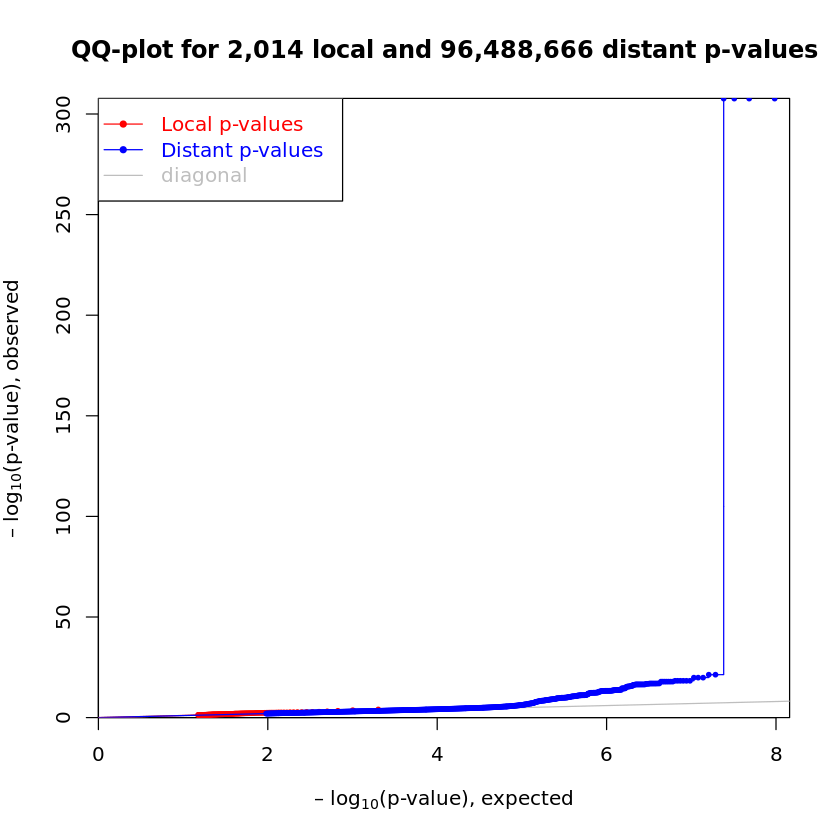

In [32]:
plot(meS)

### looking at trans genes that are highly sih

In [6]:
meS$trans$neqtls

[1] 1011397

In [19]:
sigtrans <- meS$trans$eqtls[which(meS$trans$eqtls$FDR < 0.05),]
# Calculate mean p-value for each sig trans meth site
mean_sigtrans <- sigtrans %>% 
   group_by(gene) %>%
   dplyr::summarise(
    mean_fdr= mean(FDR, na.rm=TRUE),
    mean_beta= mean(beta,na.rm=TRUE),
    n())  
dim(mean_sigtrans)

[1] 362   4

In [11]:
dim(sigtrans)

[1] 956   6

In [35]:
mean(mean_sigtrans$`n()`)

[1] 2.640884

In [36]:
trans_snps <- meS$trans$eqtls[which(meS$trans$eqtls$FDR < 0.05),] %>%
group_by(snps) %>%
dplyr::summarise(
    mean_fdr= mean(FDR, na.rm=TRUE),
    mean_beta= mean(beta,na.rm=TRUE),
    n()) 
 
dim(trans_snps)

`summarise()` ungrouping output (override with `.groups` argument)



[1] 501   4

In [37]:
mean(trans_snps$`n()`)

[1] 1.908184

* 362 methylated sites out of 33738 total sites have at least 1 trans (> 50kb away) SNP that is statistically linked (FDR < 5%). Mean 2.6 SNPs are significantly associated with each site. 501 SNPs are associated with at least 1 site, mean 1.7 sites per SNP. (RN, PCA1-3)  
357,471

In [38]:
head(mean_sigtrans[order(mean_sigtrans$mean_beta,decreasing = T),],n = 20)

gene                    mean_fdr     mean_beta n()
1  Contig79433_1055_1055   1.323645e-02 -2.633845 5  
2  Contig63796_1551_1551   4.952728e-02 -2.504410 5  
3  Contig39791_2833_2833   3.231790e-02 -2.149910 1  
4  Contig15905_197_197     7.965927e-03 -2.115325 1  
5  Contig127394_5049_5049  3.336056e-02 -2.040962 1  
6  Contig15442_1263_1263   3.398264e-02 -1.991751 1  
7  Contig59750_857_857     3.656455e-03 -1.906416 1  
8  Contig36016_6368_6368   1.108780e-02 -1.873013 2  
9  Contig62898_1215_1215   2.986287e-02 -1.831863 3  
10 Contig3543_2789_2789    1.144877e-02 -1.830747 2  
11 Contig19582_25797_25797 3.595908e-06 -1.774521 3  
12 Contig145739_1095_1095  4.631458e-06 -1.770340 8  
13 Contig44096_7738_7738   3.944548e-05 -1.768967 9  
14 Contig25479_16854_16854 4.538189e-02 -1.766649 1  
15 Contig1493_5046_5046    1.170585e-05 -1.759411 5  
16 Contig42870_15614_15614 2.799286e-02 -1.753516 4  
17 Contig50428_922_922     1.566906e-04 -1.752649 9  
18 Contig54731_3020_3020   9.295545e-06 -1.752482 7  
19 Contig47721_13445_13445 2.474036e-03 -1.737364 1  
20 Contig26944_1491_1491   2.414620e-06 -1.736932 2

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 5 rows containing non-finite values (stat_bindot).”
Warning message:
“Removed 5 rows containing non-finite values (stat_boxplot).”


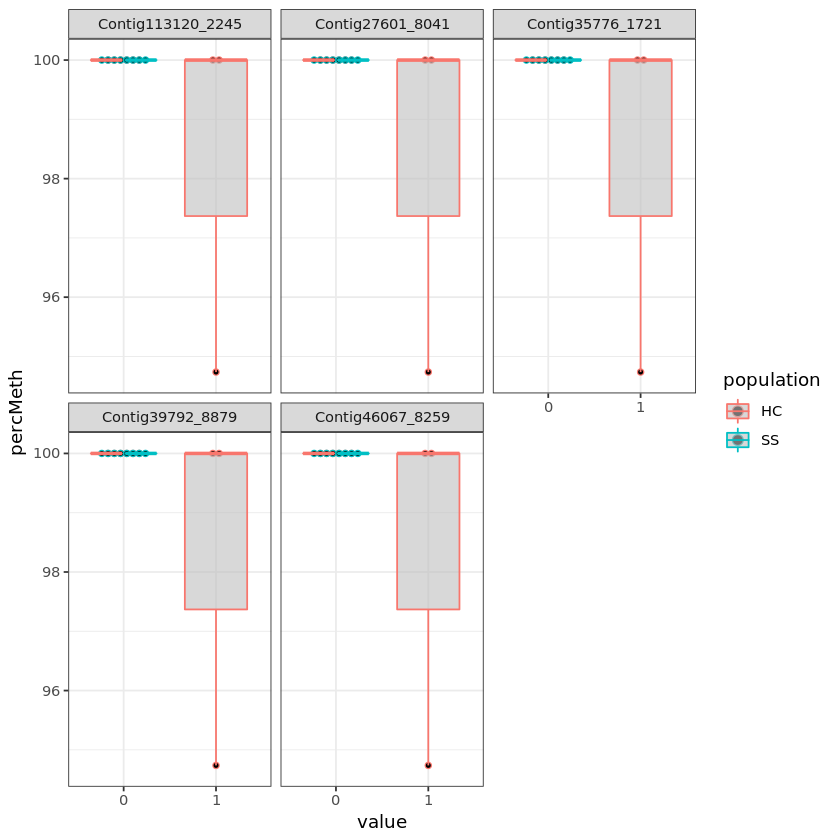

In [39]:
m <- perc_meth %>% filter(site=="Contig79433_1055_1055")
s <- meS$trans$eqtls[which(meS$trans$eqtls$gene == "Contig79433_1055_1055" & meS$trans$eqtls$FDR < 0.05),]$snps

g <- as.data.frame(t(geno[geno$id %in% s,]),stringsAsFactors = F)
colnames(g) <- g[1,]
g$sample <- rownames(g)
g <- g[-1,]
merge(m,g) %>% tidyr::gather("id","value",9:ncol(merge(m,g))) %>%
ggplot(., aes(value, percMeth,colour=population)) + 
        geom_dotplot(binaxis='y', stackdir='center',dotsize=0.6) +
        geom_boxplot(outlier.size=0, alpha=0.6, fill="grey") +
        facet_wrap(~id) + theme_bw()

### Cis snps

In [40]:
meS$cis$neqtls

[1] 134

In [41]:
# Calculate mean p-value for each sig trans meth site
mean_sigcis <- meS$cis$eqtls %>% 
   group_by(gene) %>%
   dplyr::summarise(
    mean_pval= mean(pvalue, na.rm=TRUE),
    mean_beta= mean(beta,na.rm=TRUE),
    n())  
dim(mean_sigcis)

`summarise()` ungrouping output (override with `.groups` argument)



[1] 121   4

In [42]:
mean(mean_sigcis$`n()`)

[1] 1.107438

In [43]:
cis_snps <- meS$cis$eqtls %>%
group_by(snps) %>%
dplyr::summarise(
    mean_pval= mean(pvalue, na.rm=TRUE),
    mean_beta= mean(beta,na.rm=TRUE),
    n()) 
 
dim(cis_snps)

`summarise()` ungrouping output (override with `.groups` argument)



[1] 96  4

In [44]:
mean(cis_snps$`n()`)

[1] 1.395833

121 methylated sites out of 33738 total sites have at least 1 cis (< 50kb away) SNP that is statistically linked (pvalue < 0.05). Mean 1.1 SNPs are significantly associated with each bin. 96 SNPs are associated with at least 1 site, mean 1.4 sites per SNP.  

In [45]:
show(meS$cis$eqtls)

                 snps                    gene statistic       pvalue       FDR
1   Contig23237_49982 Contig23237_57166_57166  5.587457 0.0000880937 0.1774207
2     Contig173_30957   Contig173_13455_13455  5.065145 0.0002166007 0.2181169
3    Contig41076_7787 Contig41076_12546_12546 -4.690876 0.0004221172 0.2833814
4    Contig31124_7124   Contig31124_5961_5961 -4.371137 0.0007568777 0.3527464
5    Contig22638_9028 Contig22638_10260_10260  4.120183 0.0012066655 0.3527464
6   Contig16063_32110   Contig16063_8644_8644  4.004502 0.0014993174 0.3527464
7     Contig173_30957   Contig173_13500_13500  3.976974 0.0015791189 0.3527464
8    Contig18086_3766   Contig18086_7978_7978  3.909024 0.0017952674 0.3527464
9   Contig22376_16338 Contig22376_29832_29832 -3.906774 0.0018029230 0.3527464
10   Contig54642_5622   Contig54642_8433_8433 -3.851874 0.0020004095 0.3527464
11  Contig18485_58501 Contig18485_38915_38915 -3.841248 0.0020411193 0.3527464
12   Contig43574_3303   Contig43574_6730_6730  3.729

In [ ]:
Contig173	13455	13455
Contig31124	5961	5961
Contig173	13500	13500
Contig168159	621	621
Contig82938	2352	2352
Contig39605	22761	22761

In [46]:
head(meS$cis$eqtls)

snps              gene                    statistic pvalue       FDR      
1 Contig23237_49982 Contig23237_57166_57166  5.587457 0.0000880937 0.1774207
2 Contig173_30957   Contig173_13455_13455    5.065145 0.0002166007 0.2181169
3 Contig41076_7787  Contig41076_12546_12546 -4.690876 0.0004221172 0.2833814
4 Contig31124_7124  Contig31124_5961_5961   -4.371137 0.0007568777 0.3527464
5 Contig22638_9028  Contig22638_10260_10260  4.120183 0.0012066655 0.3527464
6 Contig16063_32110 Contig16063_8644_8644    4.004502 0.0014993174 0.3527464
  beta      
1  2.4514475
2  1.7132640
3 -1.3684831
4 -1.3119769
5  0.9181398
6  0.7201244

In [47]:
write.table(meS$cis$eqtls,paste0(mQTL,"mQTL_sites_cis50kb_p05_maf05_2pop_RNPCA.txt"),quote = F,row.names = F)

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



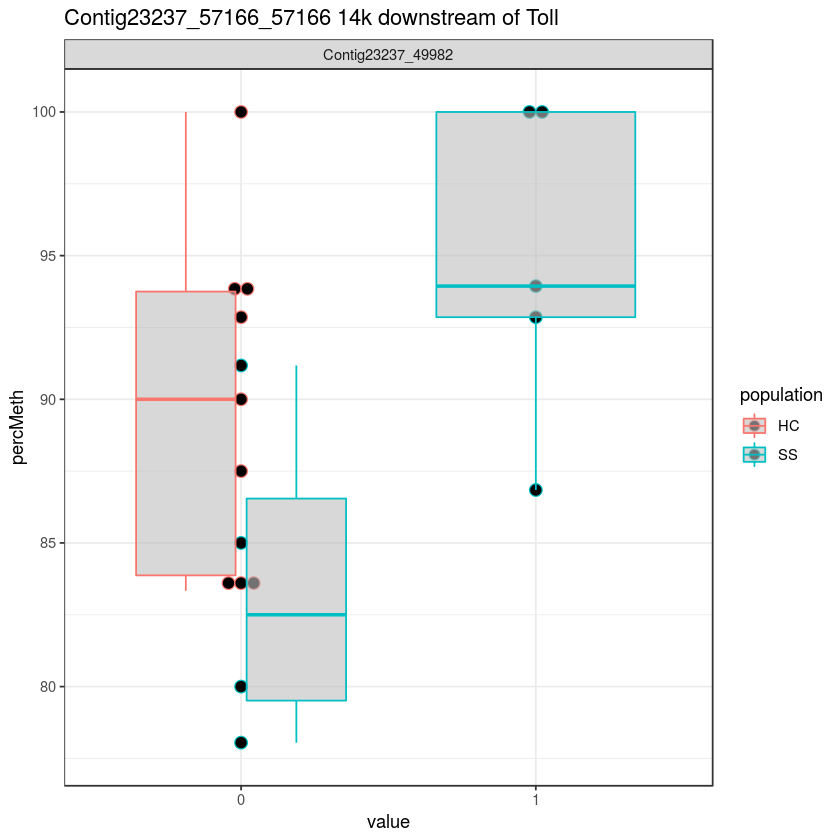

In [22]:
m <- perc_meth %>% filter(site=="Contig23237_57166_57166")
s <- meS$cis$eqtls[which(meS$cis$eqtls$gene == "Contig23237_57166_57166"),]$snps

g <- as.data.frame(t(geno[geno$id %in% s,]),stringsAsFactors = F)
colnames(g) <- g[1,]
g$sample <- rownames(g)
g <- g[-1,]
merge(m,g) %>% tidyr::gather("id","value",9:ncol(merge(m,g))) %>%
ggplot(., aes(value, percMeth,colour=population)) + 
        geom_dotplot(binaxis='y', stackdir='center',dotsize=0.6) +
        geom_boxplot(outlier.size=0, alpha=0.6, fill="grey") +
        facet_wrap(~id) + theme_bw() + ggtitle("Contig23237_57166_57166 14k downstream of Toll ")

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



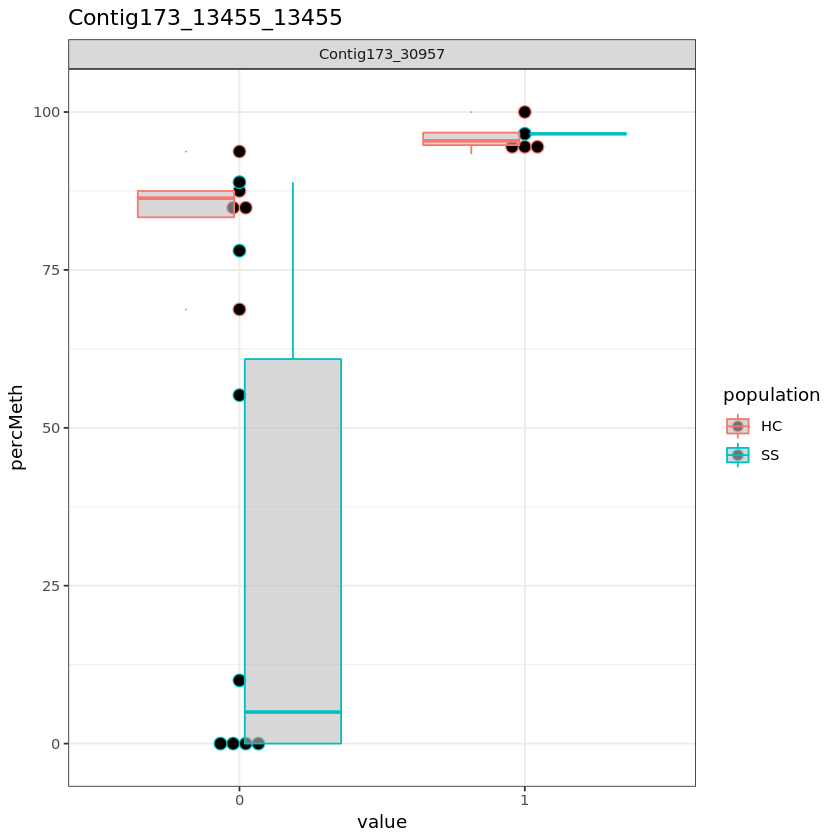

In [49]:
m <- perc_meth %>% filter(site=="Contig173_13455_13455")
s <- meS$cis$eqtls[which(meS$cis$eqtls$gene == "Contig173_13455_13455"),]$snps

g <- as.data.frame(t(geno[geno$id %in% s,]),stringsAsFactors = F)
colnames(g) <- g[1,]
g$sample <- rownames(g)
g <- g[-1,]
merge(m,g) %>% tidyr::gather("id","value",9:ncol(merge(m,g))) %>%
ggplot(., aes(value, percMeth,colour=population)) + 
        geom_dotplot(binaxis='y', stackdir='center',dotsize=0.6,) +
        geom_boxplot(outlier.size=0, alpha=0.6, fill="grey") +
        facet_wrap(~id) + theme_bw() + ggtitle("Contig173_13455_13455")

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 4 rows containing non-finite values (stat_bindot).”
Warning message:
“Removed 4 rows containing non-finite values (stat_boxplot).”


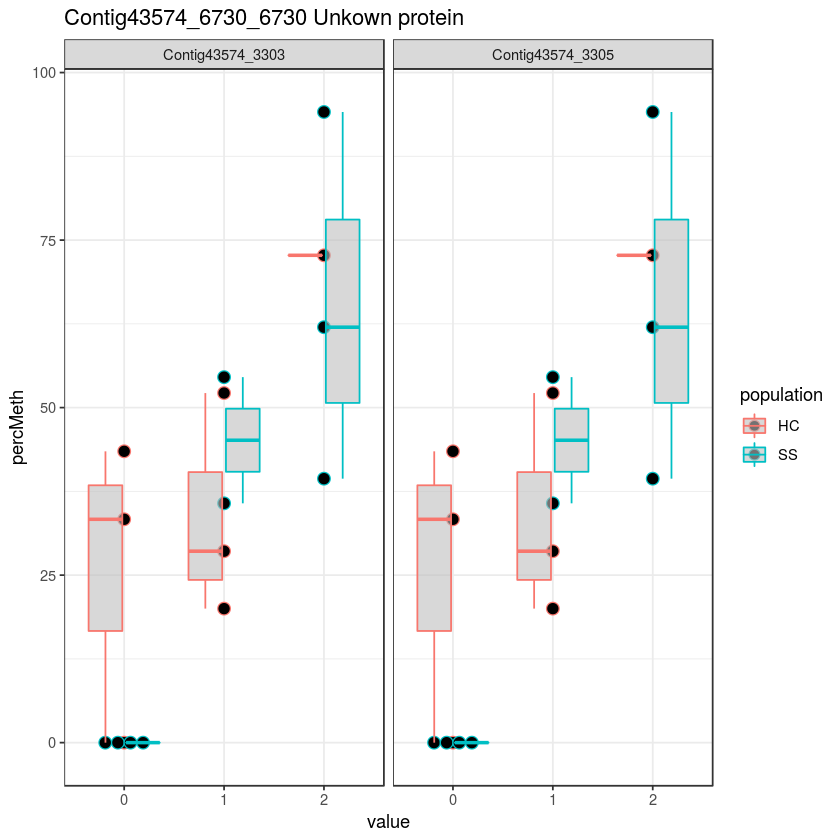

In [21]:
m <- perc_meth %>% filter(site=="Contig43574_6730_6730")
s <- meS$cis$eqtls[which(meS$cis$eqtls$gene == "Contig43574_6730_6730"),]$snps

g <- as.data.frame(t(geno[geno$id %in% s,]),stringsAsFactors = F)
colnames(g) <- g[1,]
g$sample <- rownames(g)
g <- g[-1,]
merge(m,g) %>% tidyr::gather("id","value",9:ncol(merge(m,g))) %>%
ggplot(., aes(value, percMeth,colour=population)) + 
        geom_dotplot(binaxis='y', stackdir='center',dotsize=0.6,) +
        geom_boxplot(outlier.size=0, alpha=0.6, fill="grey") +
        facet_wrap(~id) + theme_bw() + ggtitle("Contig43574_6730_6730 Unkown protein")

### All cis-meQTLs

Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 2 rows containing non-finite values (stat_bindot)."
Warning message:
"Removed 1 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 1 rows containing non-finite values (stat_bindot)."


Warning message:
"Removed 3 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 3 rows containing non-finite values (stat_bindot)."


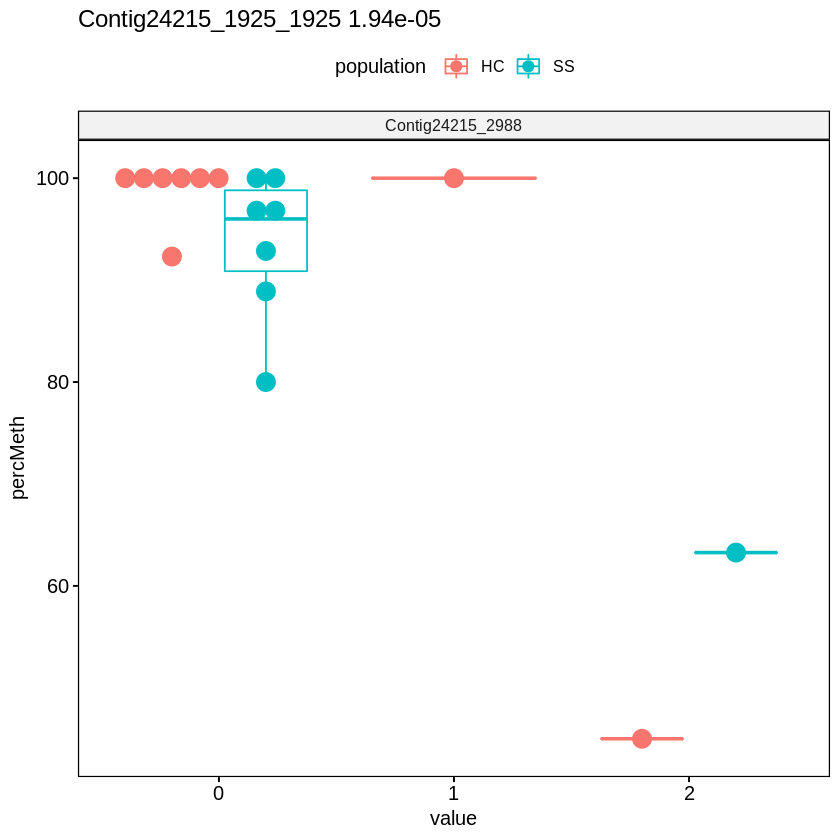

Warning message:
"Removed 3 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 3 rows containing non-finite values (stat_bindot)."


Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 2 rows containing non-finite values (stat_bindot)."


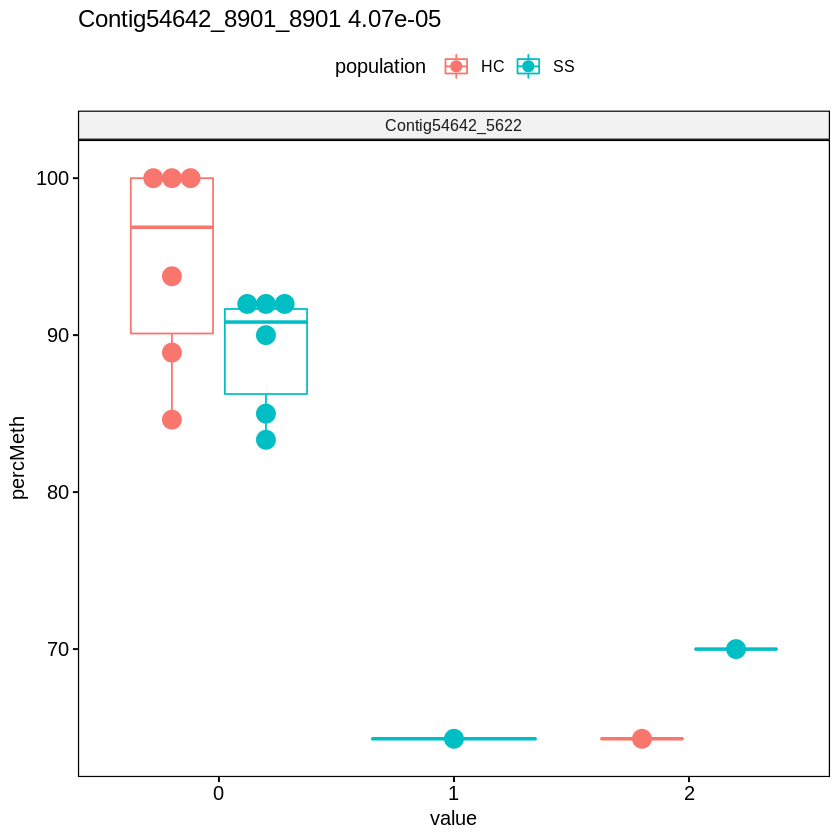

Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 2 rows containing non-finite values (stat_bindot)."


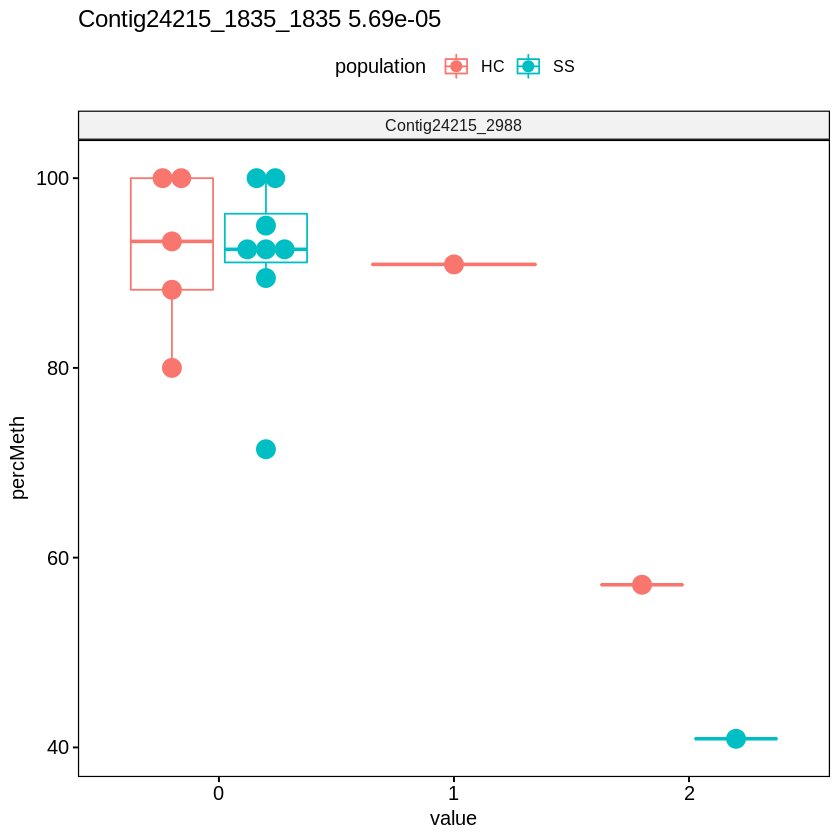

Warning message:
"Removed 6 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 6 rows containing non-finite values (stat_bindot)."


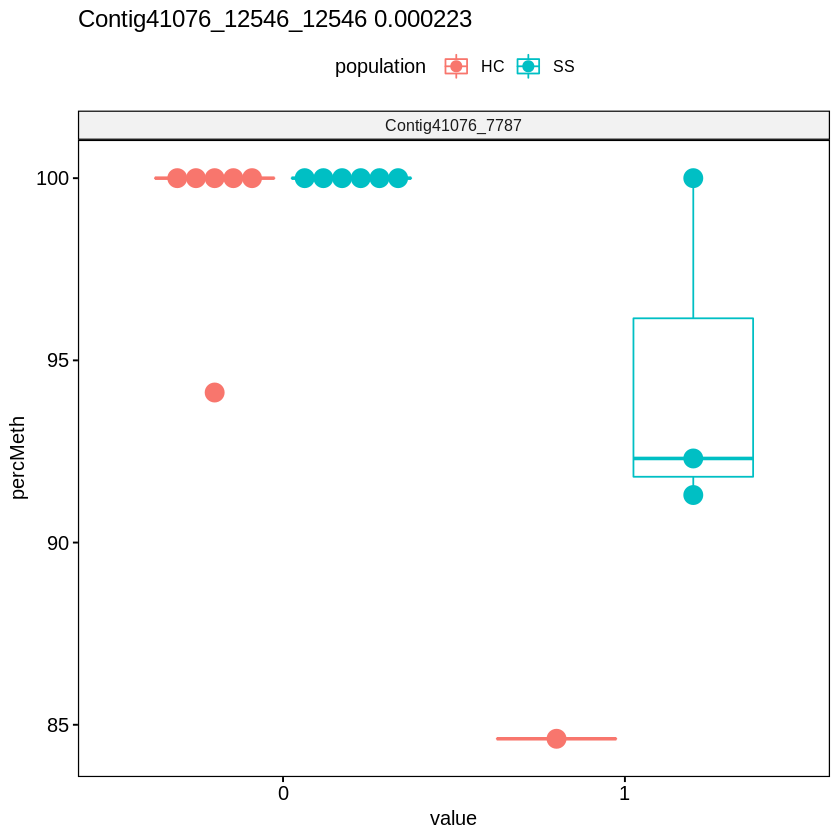

Warning message:
"Removed 1 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 1 rows containing non-finite values (stat_bindot)."


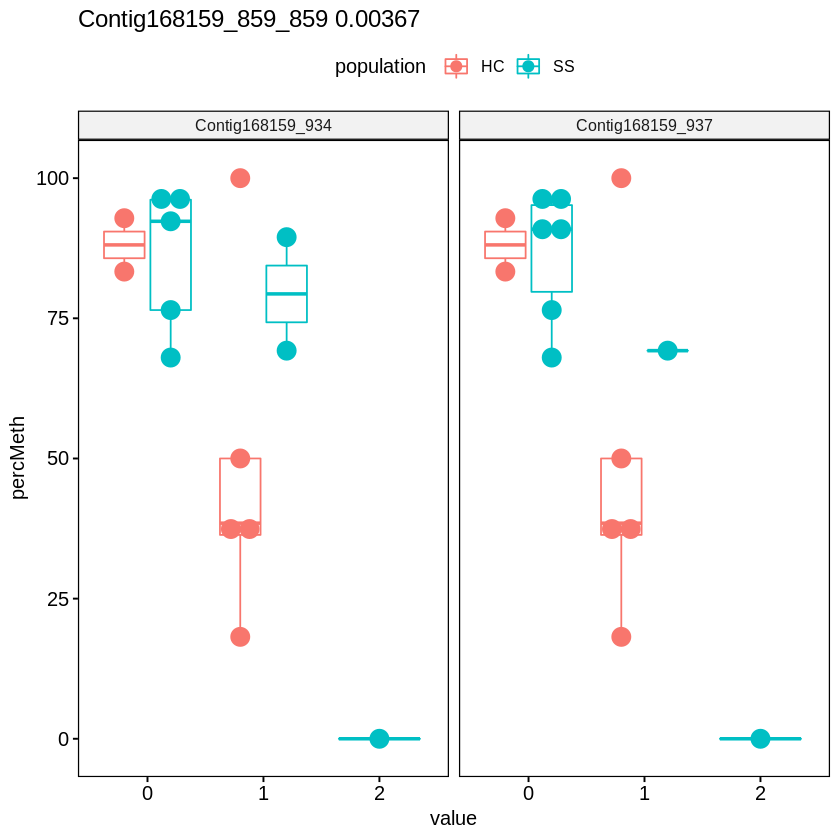

Warning message:
"Removed 12 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 12 rows containing non-finite values (stat_bindot)."


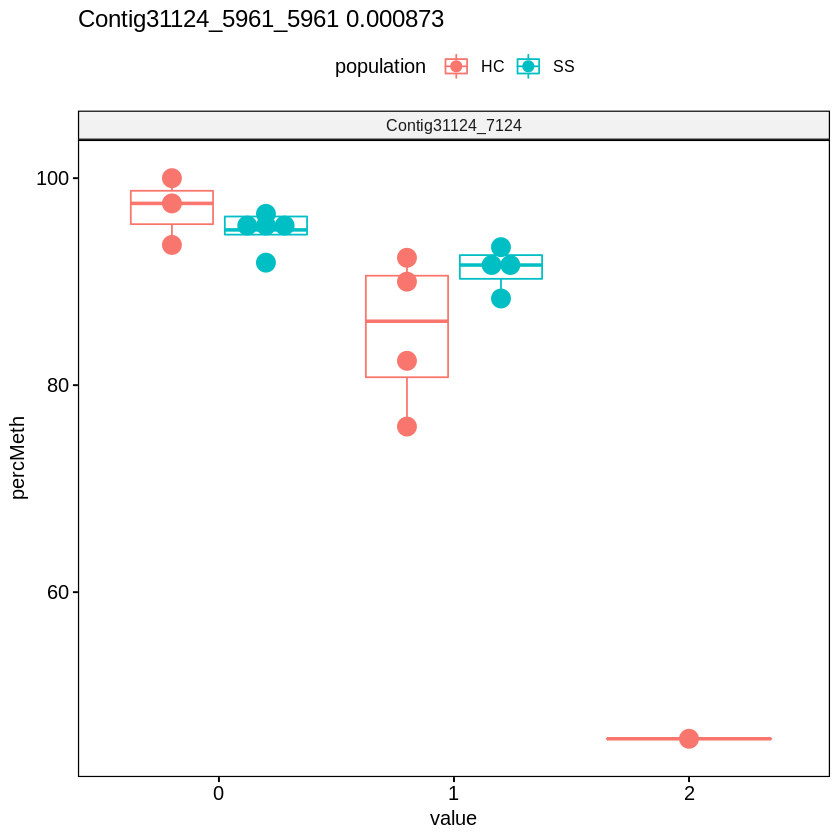

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



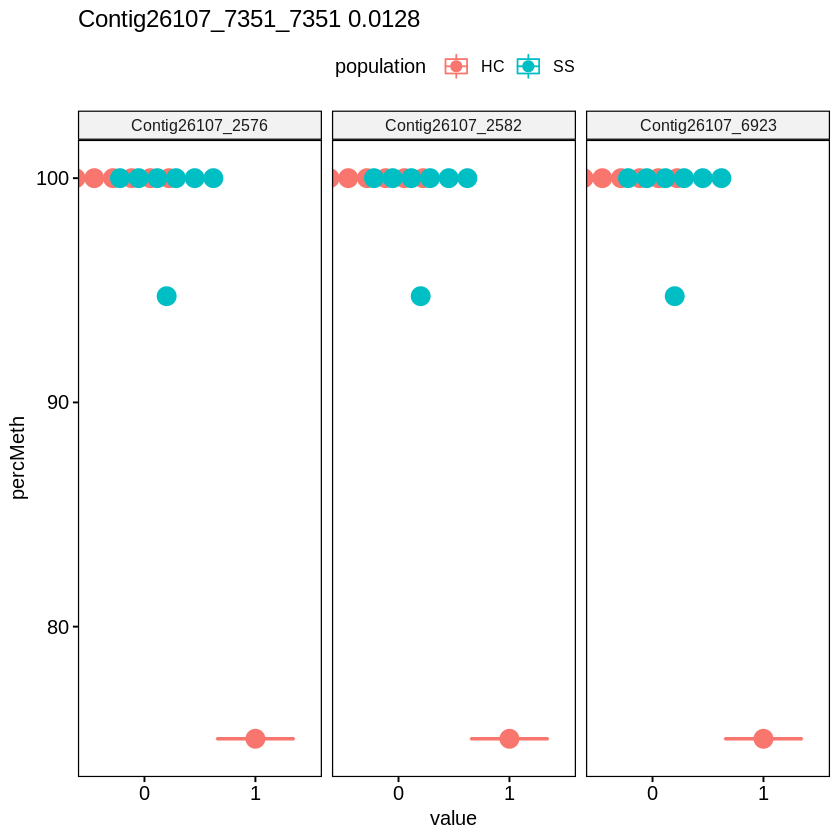

Warning message:
"Removed 4 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 4 rows containing non-finite values (stat_bindot)."


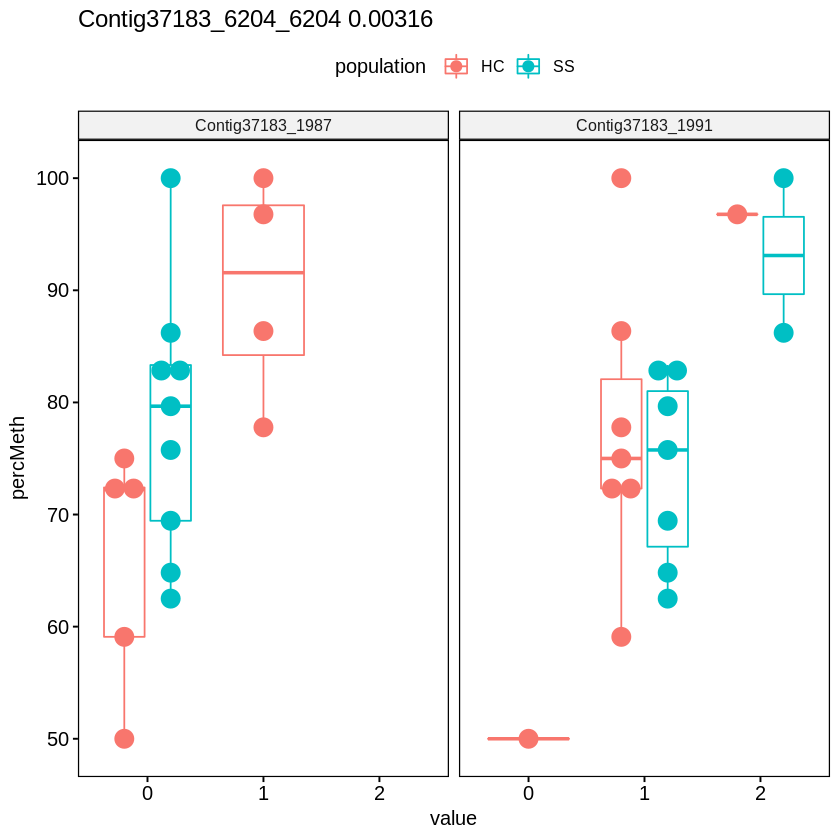

Warning message:
"Removed 3 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 3 rows containing non-finite values (stat_bindot)."


Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 2 rows containing non-finite values (stat_bindot)."


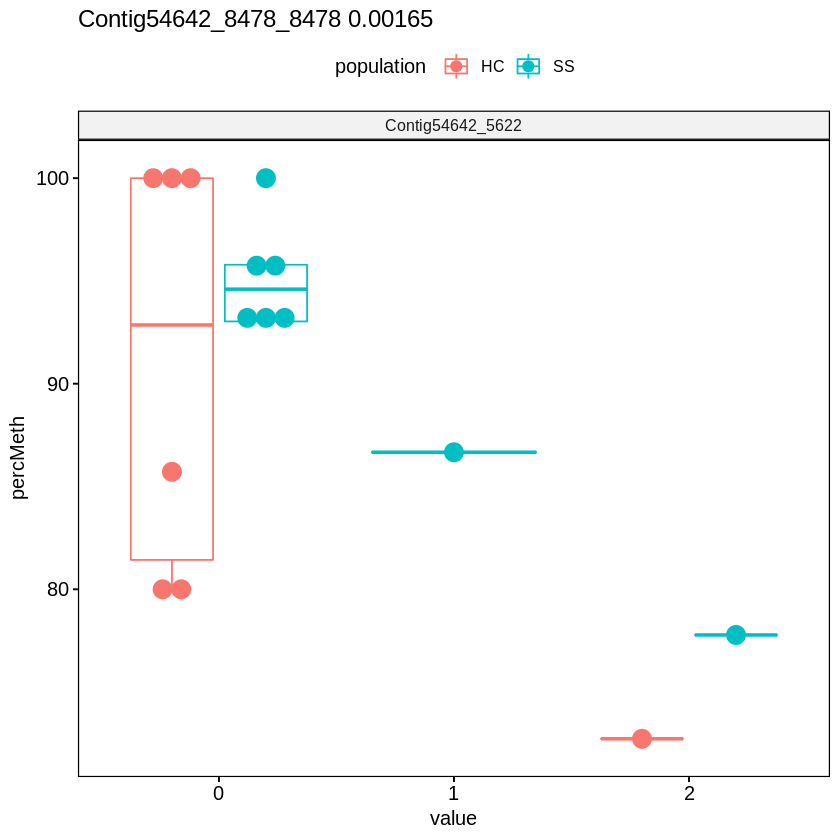

Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 2 rows containing non-finite values (stat_bindot)."


Warning message:
"Removed 4 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 4 rows containing non-finite values (stat_bindot)."


Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 2 rows containing non-finite values (stat_bindot)."


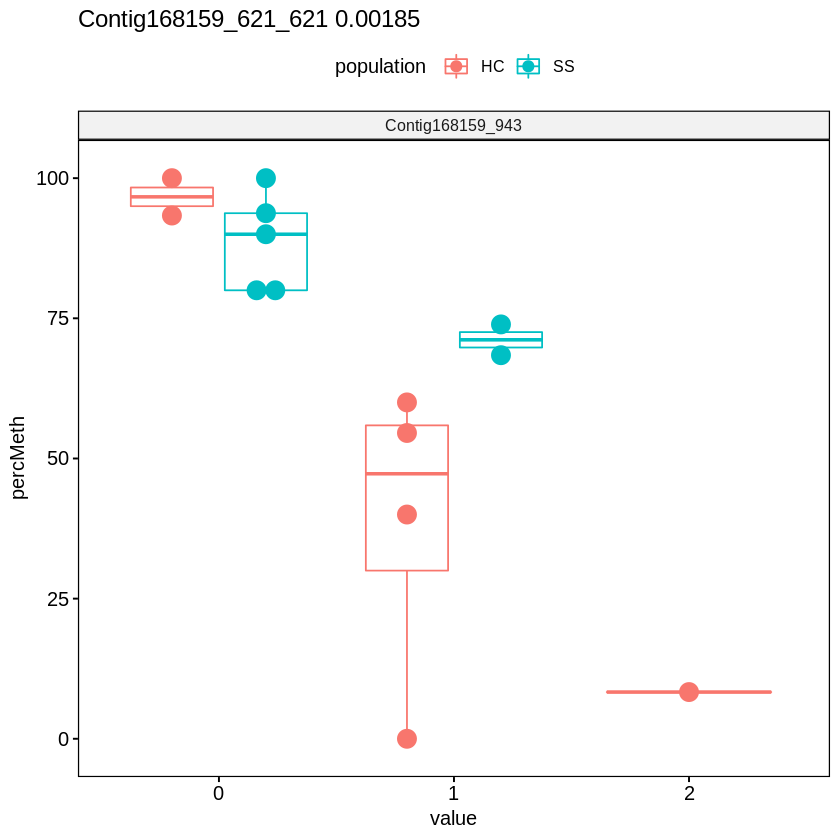

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



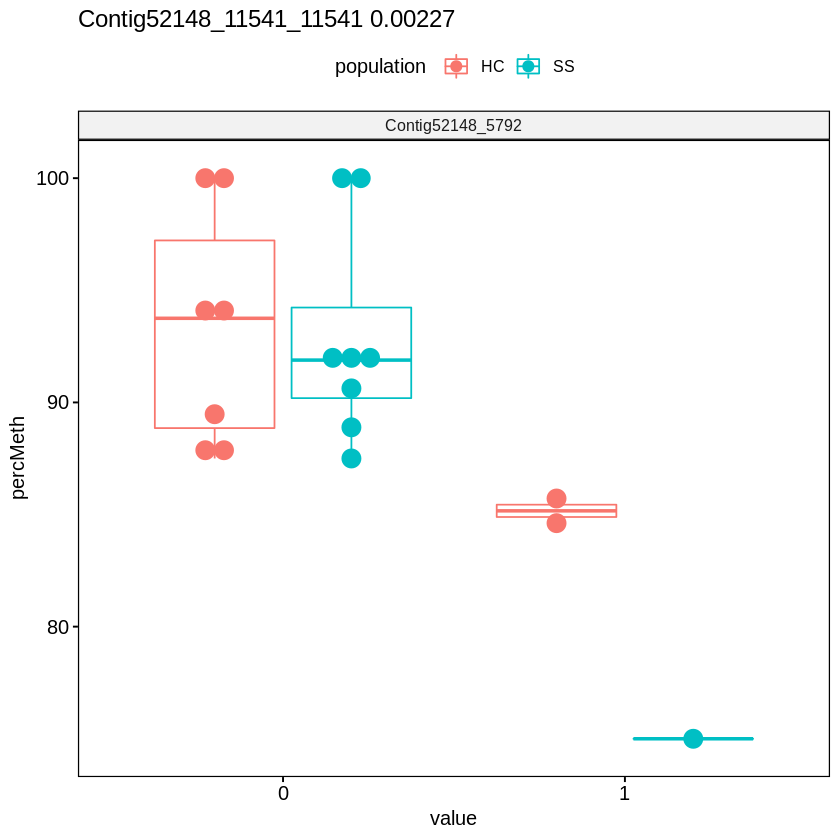

Warning message:
"Removed 4 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 4 rows containing non-finite values (stat_bindot)."


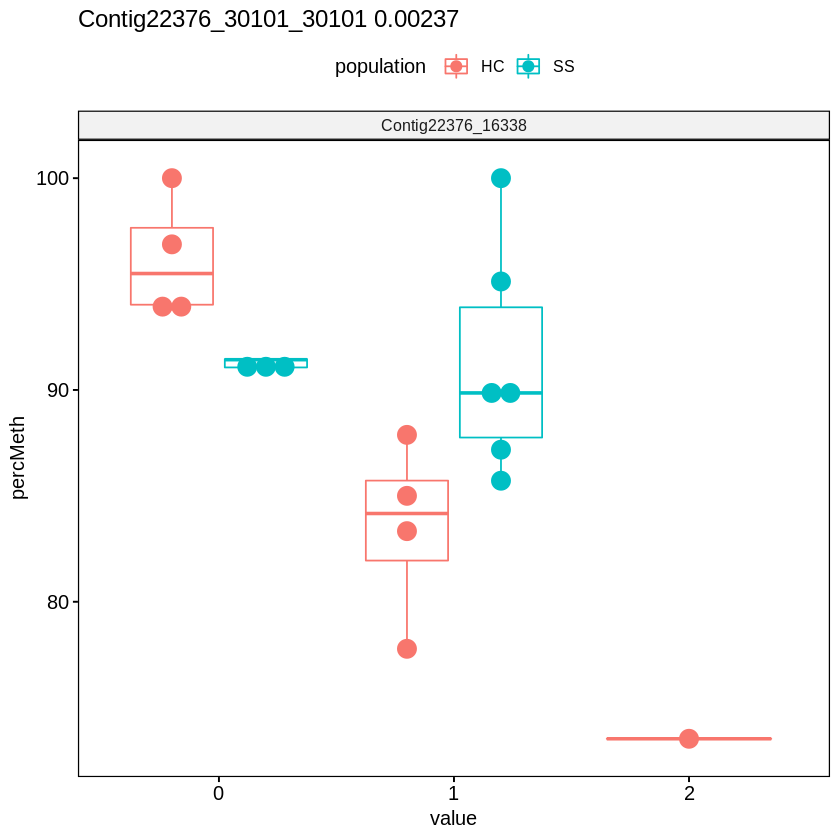

Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 2 rows containing non-finite values (stat_bindot)."


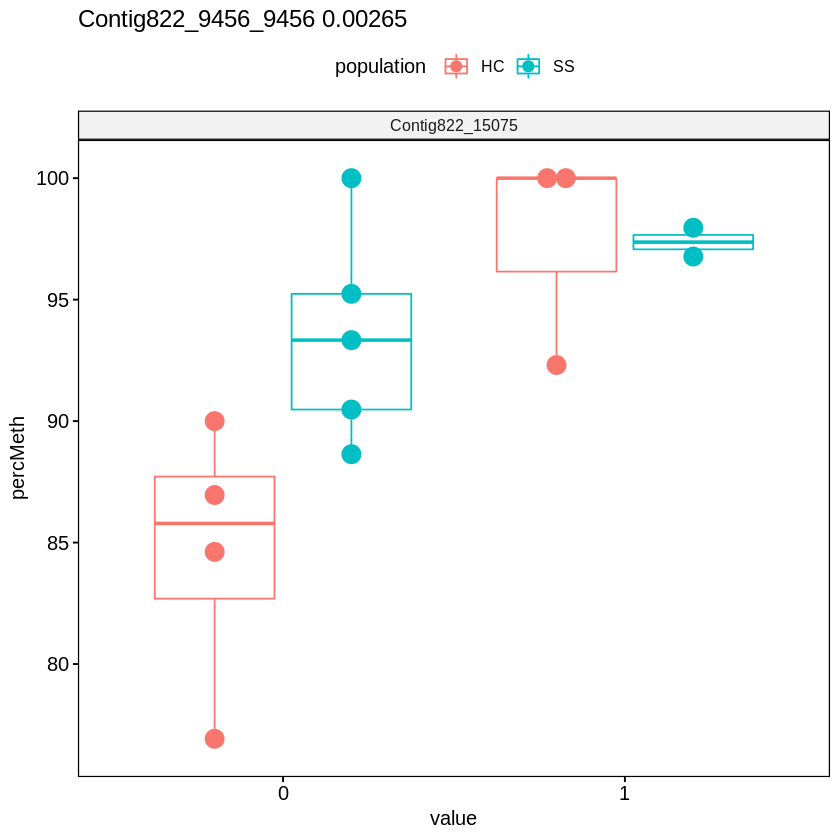

Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 2 rows containing non-finite values (stat_bindot)."


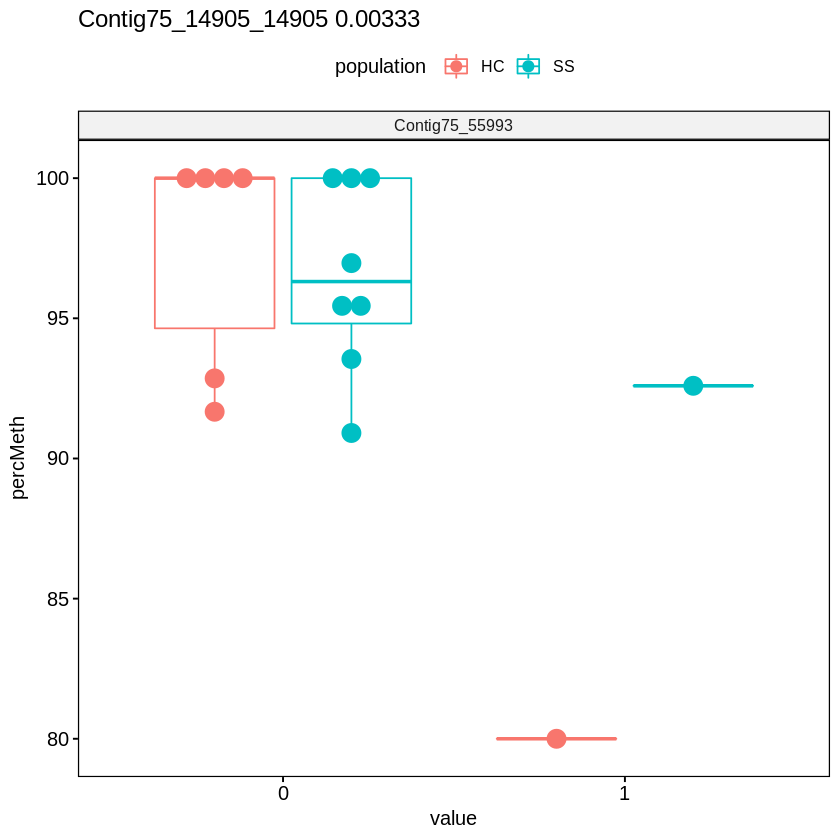

Warning message:
"Removed 3 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 3 rows containing non-finite values (stat_bindot)."


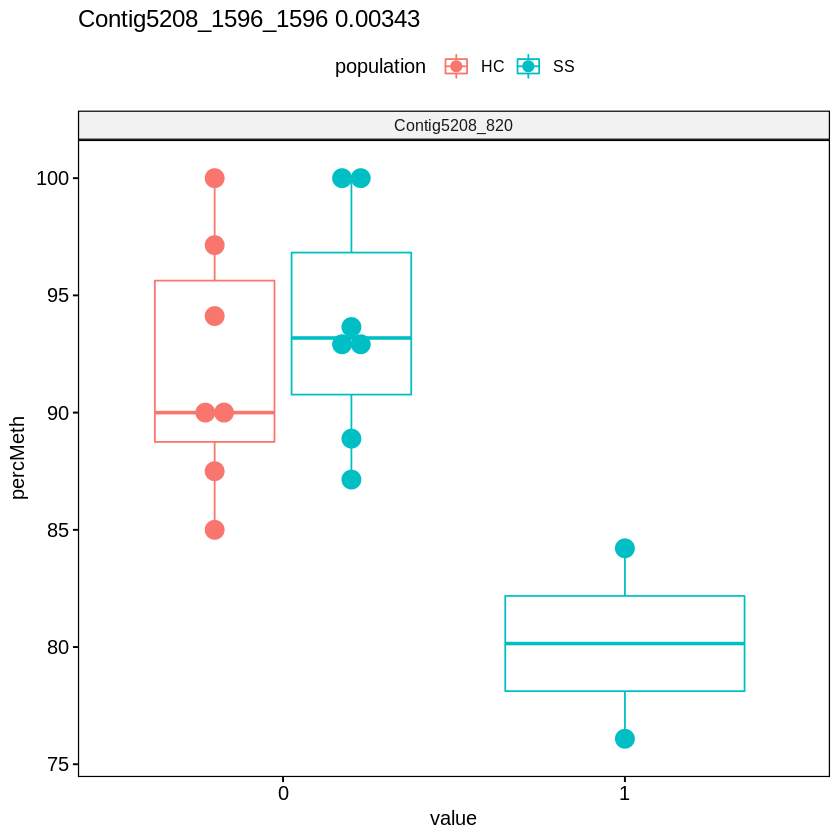

Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 2 rows containing non-finite values (stat_bindot)."


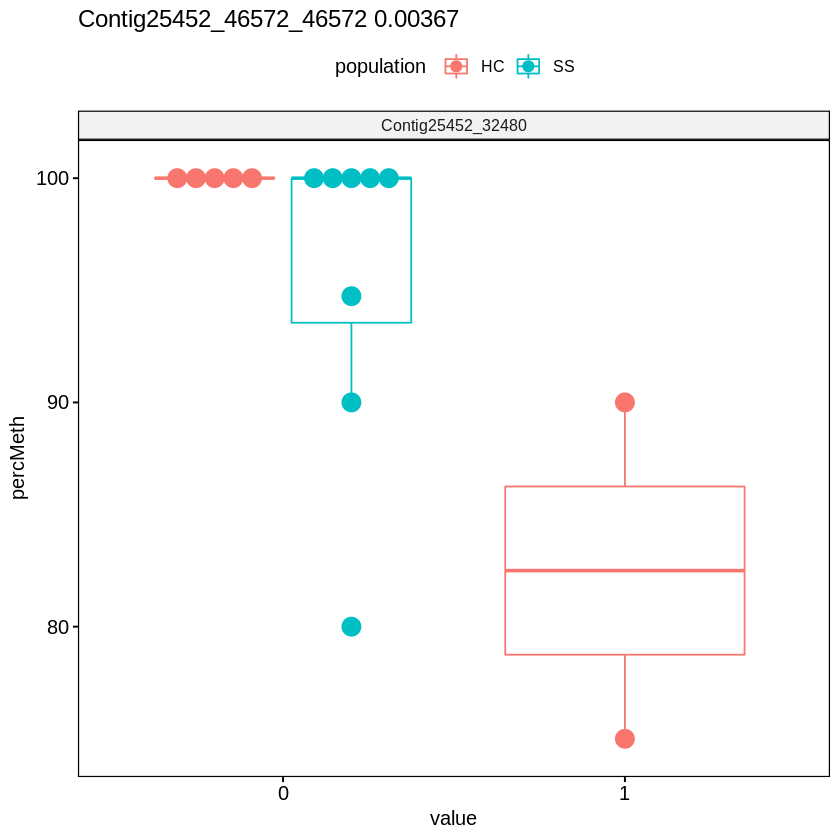

Warning message:
"Removed 4 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 4 rows containing non-finite values (stat_bindot)."


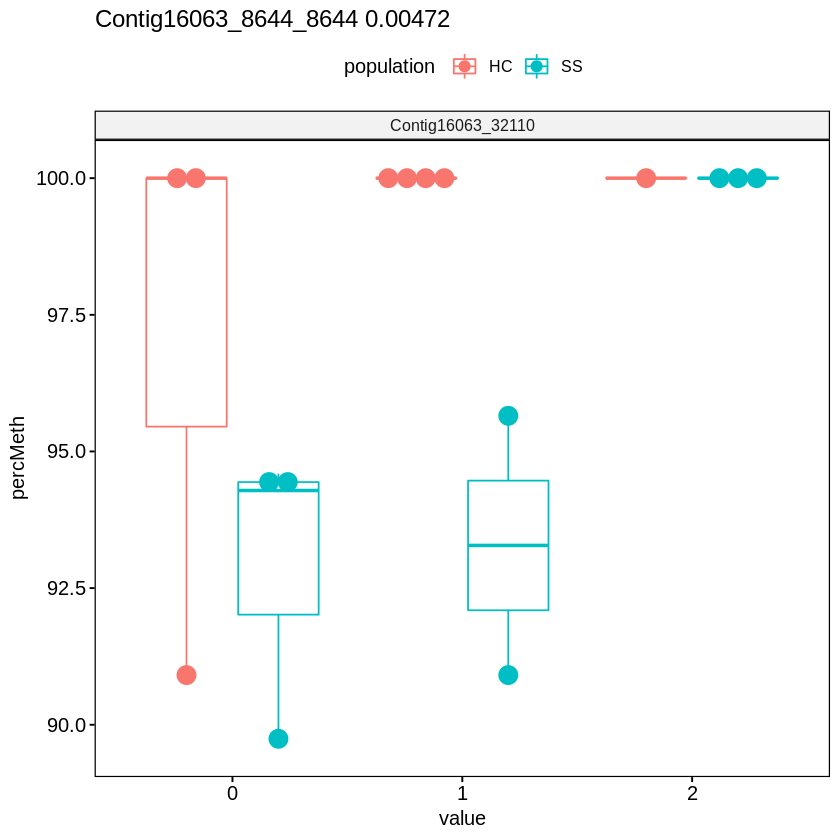

Warning message:
"Removed 3 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 3 rows containing non-finite values (stat_bindot)."


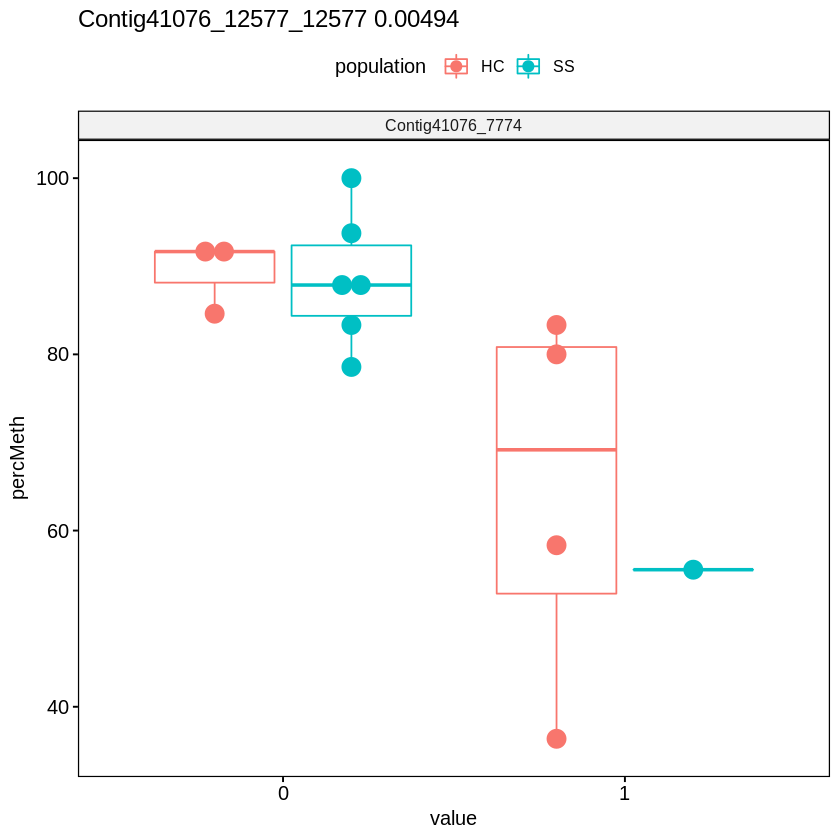

Warning message:
"Removed 1 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 1 rows containing non-finite values (stat_bindot)."


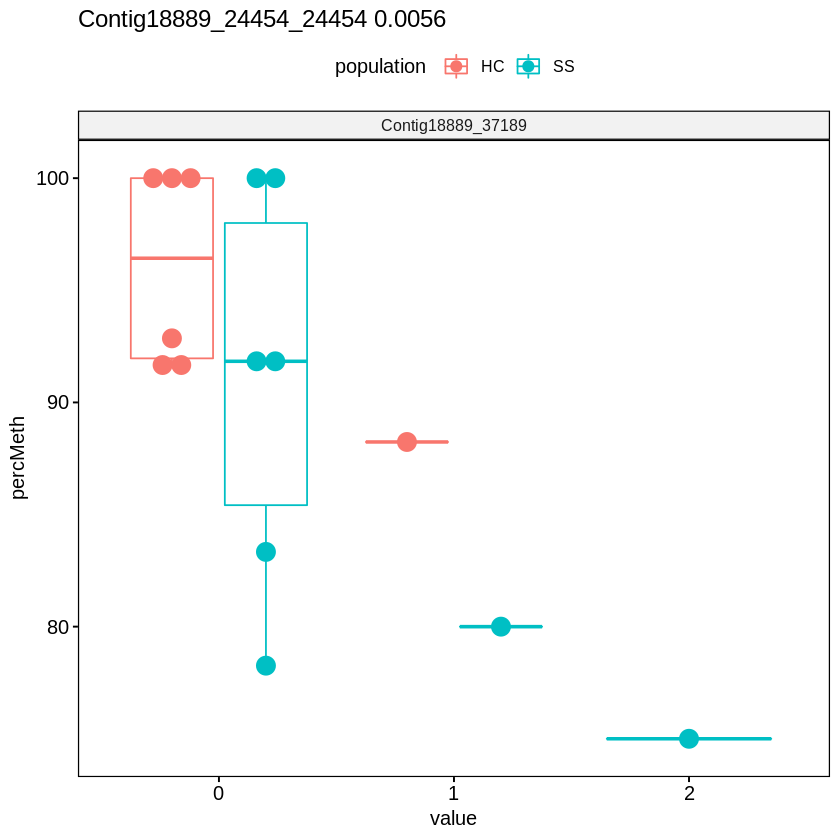

Warning message:
"Removed 4 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 4 rows containing non-finite values (stat_bindot)."


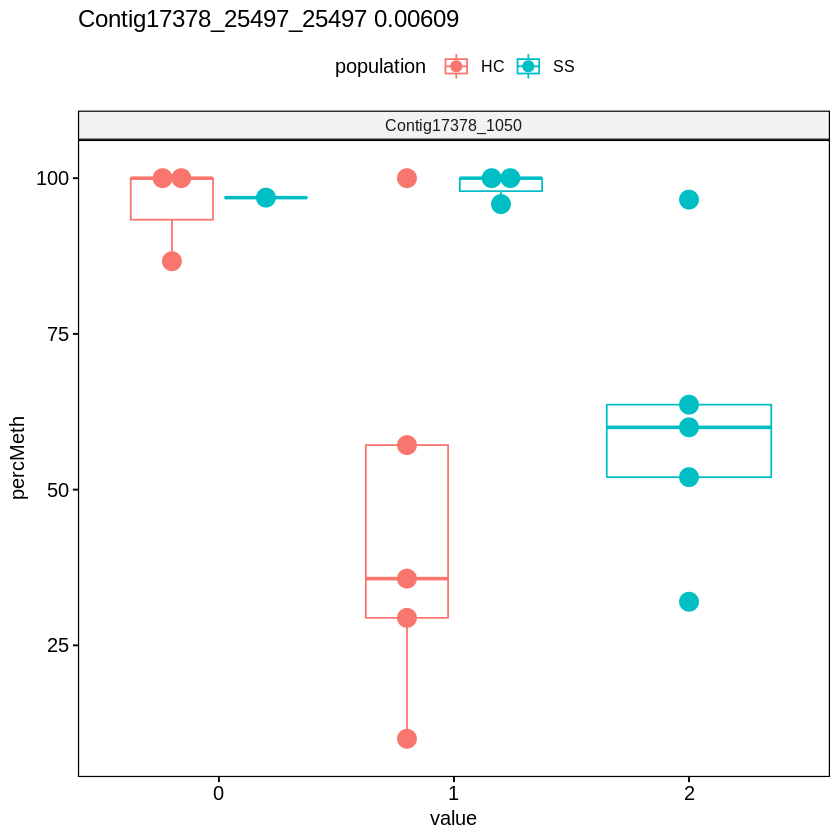

Warning message:
"Removed 1 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 1 rows containing non-finite values (stat_bindot)."


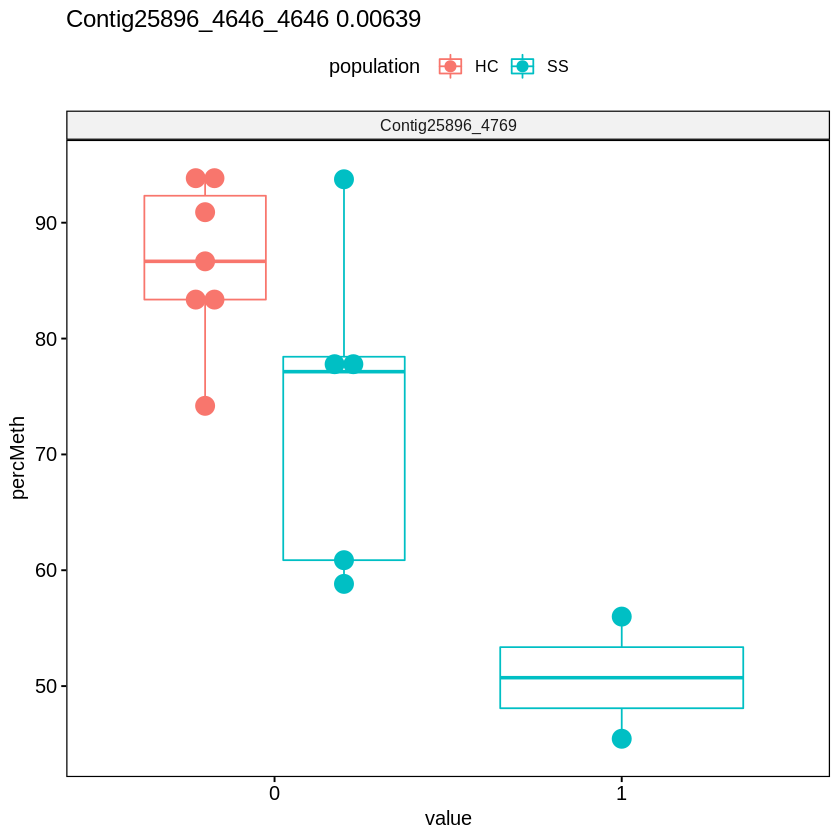

Warning message:
"Removed 1 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 1 rows containing non-finite values (stat_bindot)."


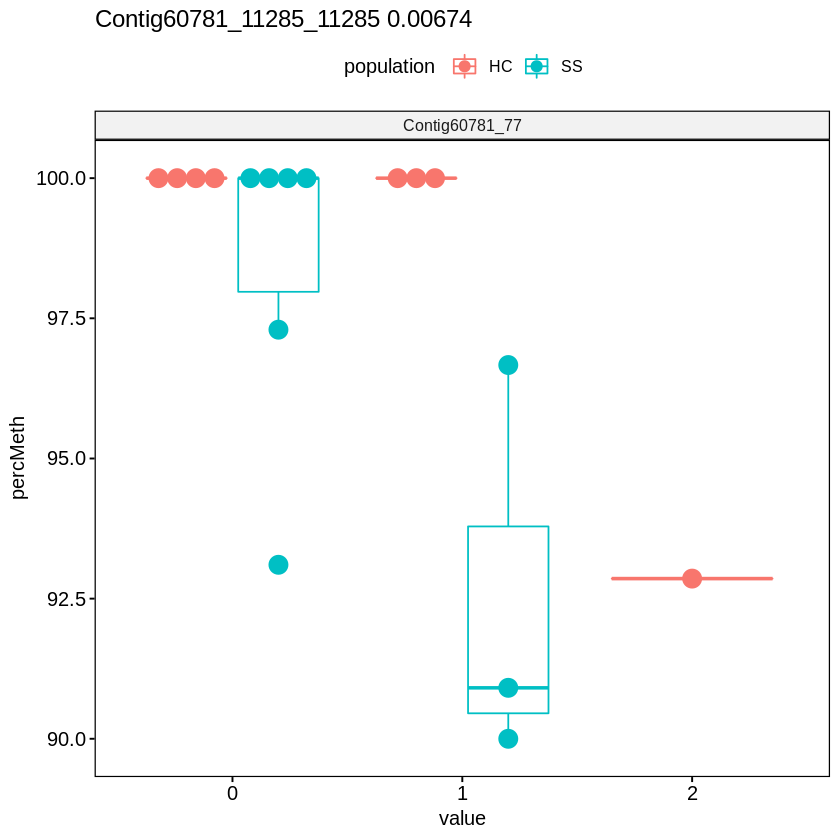

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



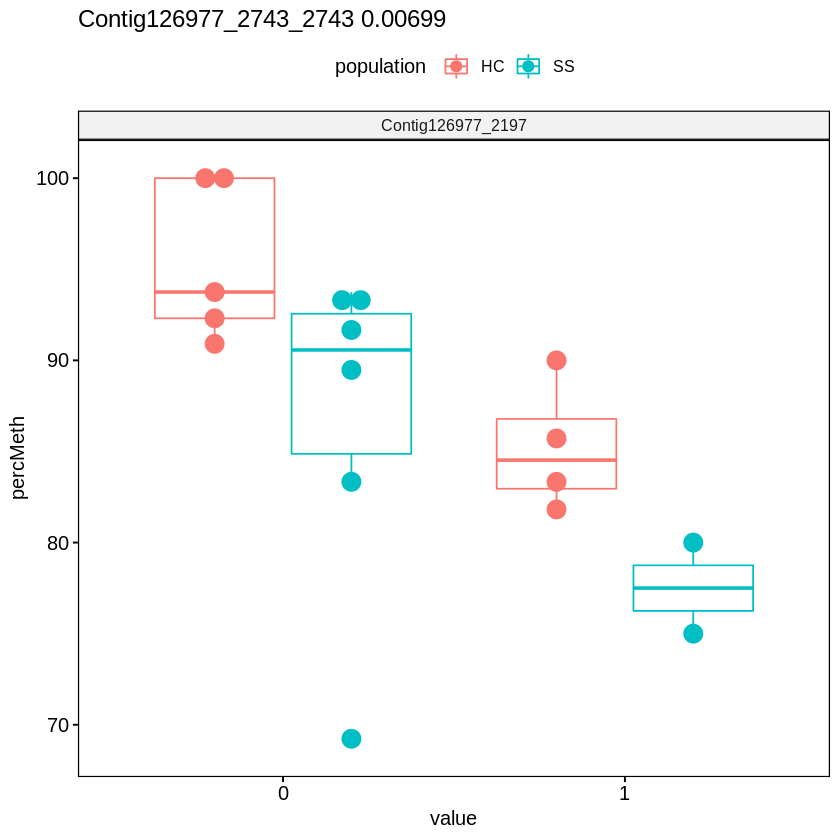

Warning message:
"Removed 3 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 3 rows containing non-finite values (stat_bindot)."


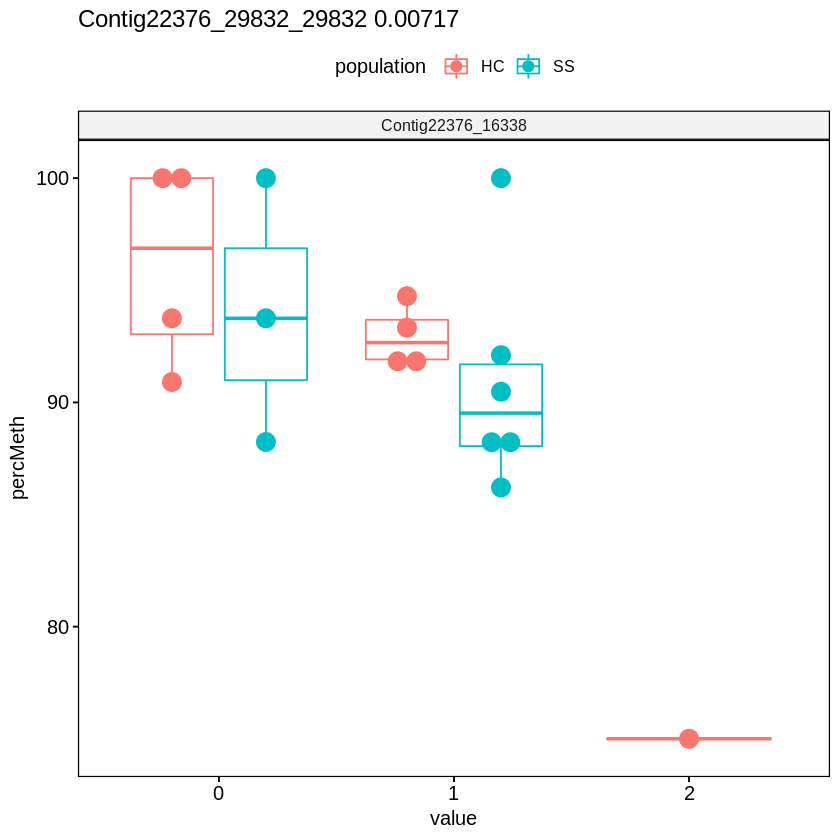

Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 2 rows containing non-finite values (stat_bindot)."


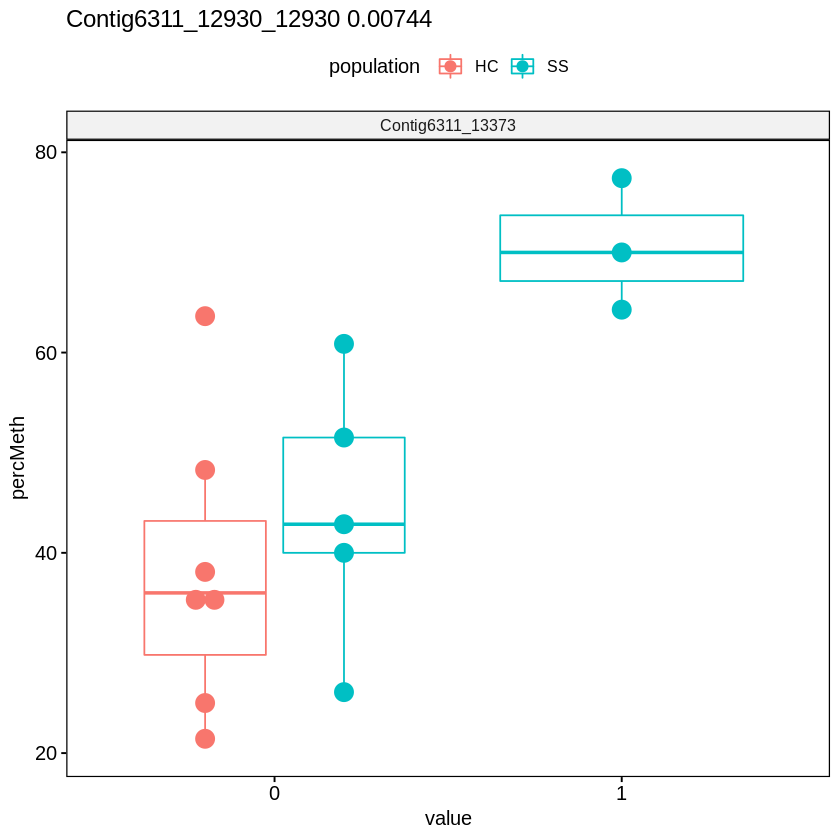

Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 2 rows containing non-finite values (stat_bindot)."


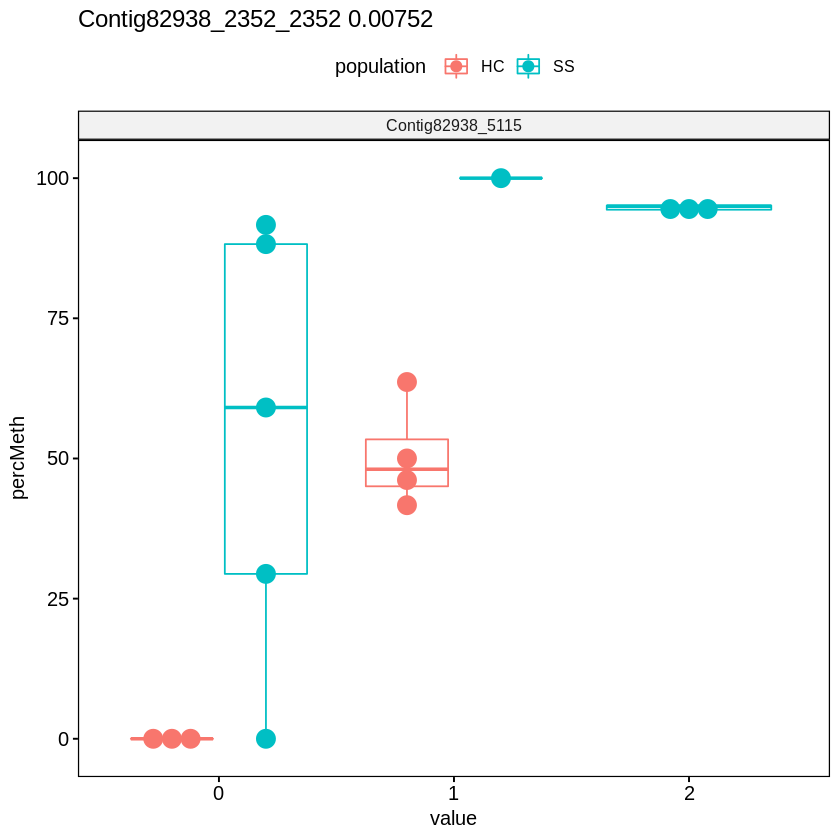

Warning message:
"Removed 4 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 4 rows containing non-finite values (stat_bindot)."


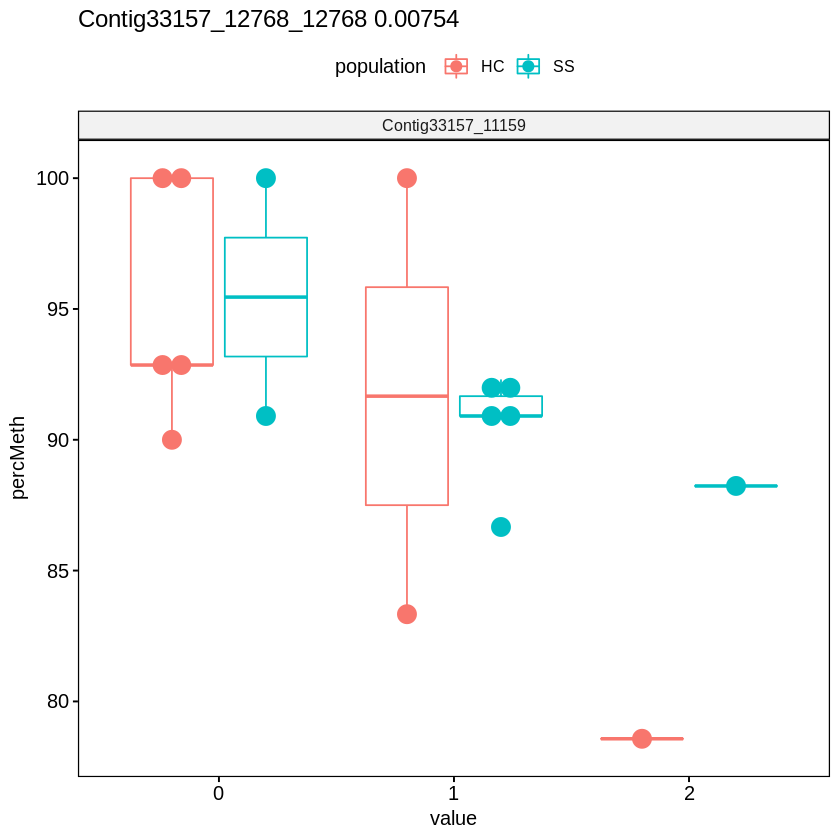

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



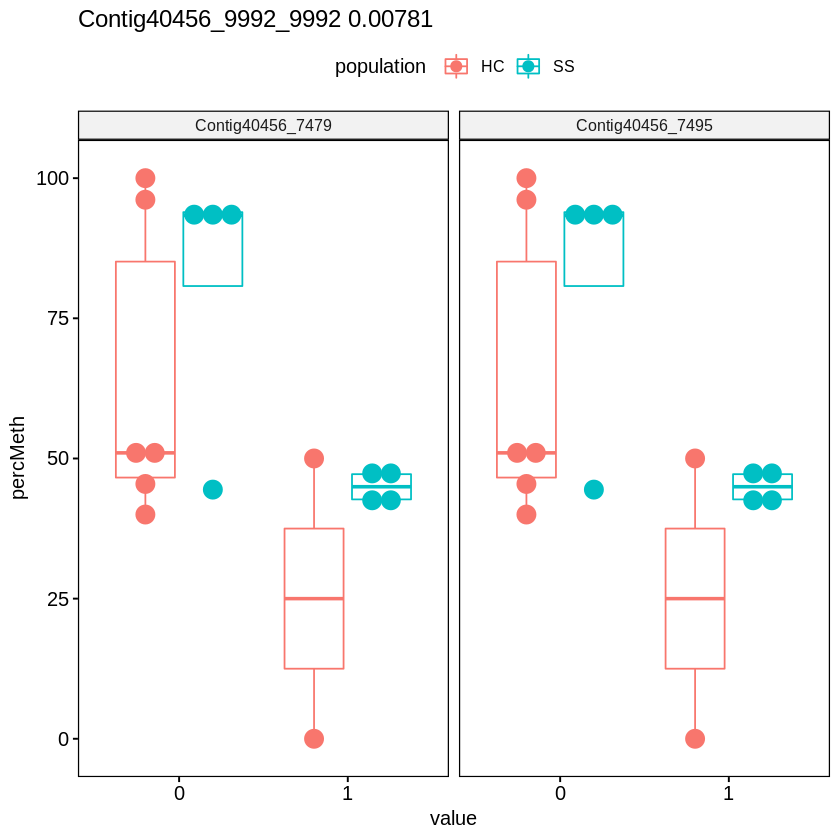

Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 2 rows containing non-finite values (stat_bindot)."


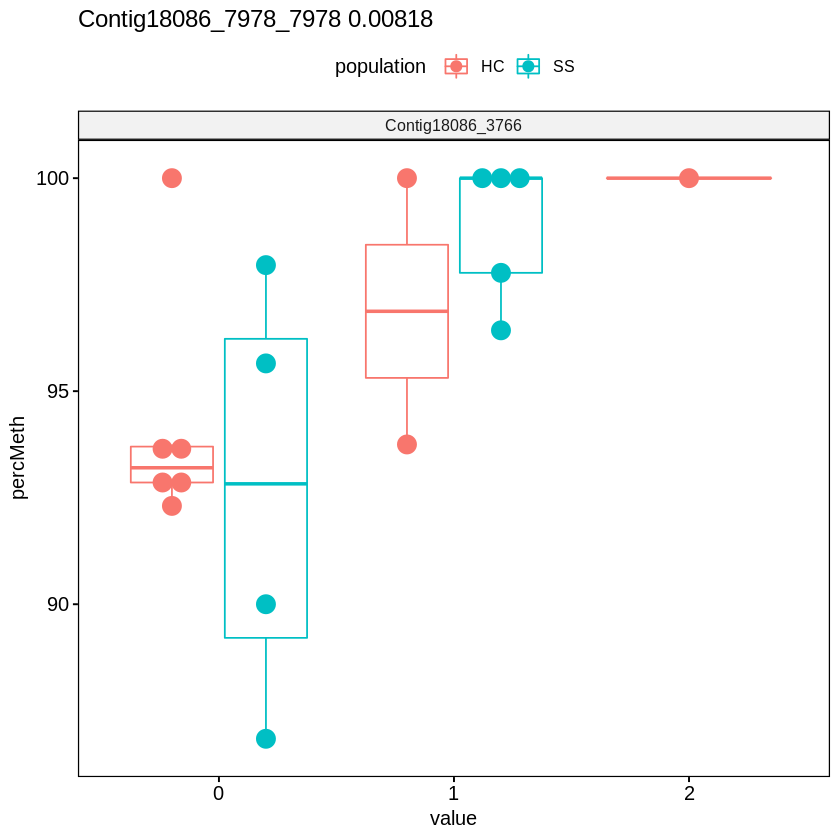

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



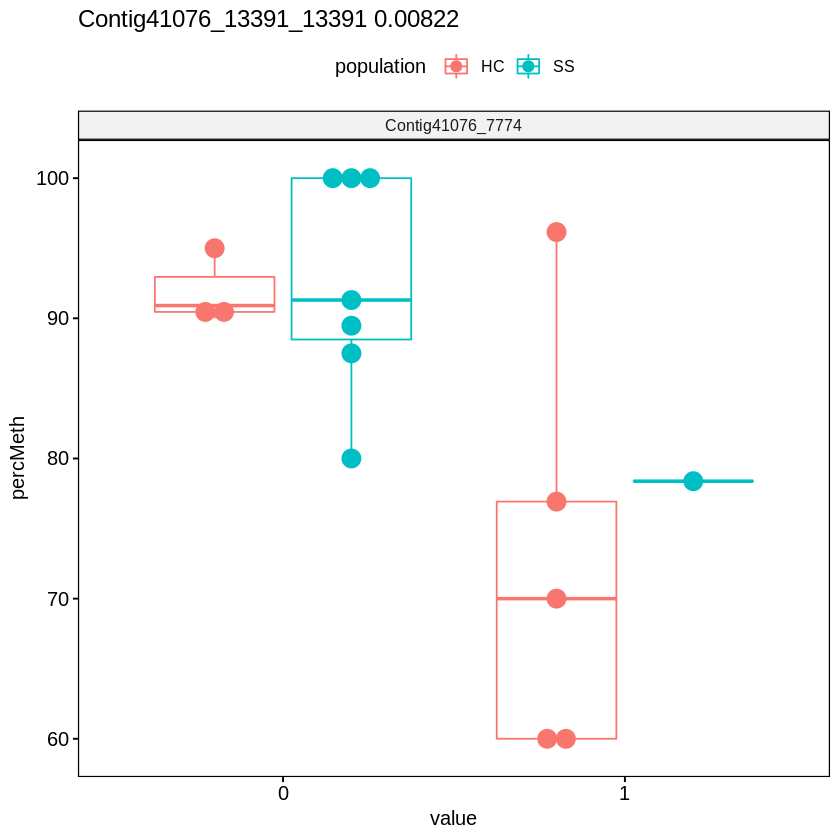

Warning message:
"Removed 1 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 1 rows containing non-finite values (stat_bindot)."


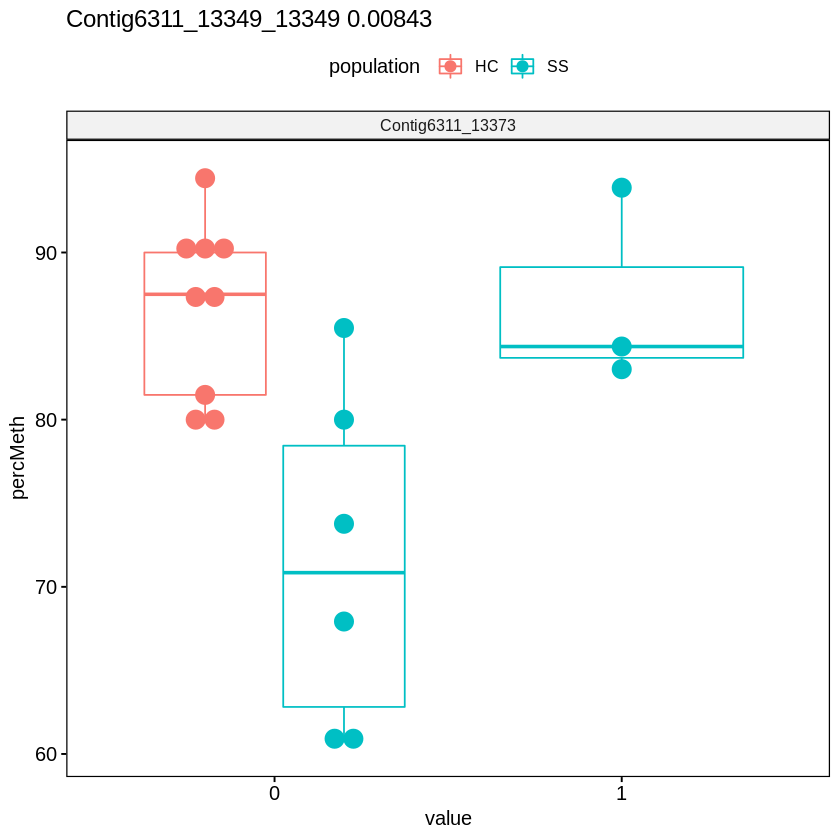

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



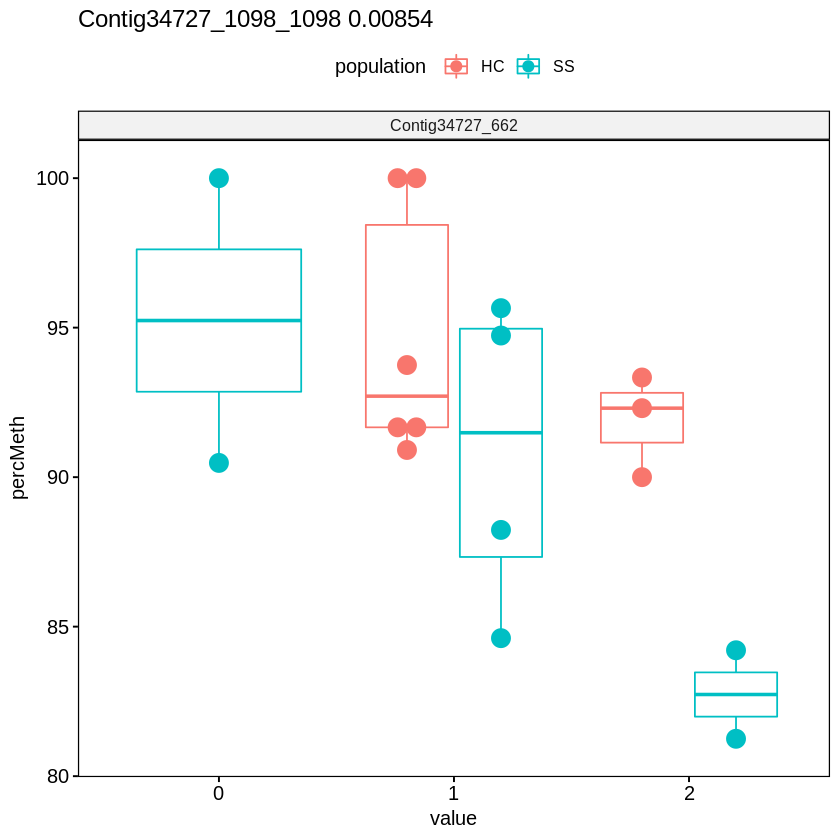

Warning message:
"Removed 1 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 1 rows containing non-finite values (stat_bindot)."


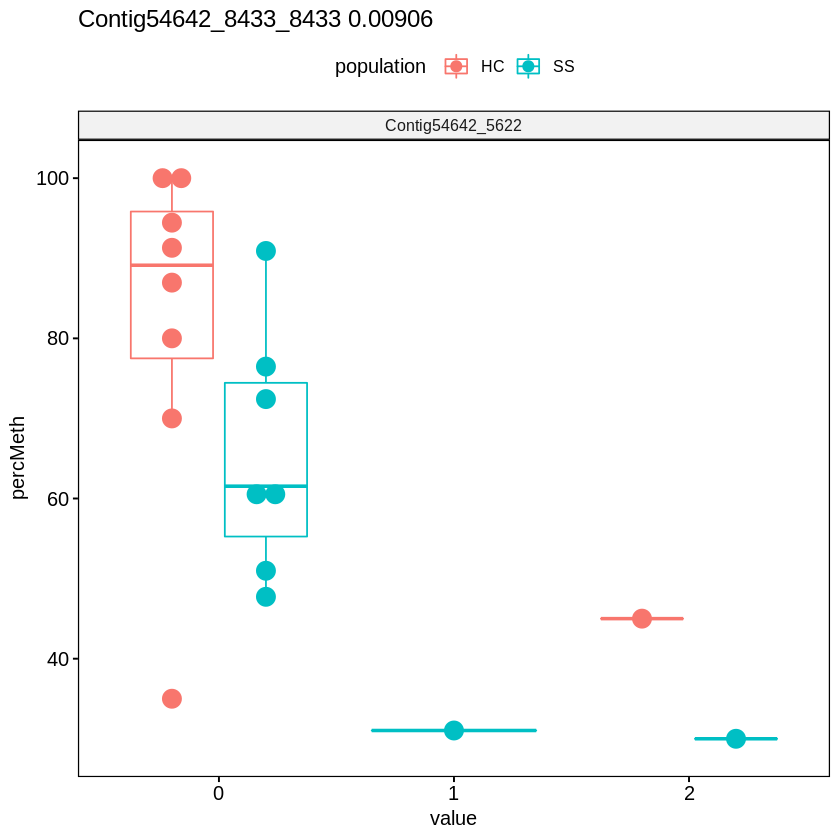

Warning message:
"Removed 3 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 3 rows containing non-finite values (stat_bindot)."


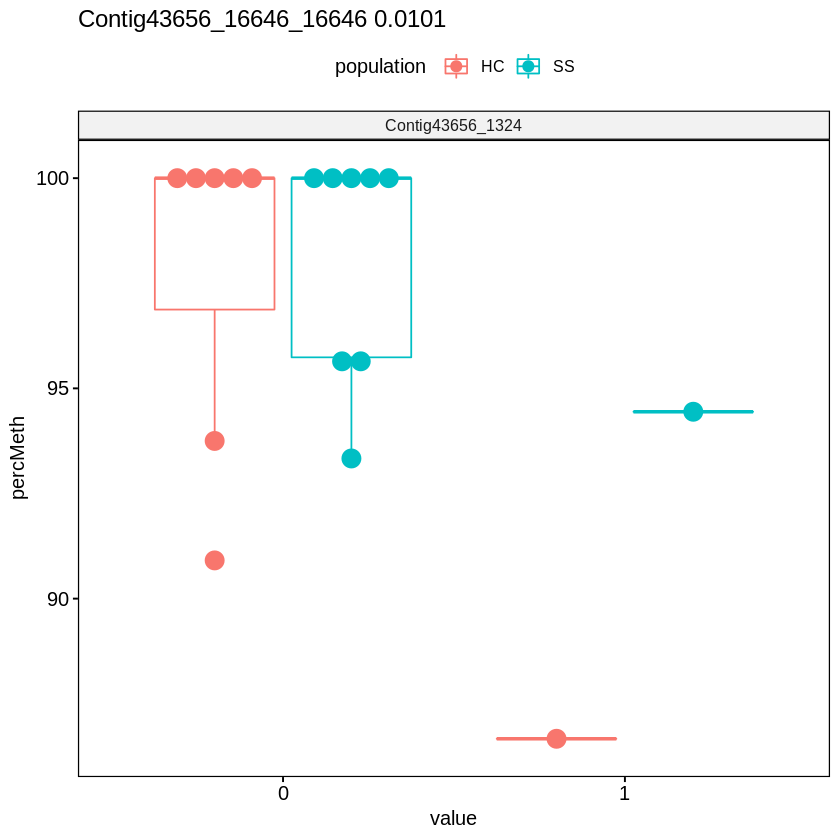

Warning message:
"Removed 3 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 3 rows containing non-finite values (stat_bindot)."


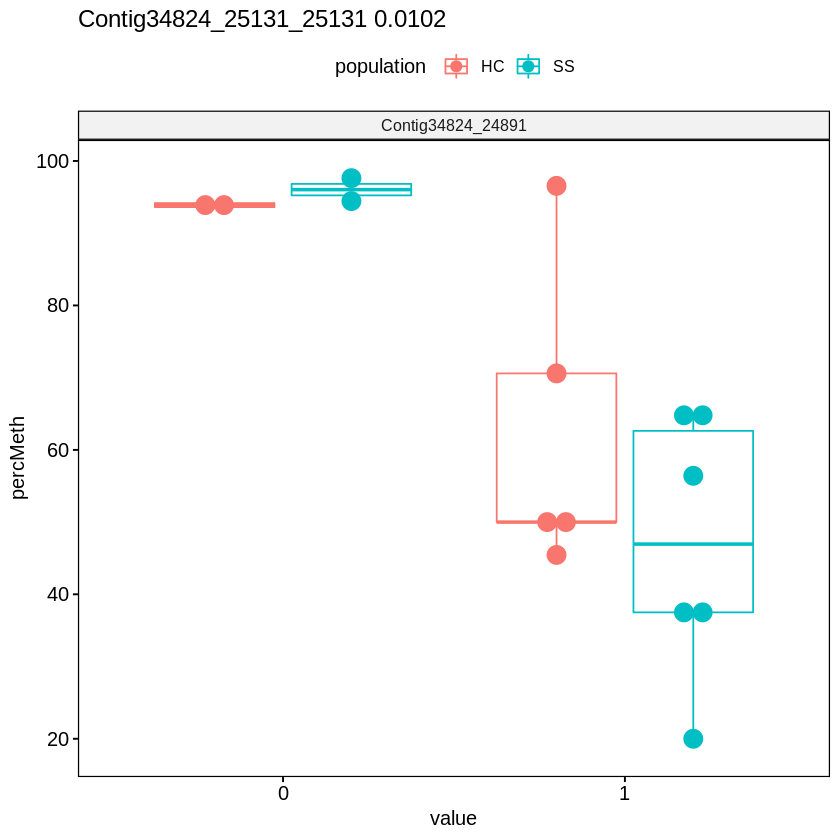

Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 2 rows containing non-finite values (stat_bindot)."


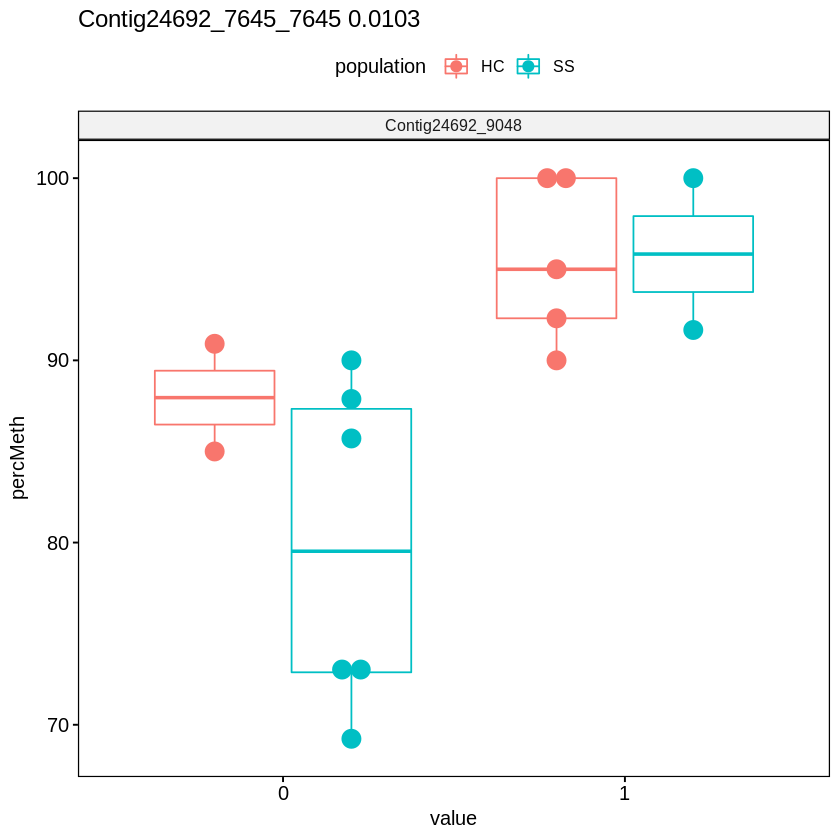

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



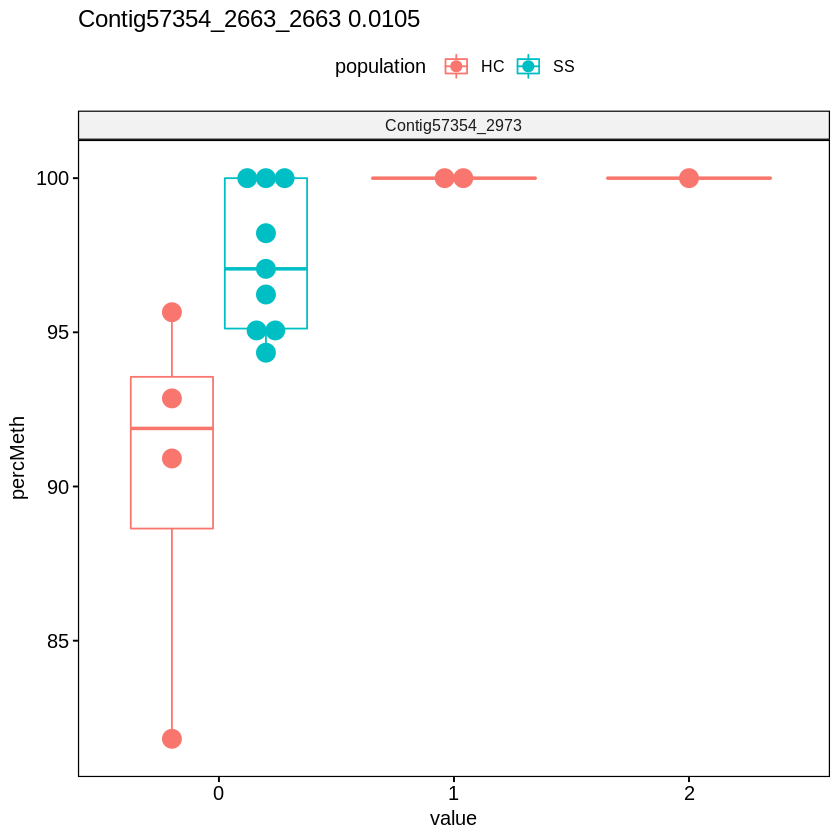

Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 2 rows containing non-finite values (stat_bindot)."


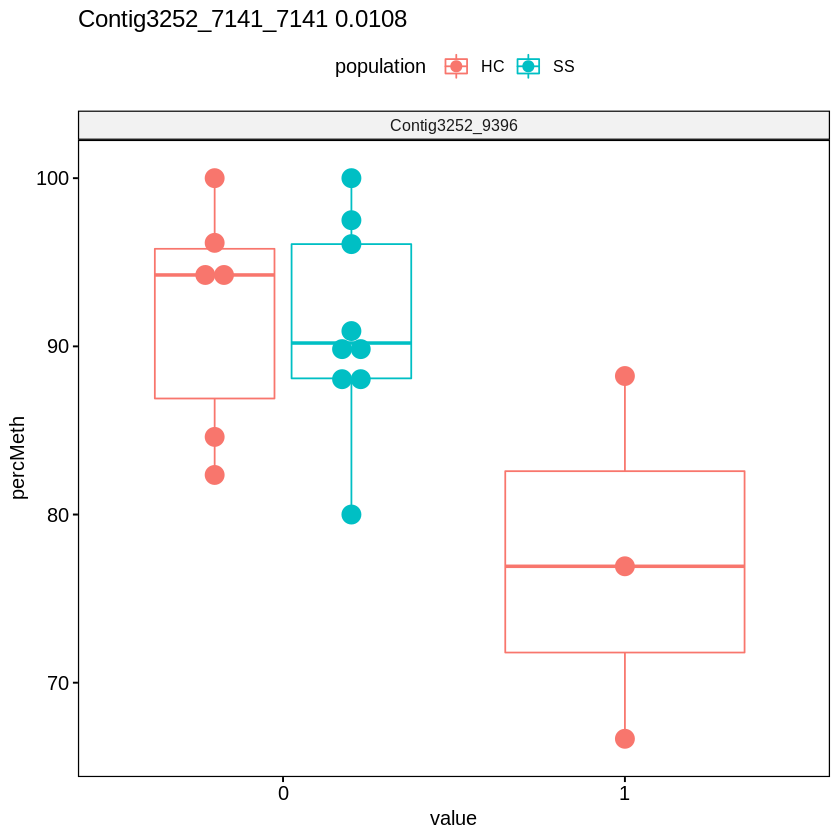

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



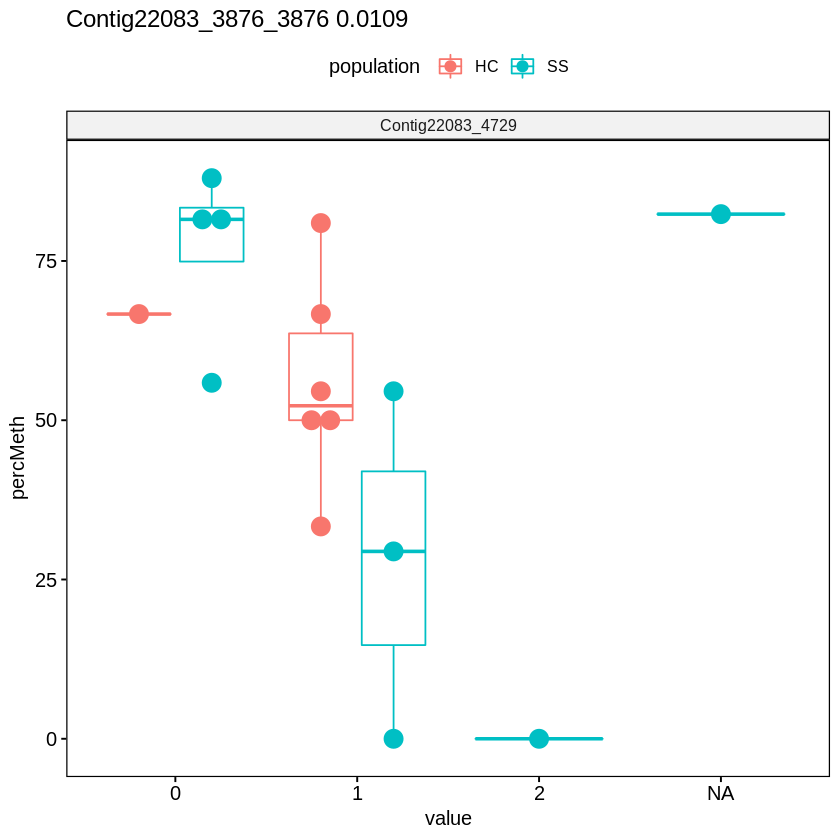

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



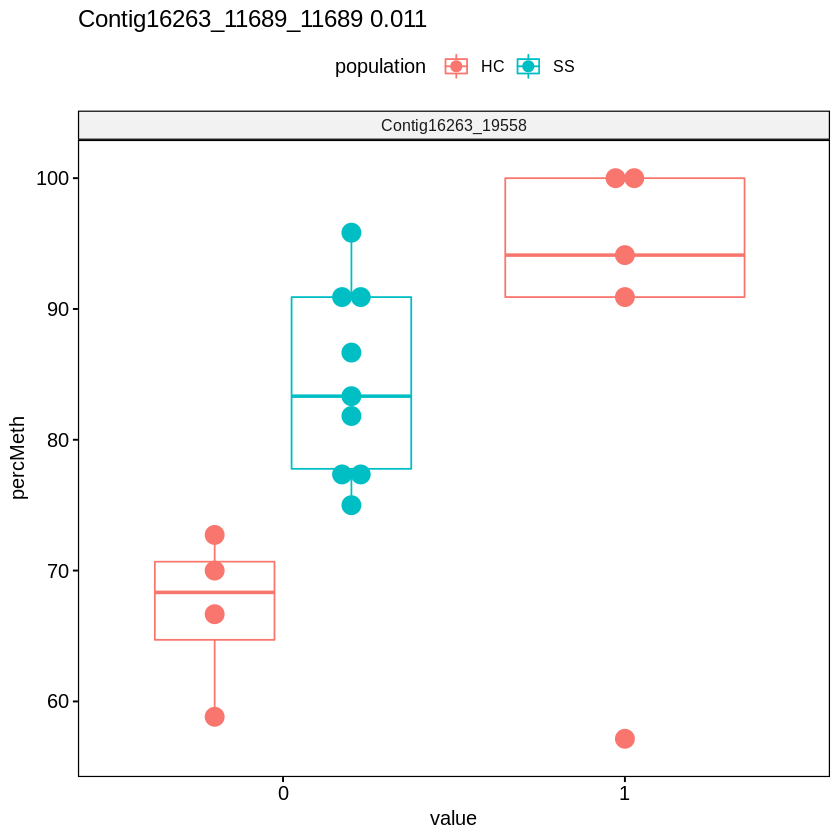

Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 2 rows containing non-finite values (stat_bindot)."


`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



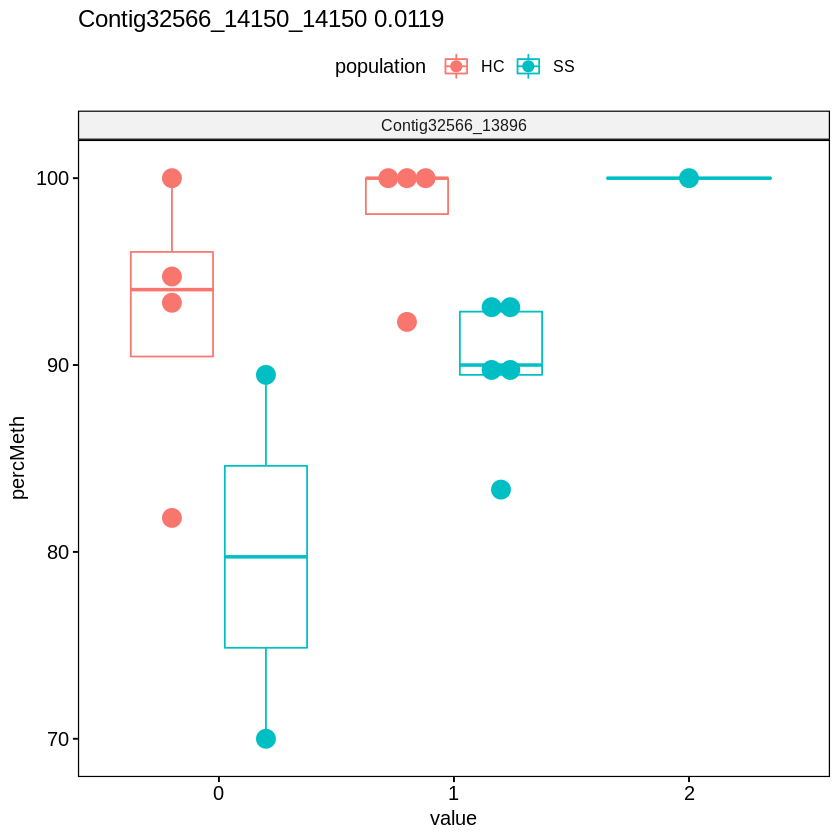

Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 2 rows containing non-finite values (stat_bindot)."


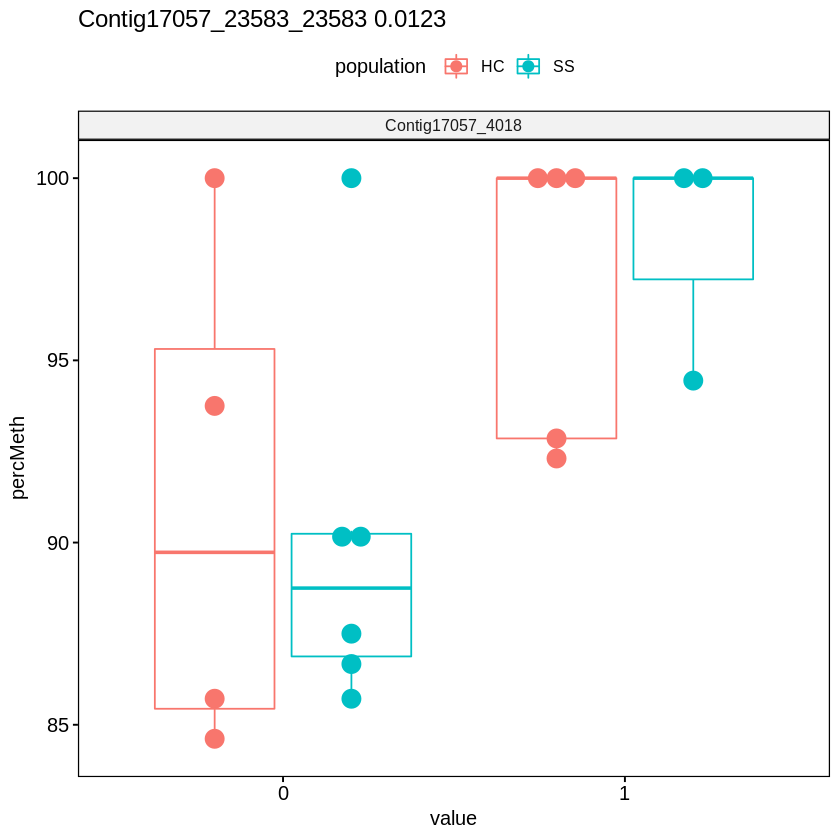

Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 2 rows containing non-finite values (stat_bindot)."


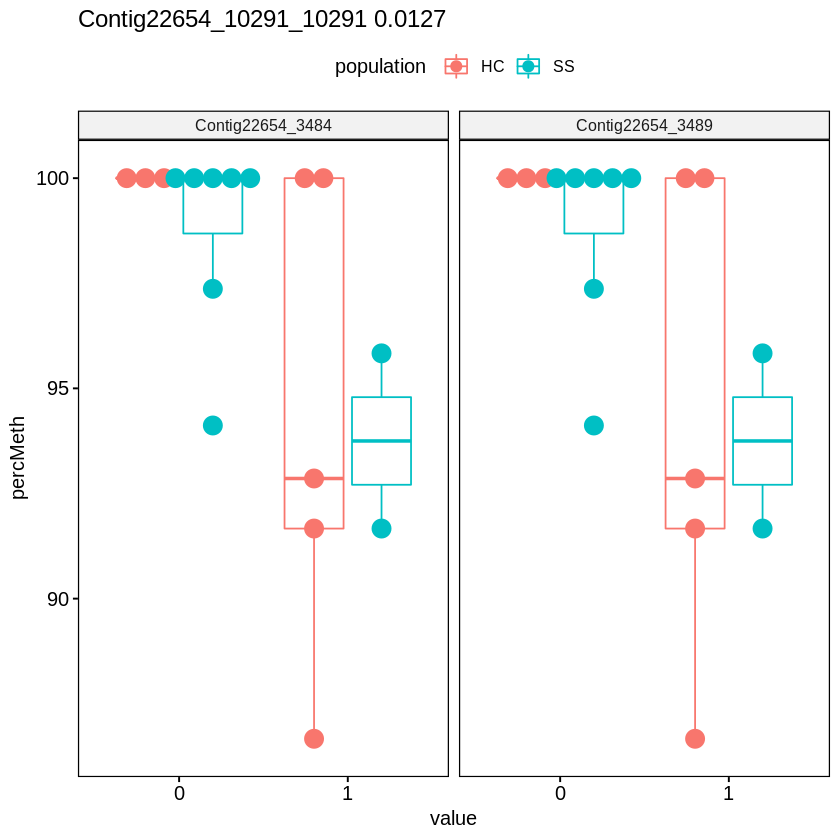

Warning message:
"Removed 1 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 1 rows containing non-finite values (stat_bindot)."


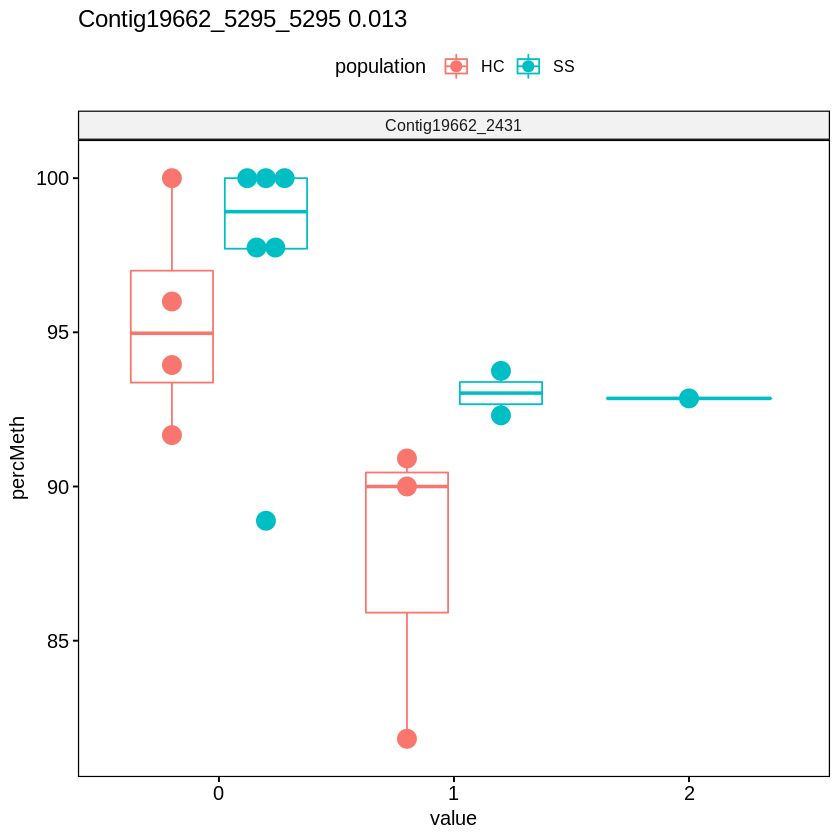

Warning message:
"Removed 4 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 4 rows containing non-finite values (stat_bindot)."


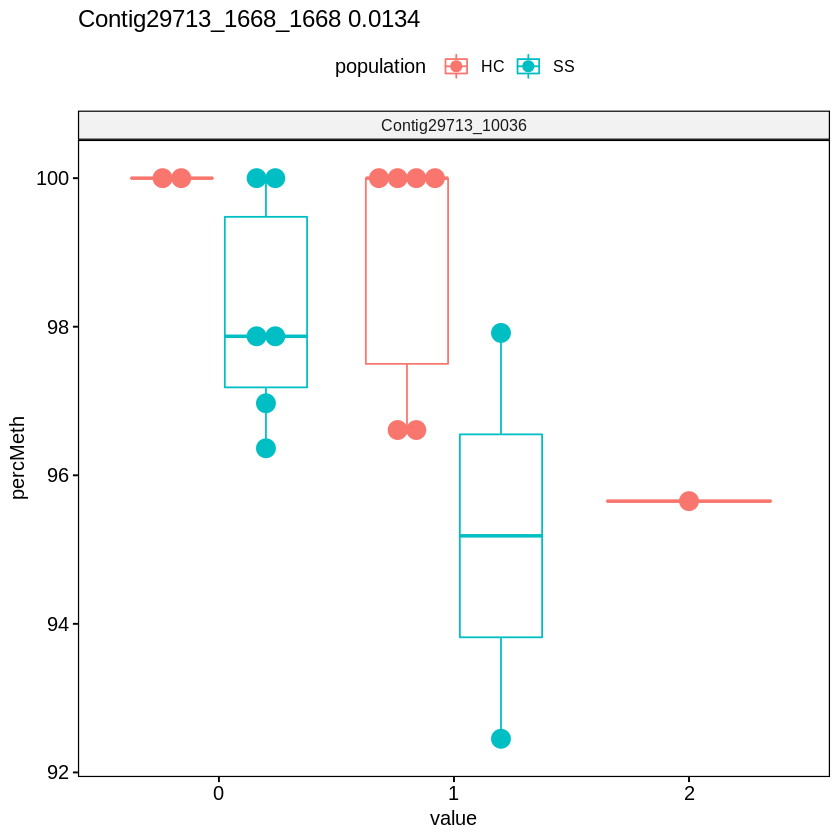

Warning message:
"Removed 6 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 6 rows containing non-finite values (stat_bindot)."


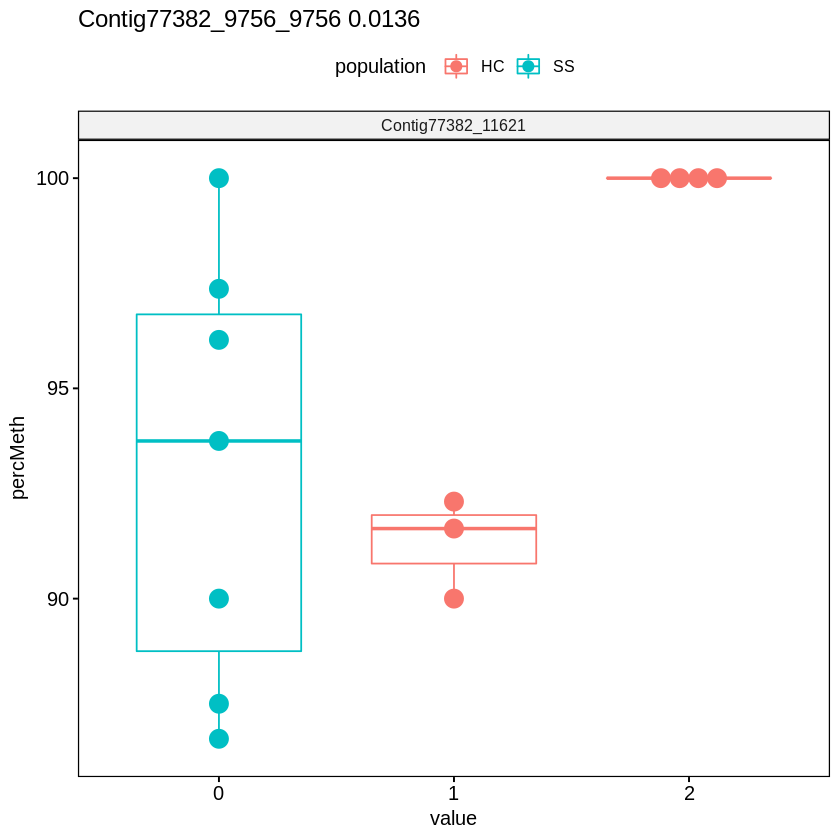

Warning message:
"Removed 3 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 3 rows containing non-finite values (stat_bindot)."


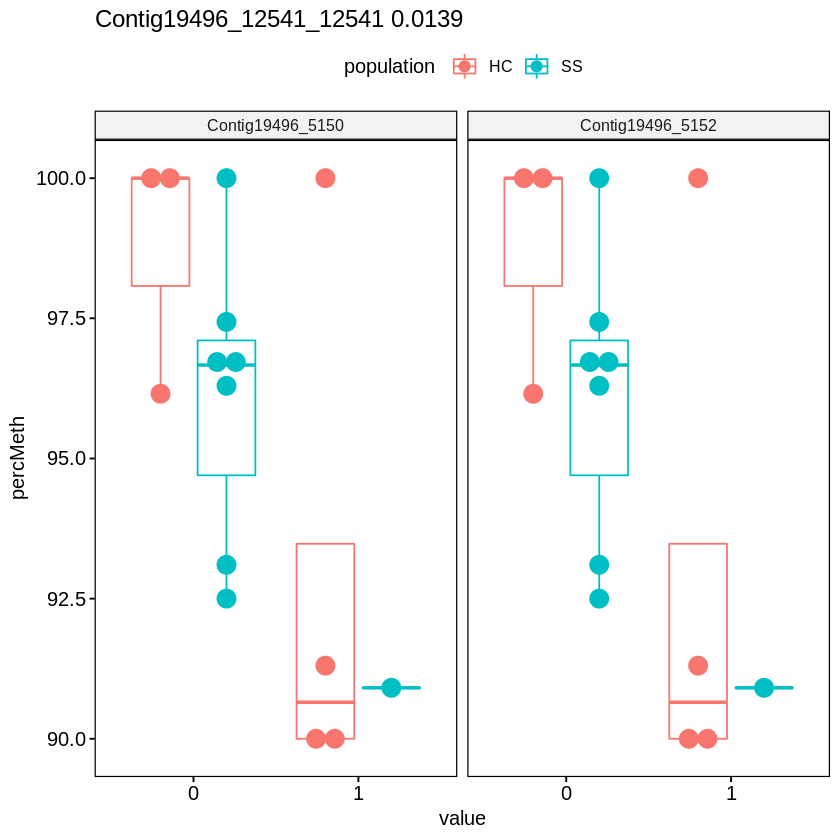

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 2 rows containing non-finite values (stat_bindot)."


Warning message:
"Removed 1 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 1 rows containing non-finite values (stat_bindot)."


Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 2 rows containing non-finite values (stat_bindot)."


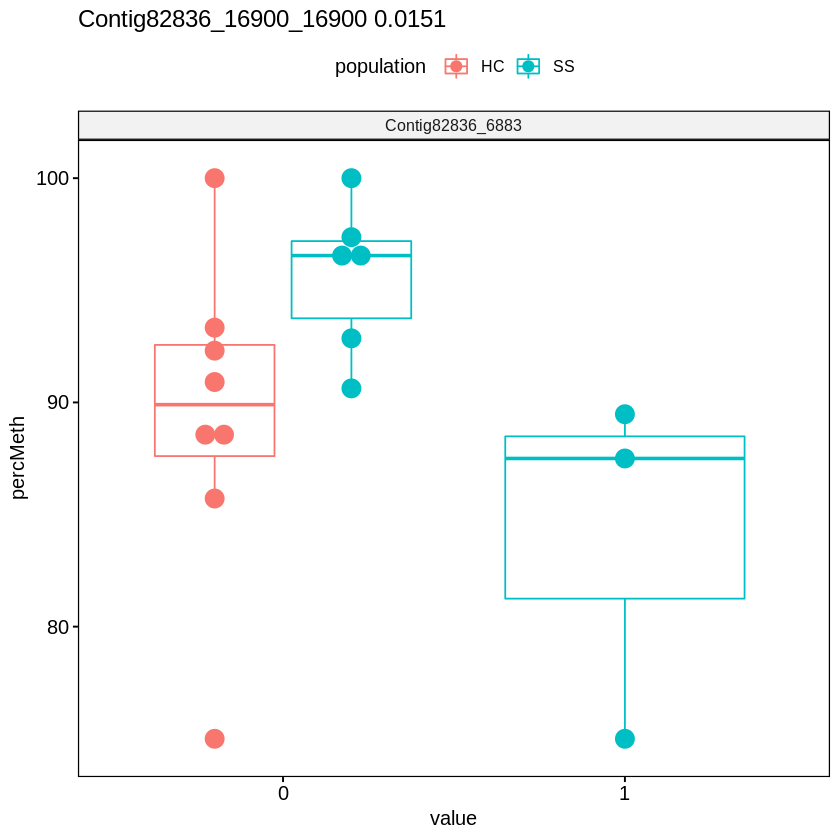

Warning message:
"Removed 4 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 4 rows containing non-finite values (stat_bindot)."


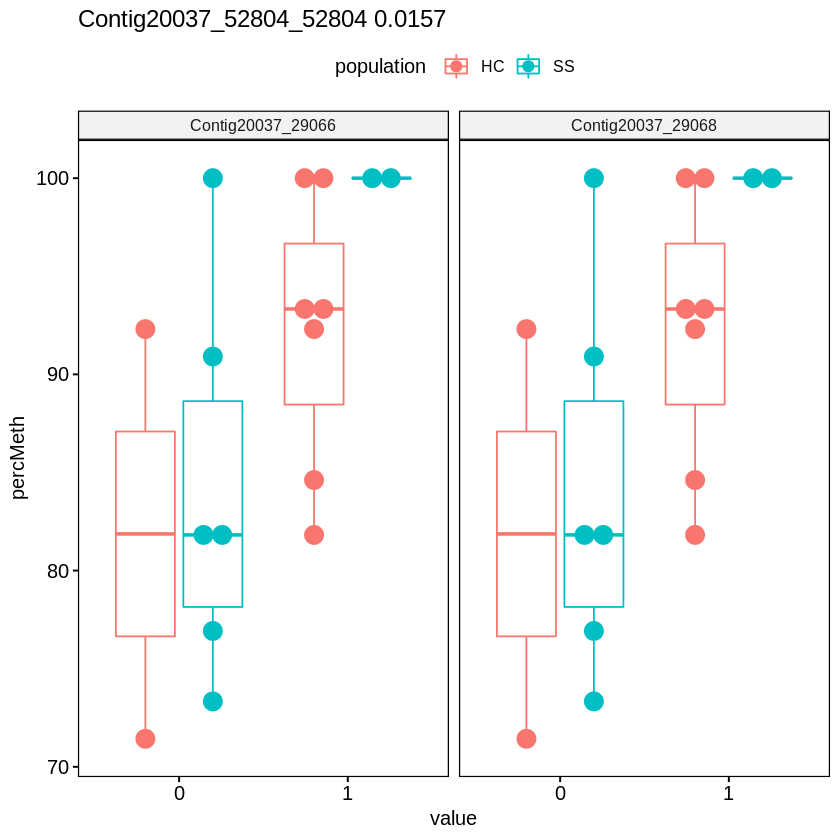

Warning message:
"Removed 1 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 1 rows containing non-finite values (stat_bindot)."


Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 2 rows containing non-finite values (stat_bindot)."


Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 2 rows containing non-finite values (stat_bindot)."


Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 2 rows containing non-finite values (stat_bindot)."


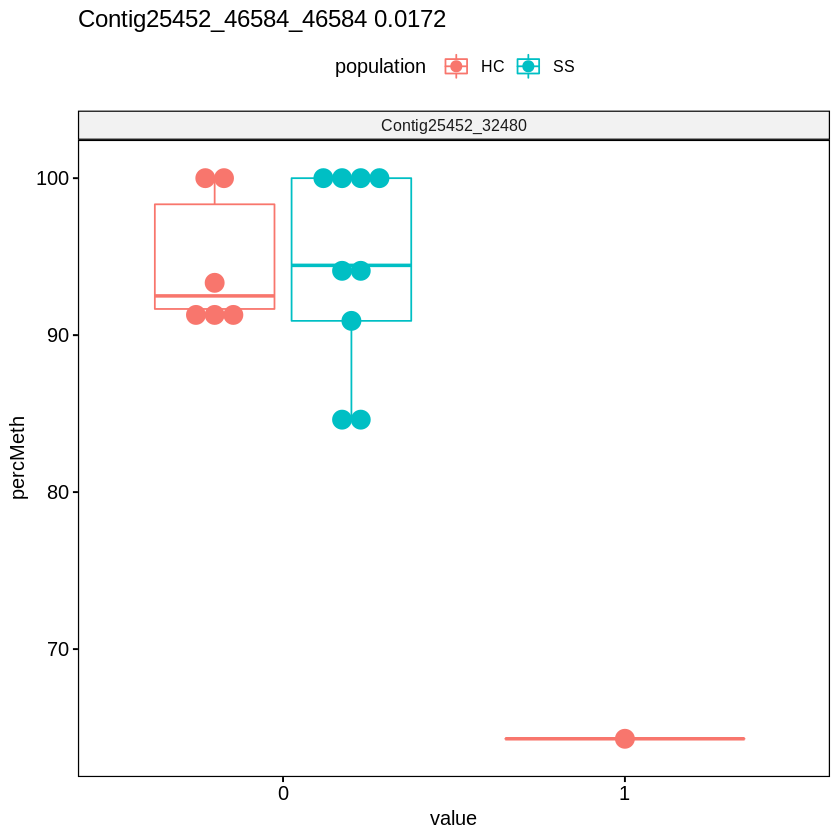

Warning message:
"Removed 3 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 3 rows containing non-finite values (stat_bindot)."


`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



Warning message:
"Removed 3 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 3 rows containing non-finite values (stat_bindot)."


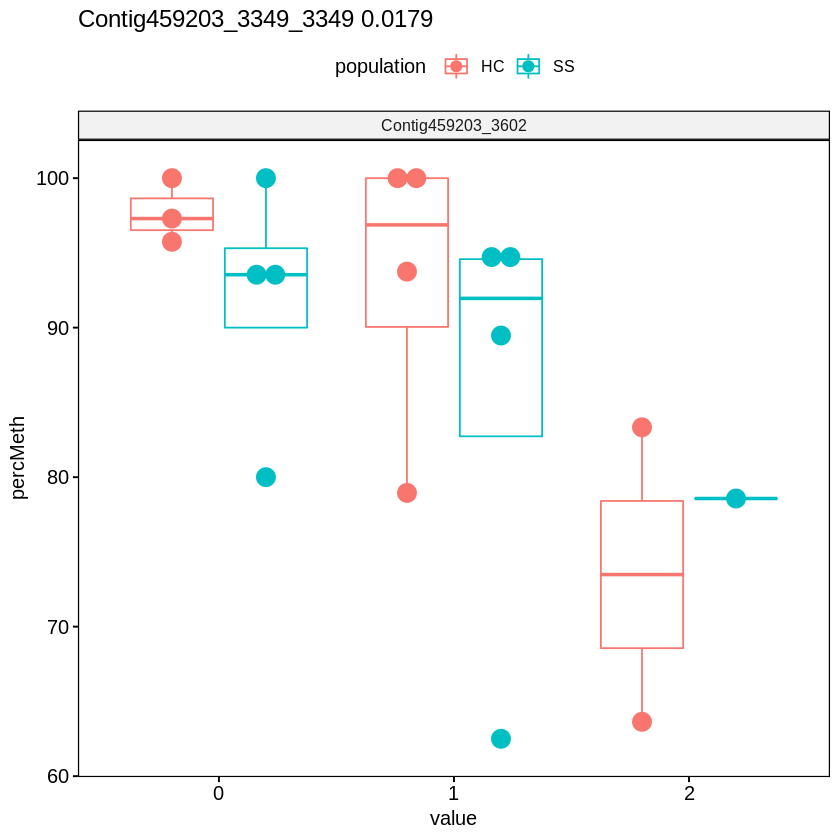

Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 2 rows containing non-finite values (stat_bindot)."


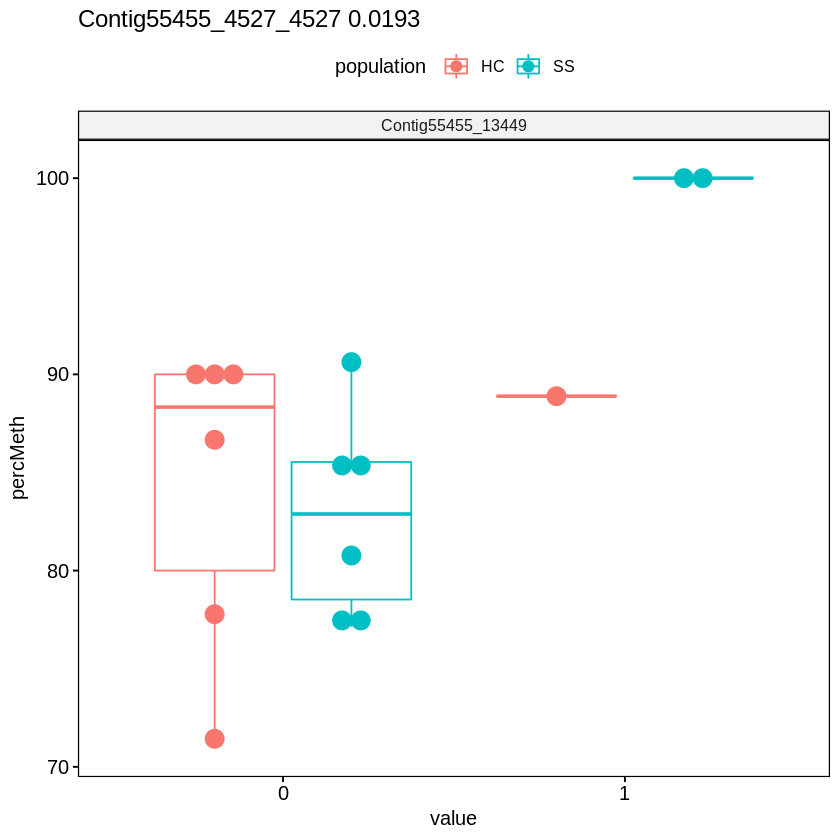

Warning message:
"Removed 1 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 1 rows containing non-finite values (stat_bindot)."


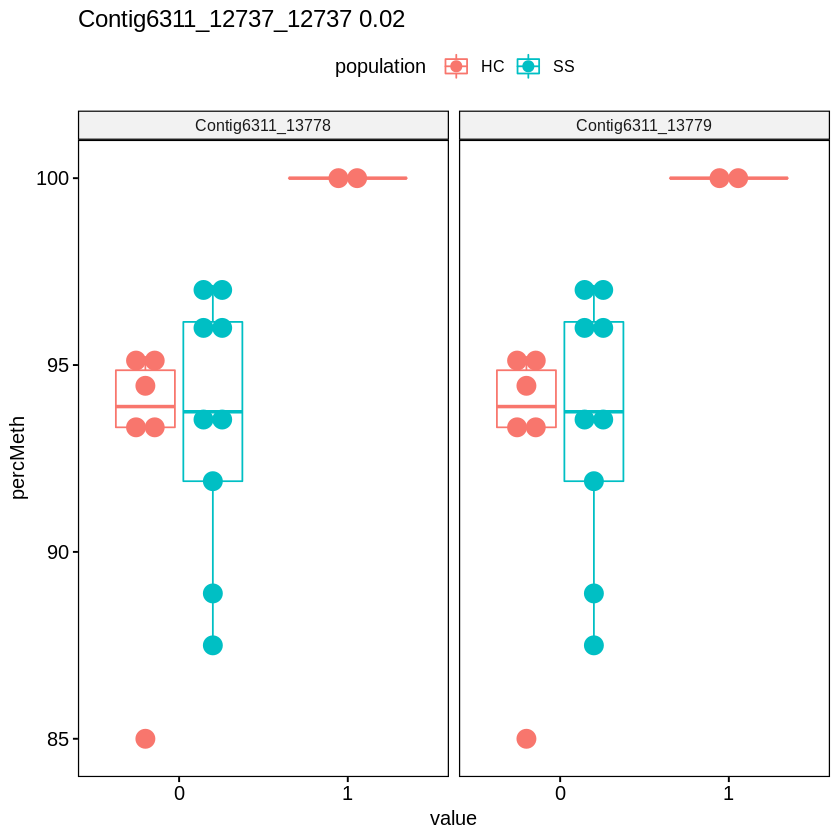

Warning message:
"Removed 6 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 6 rows containing non-finite values (stat_bindot)."


Warning message:
"Removed 1 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 1 rows containing non-finite values (stat_bindot)."


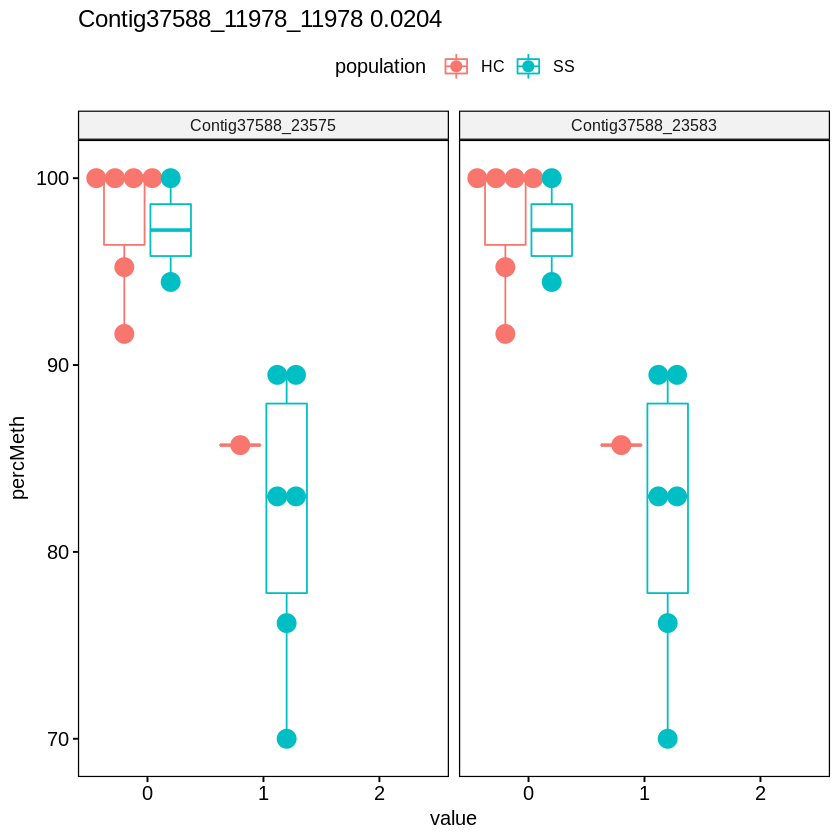

Warning message:
"Removed 3 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 3 rows containing non-finite values (stat_bindot)."


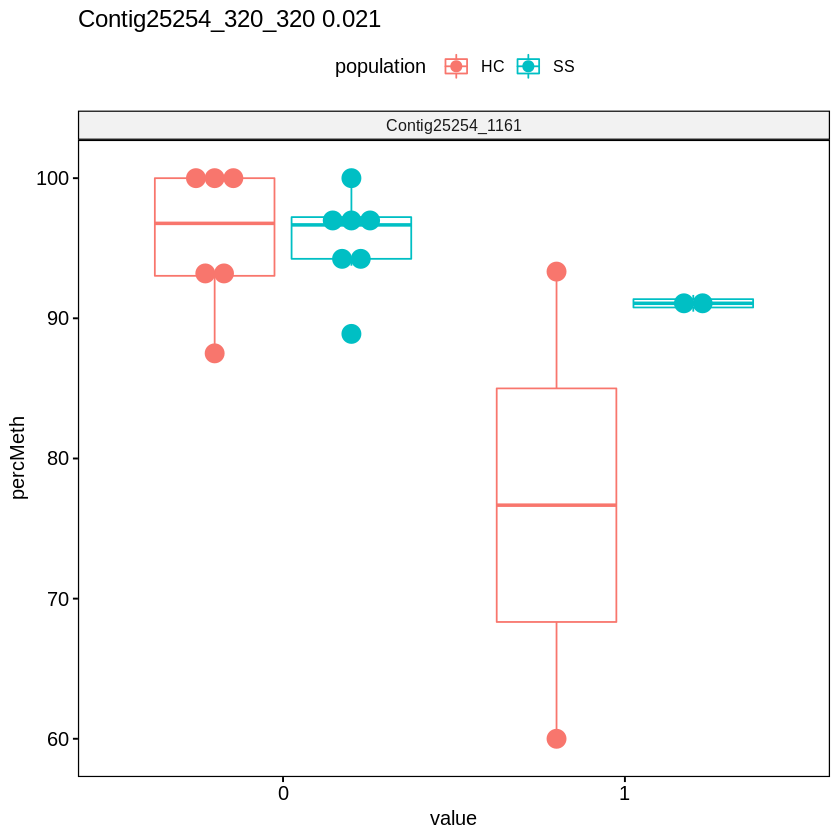

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



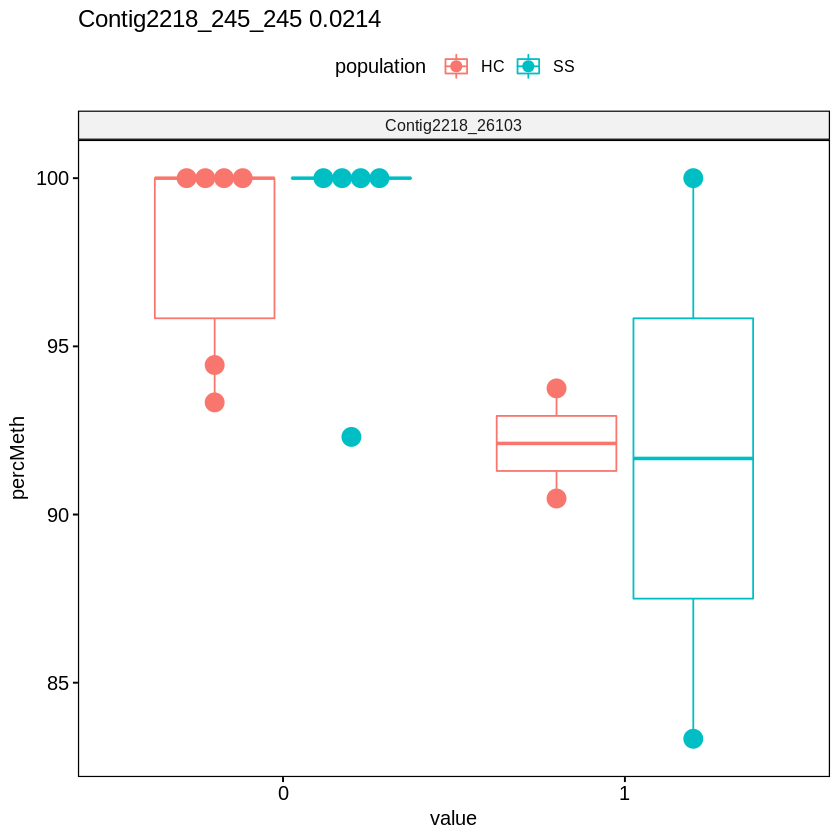

Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 2 rows containing non-finite values (stat_bindot)."


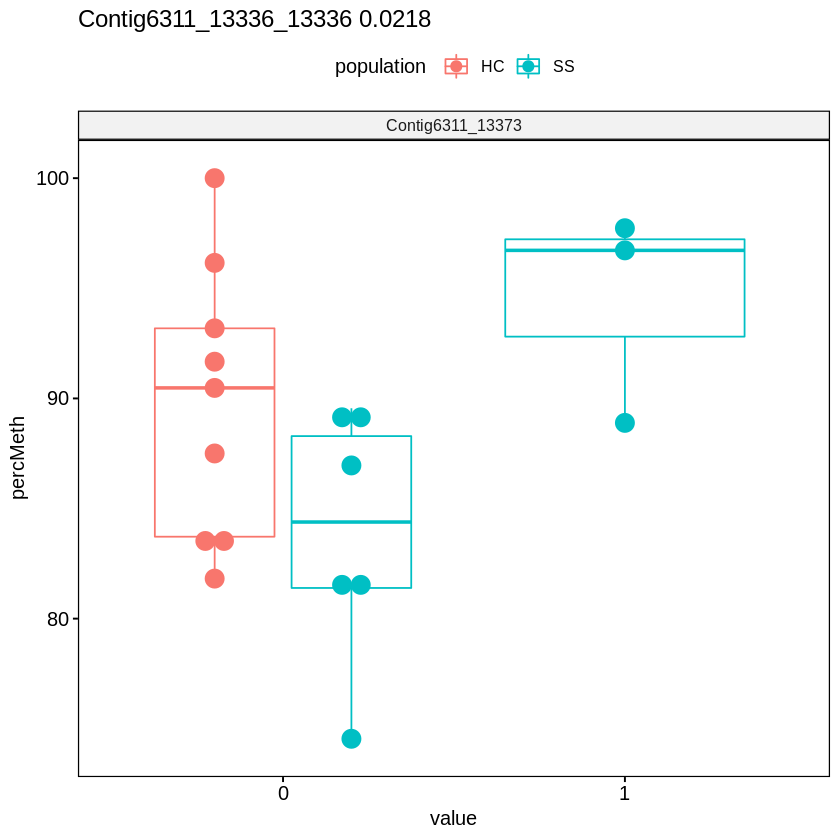

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



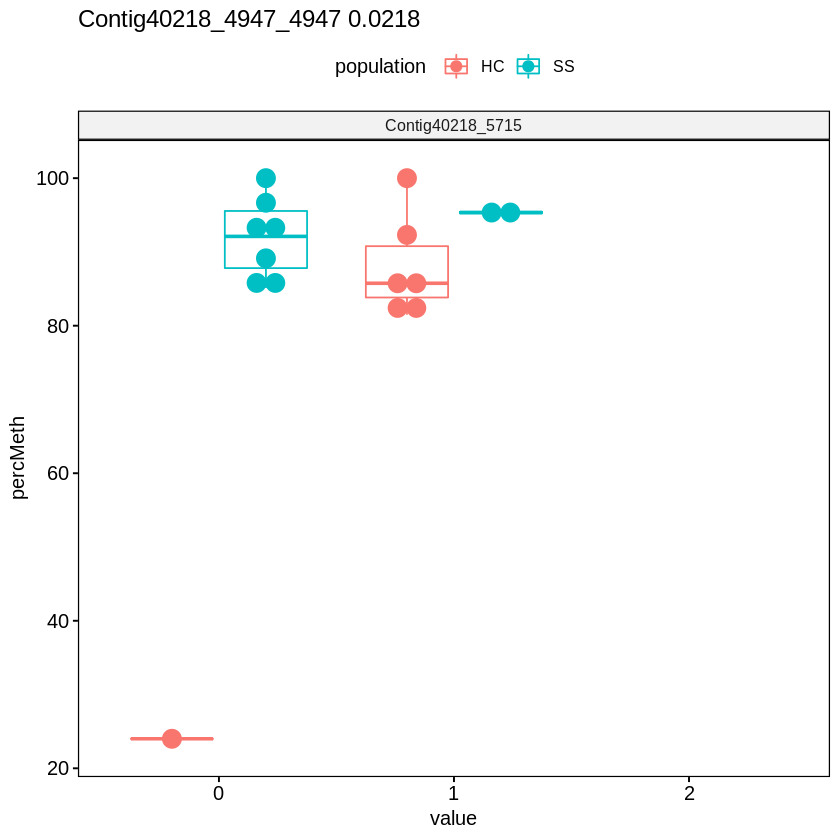

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



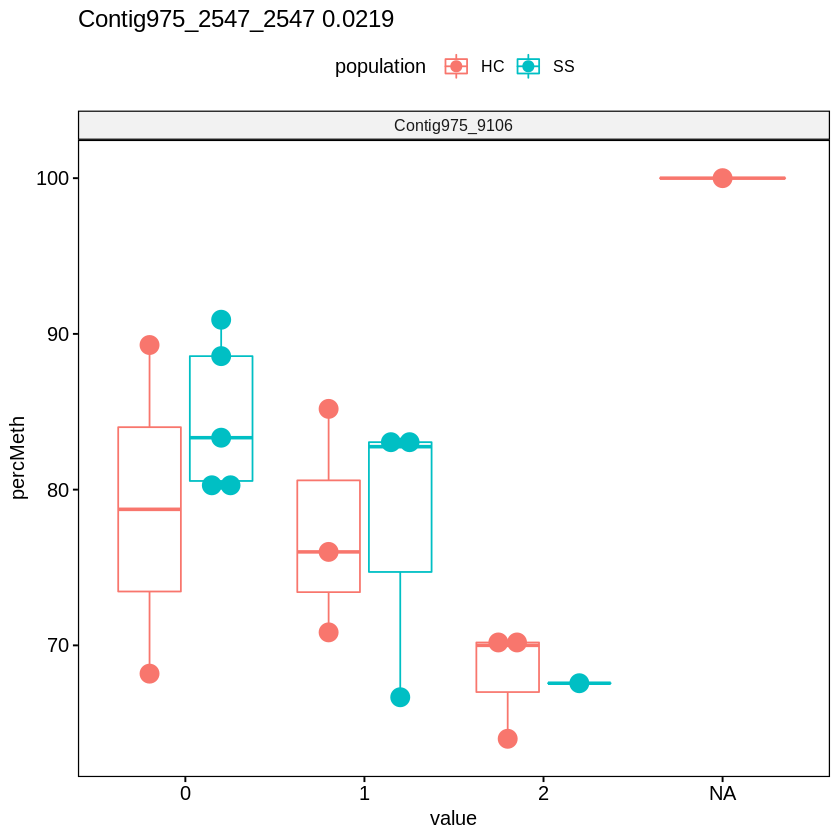

Warning message:
"Removed 1 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 1 rows containing non-finite values (stat_bindot)."


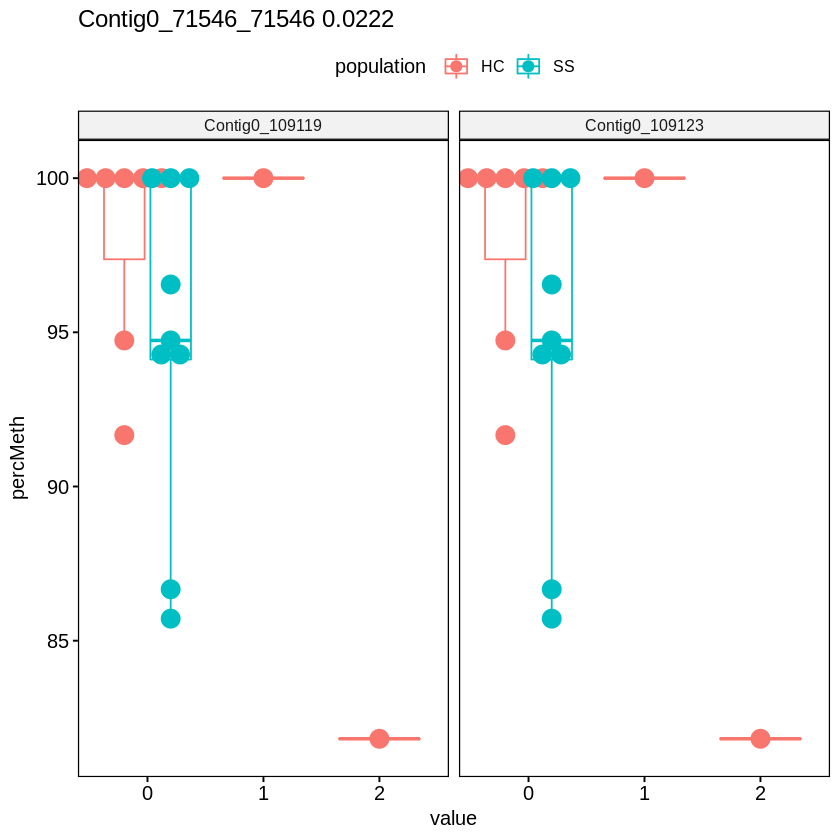

Warning message:
"Removed 3 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 3 rows containing non-finite values (stat_bindot)."


Warning message:
"Removed 4 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 4 rows containing non-finite values (stat_bindot)."


Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 2 rows containing non-finite values (stat_bindot)."


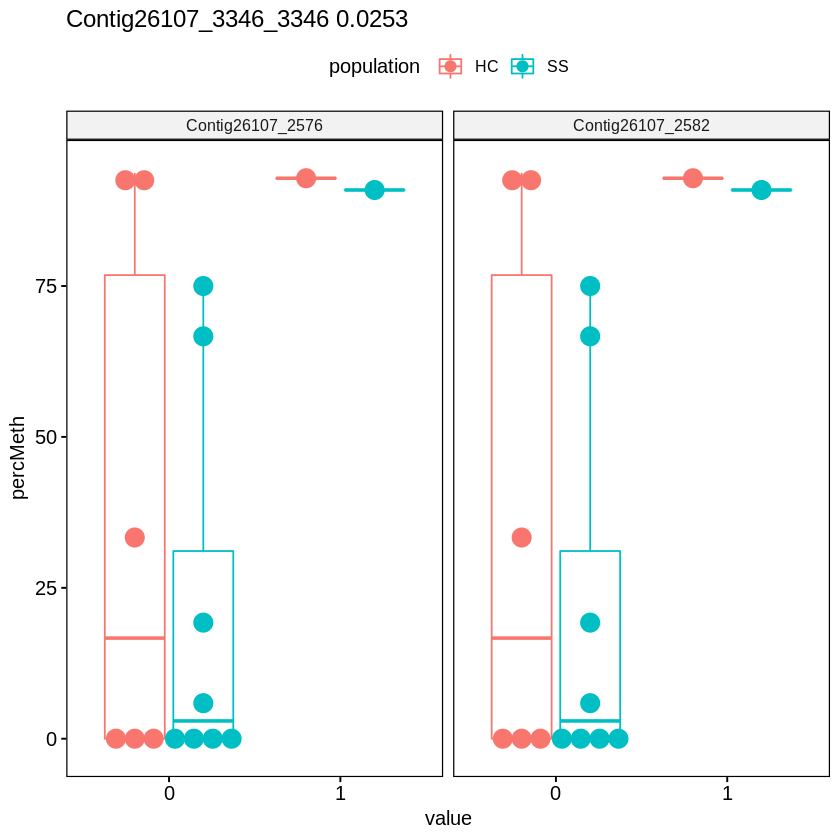

Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 2 rows containing non-finite values (stat_bindot)."


Warning message:
"Removed 1 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 1 rows containing non-finite values (stat_bindot)."


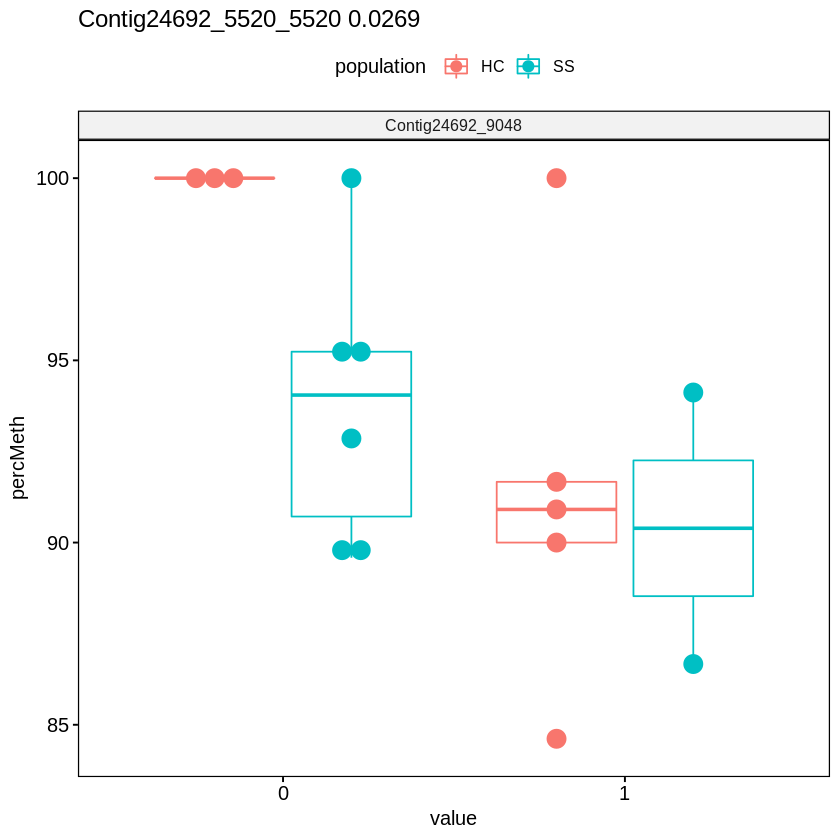

Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 2 rows containing non-finite values (stat_bindot)."


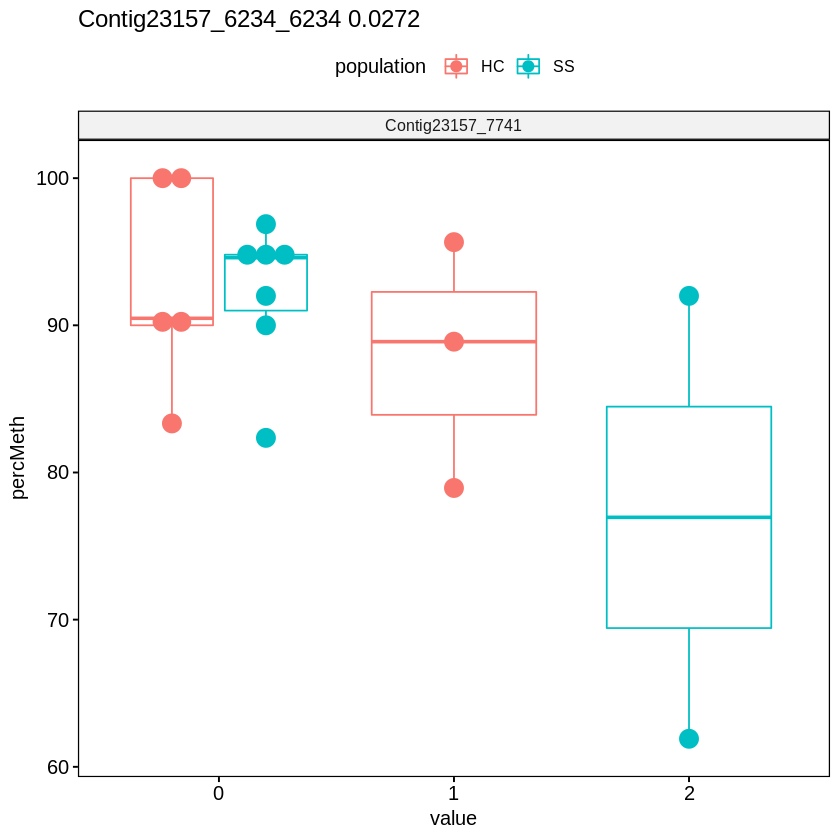

Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 2 rows containing non-finite values (stat_bindot)."


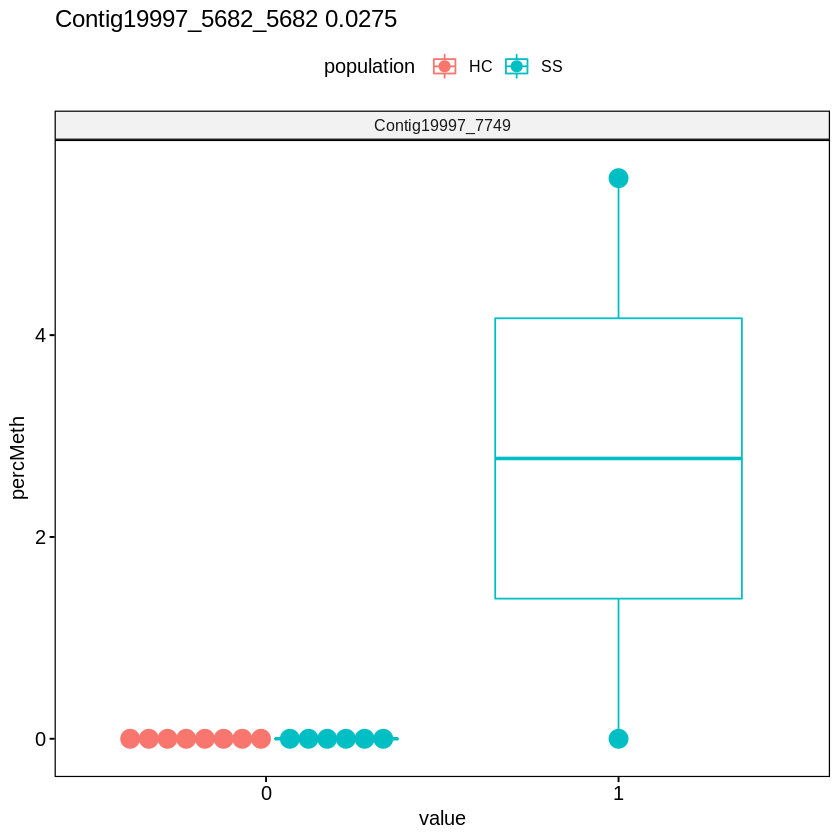

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



Warning message:
"Removed 3 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 3 rows containing non-finite values (stat_bindot)."


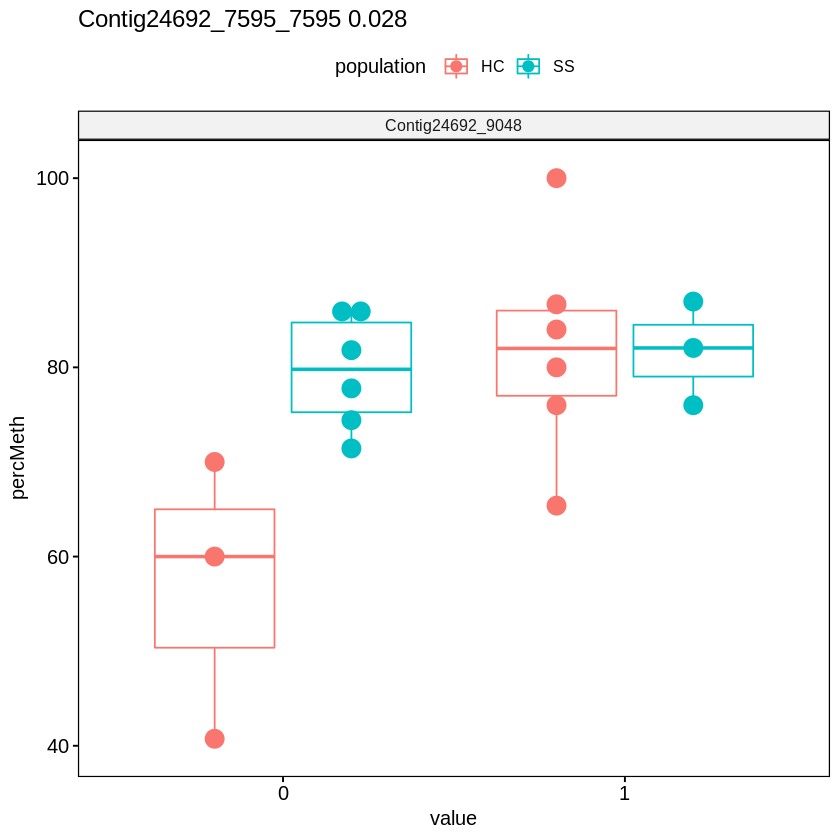

Warning message:
"Removed 1 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 1 rows containing non-finite values (stat_bindot)."


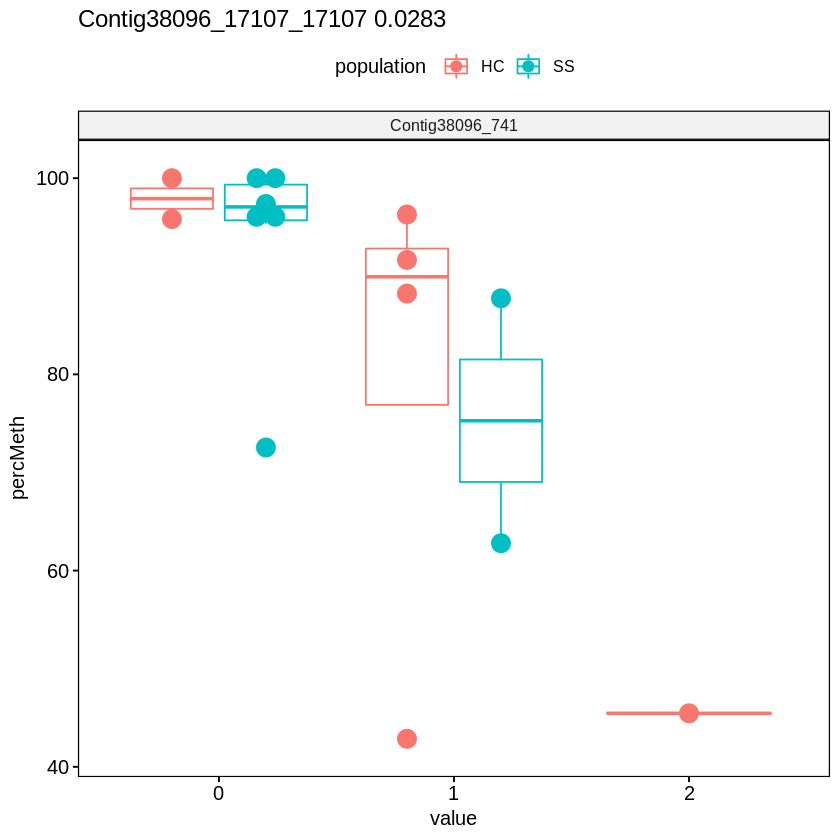

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 2 rows containing non-finite values (stat_bindot)."


`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 2 rows containing non-finite values (stat_bindot)."


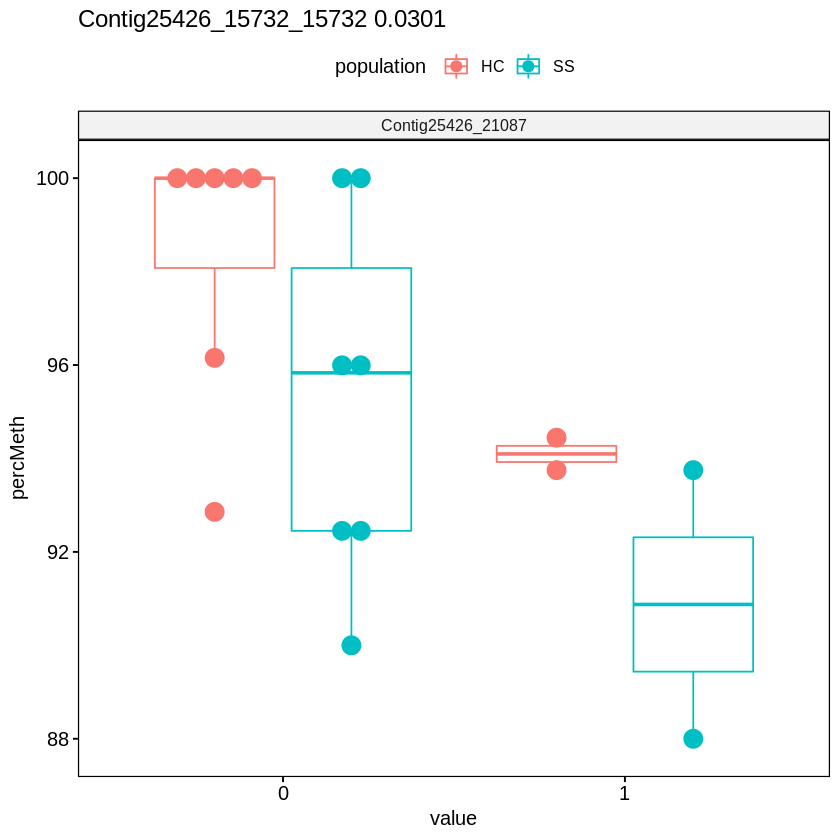

Warning message:
"Removed 3 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 3 rows containing non-finite values (stat_bindot)."


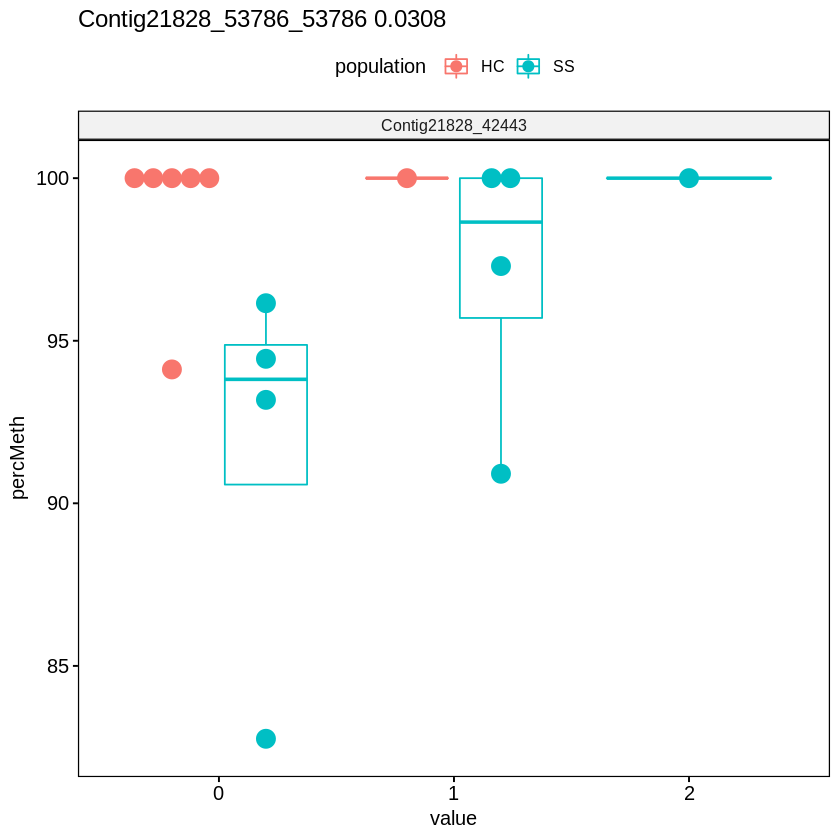

Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 2 rows containing non-finite values (stat_bindot)."


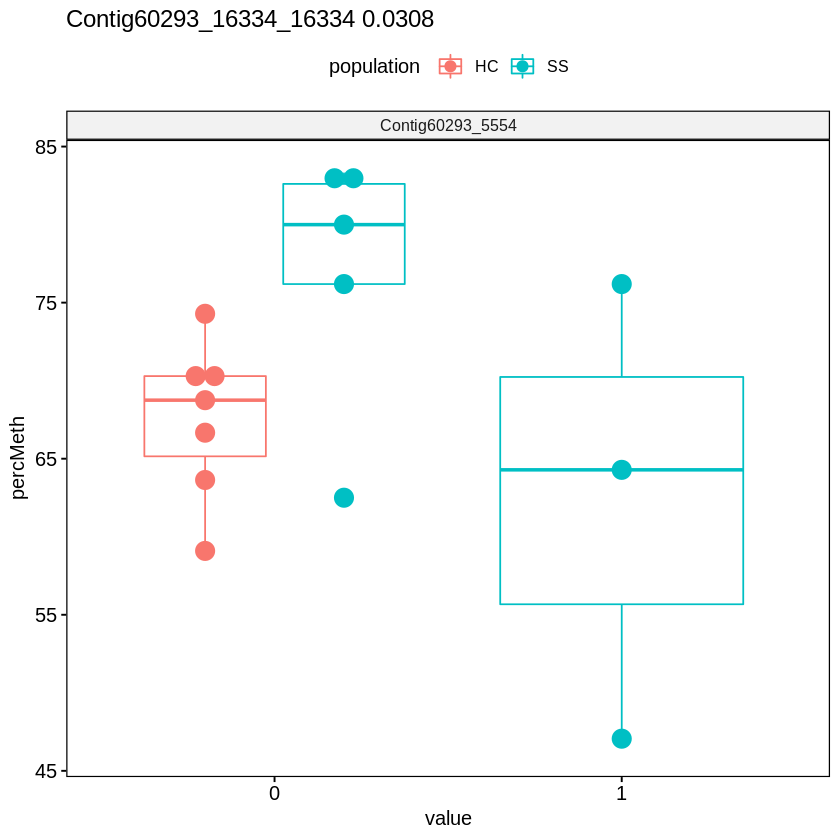

Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 2 rows containing non-finite values (stat_bindot)."


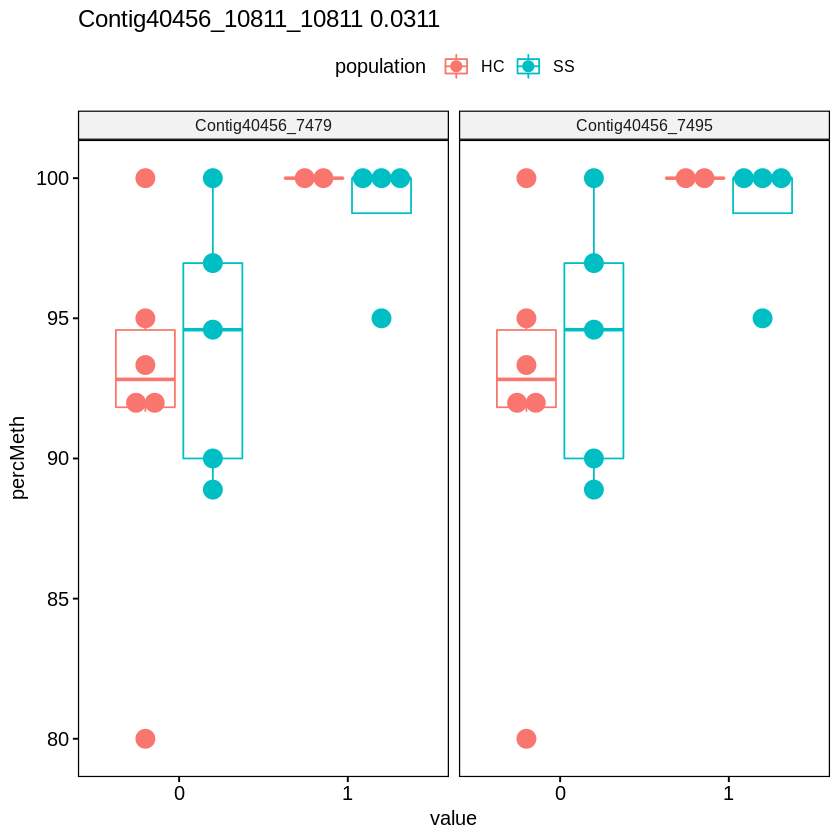

Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 2 rows containing non-finite values (stat_bindot)."


Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 2 rows containing non-finite values (stat_bindot)."


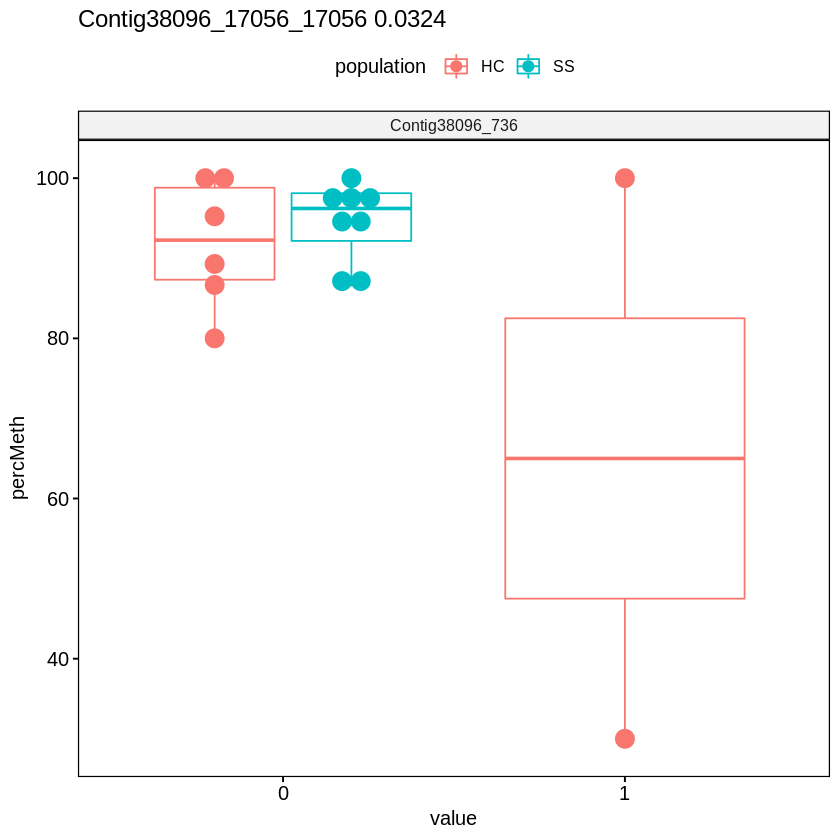

Warning message:
"Removed 1 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 1 rows containing non-finite values (stat_bindot)."


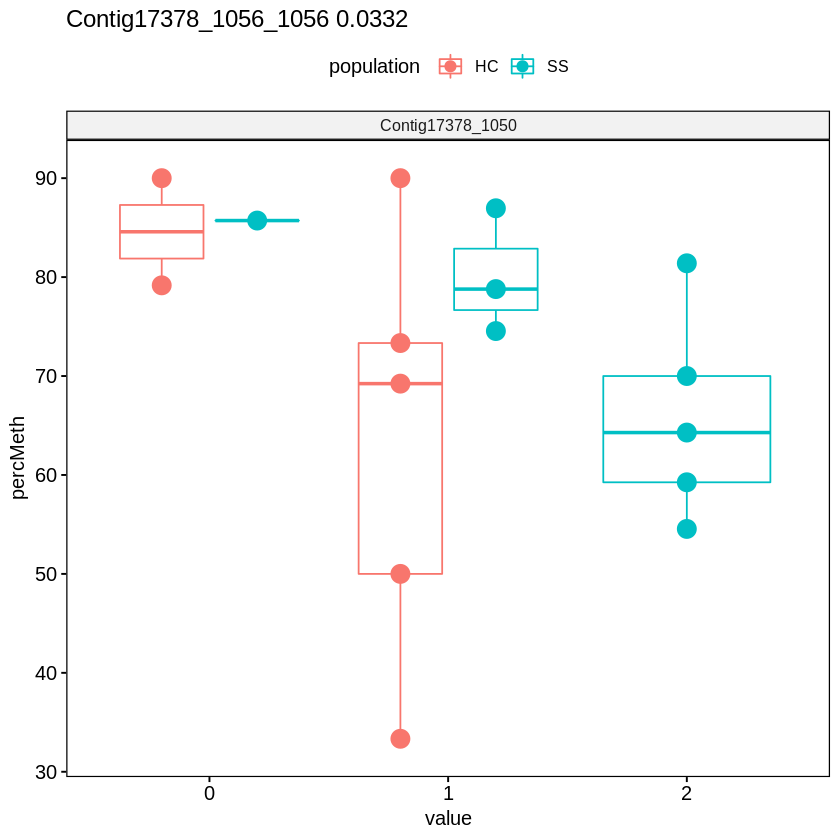

Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 2 rows containing non-finite values (stat_bindot)."


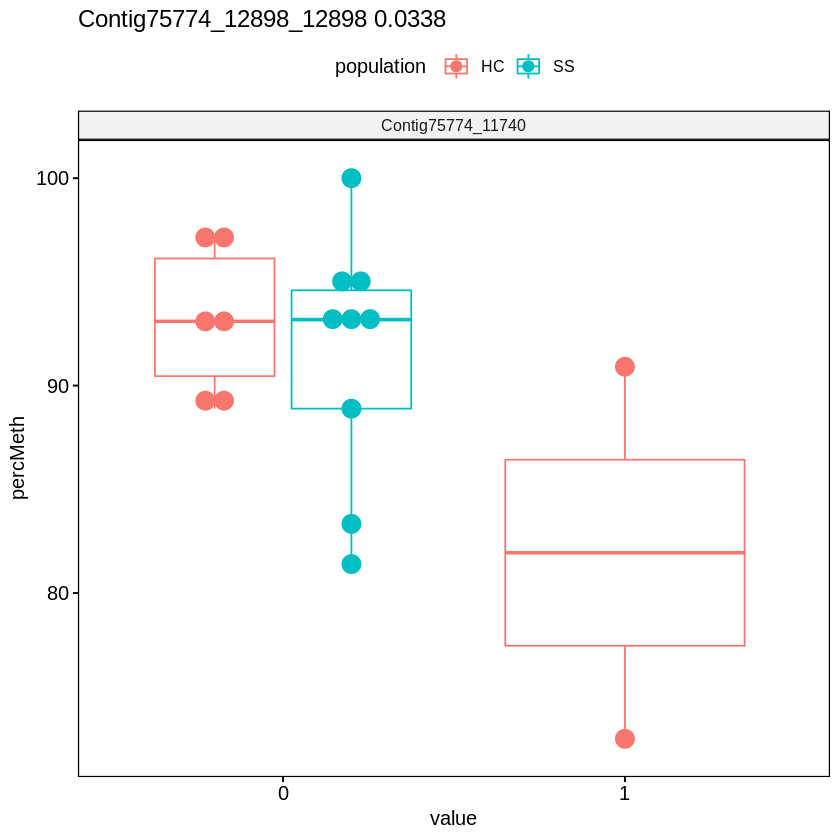

Warning message:
"Removed 1 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 1 rows containing non-finite values (stat_bindot)."


Warning message:
"Removed 8 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 8 rows containing non-finite values (stat_bindot)."


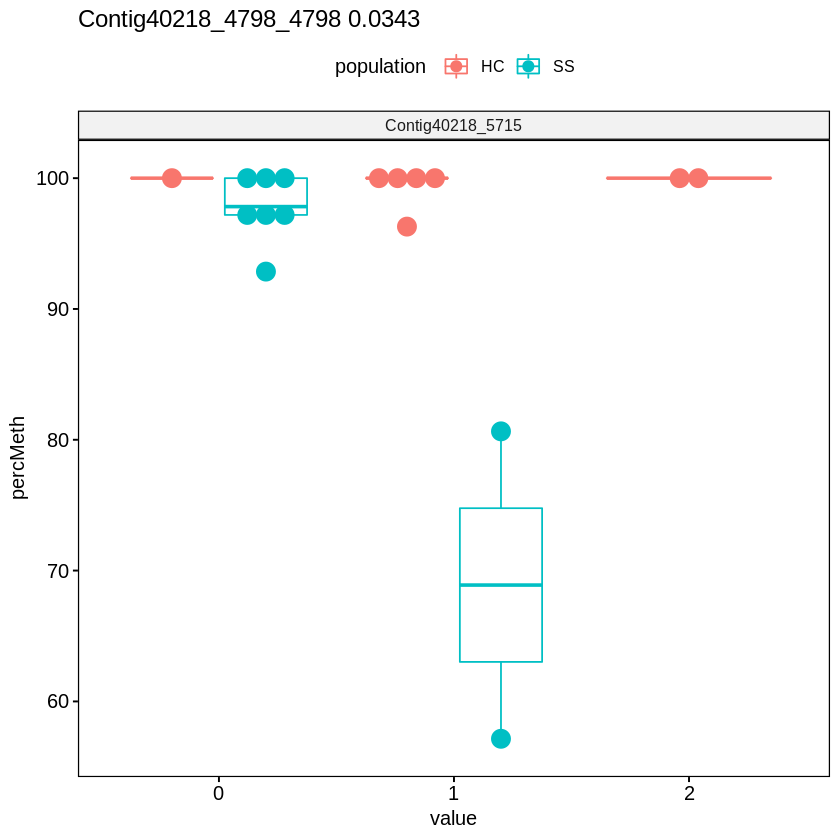

Warning message:
"Removed 3 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 3 rows containing non-finite values (stat_bindot)."


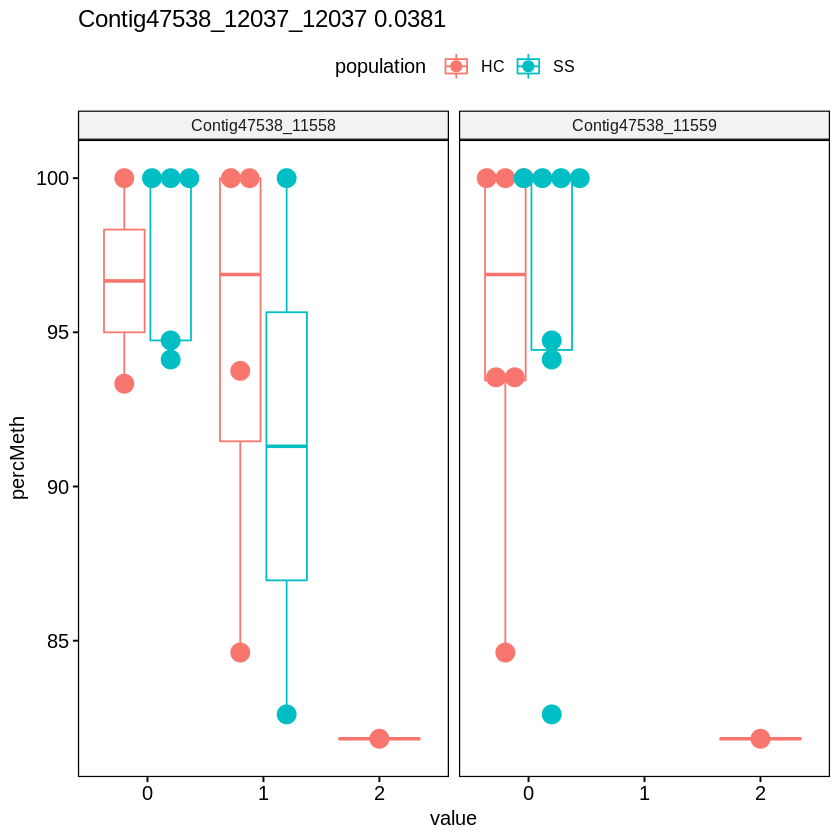

Warning message:
"Removed 1 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 1 rows containing non-finite values (stat_bindot)."


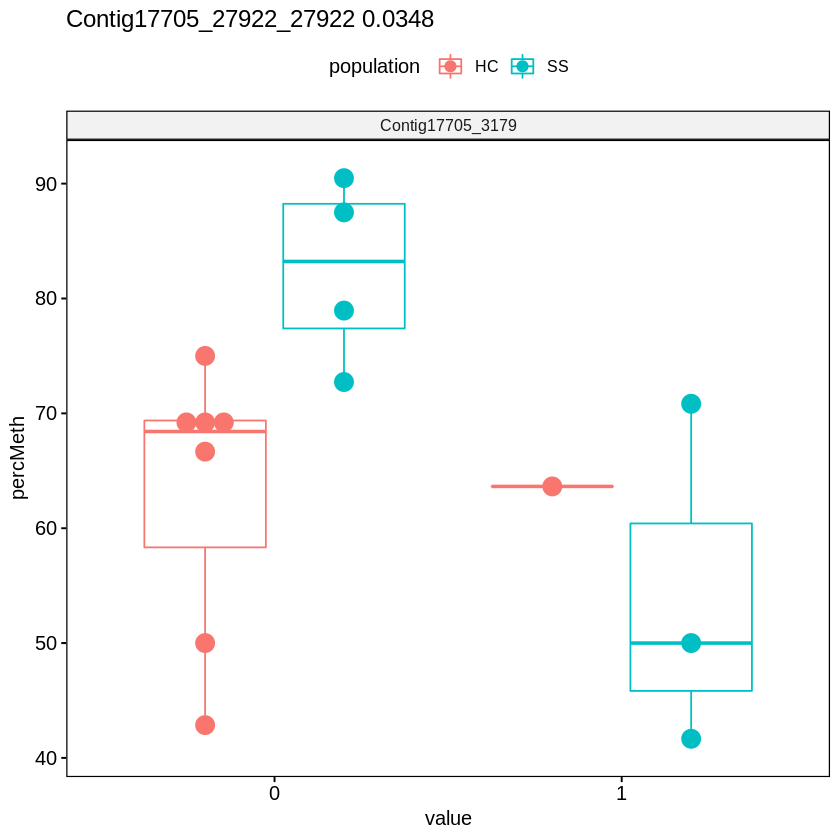

Warning message:
"Removed 3 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 3 rows containing non-finite values (stat_bindot)."


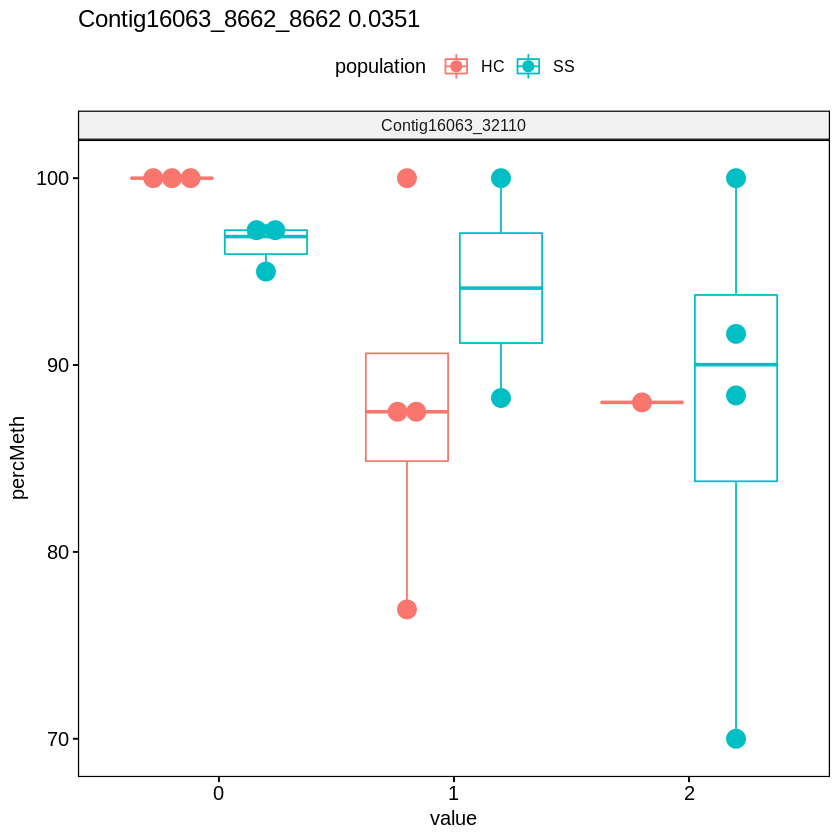

Warning message:
"Removed 4 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 4 rows containing non-finite values (stat_bindot)."


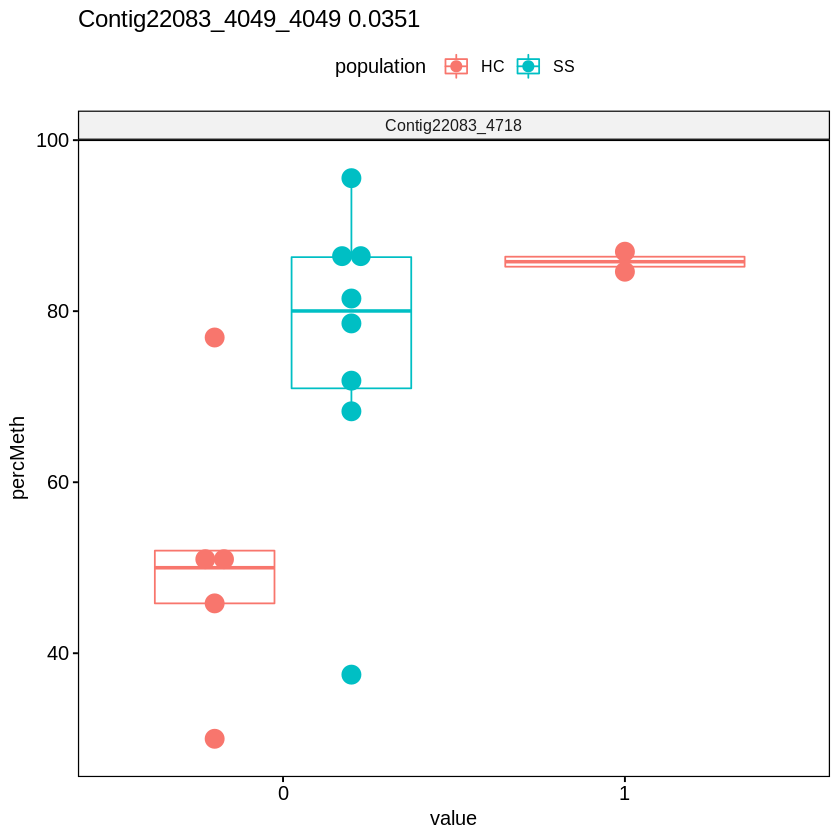

Warning message:
"Removed 1 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 1 rows containing non-finite values (stat_bindot)."


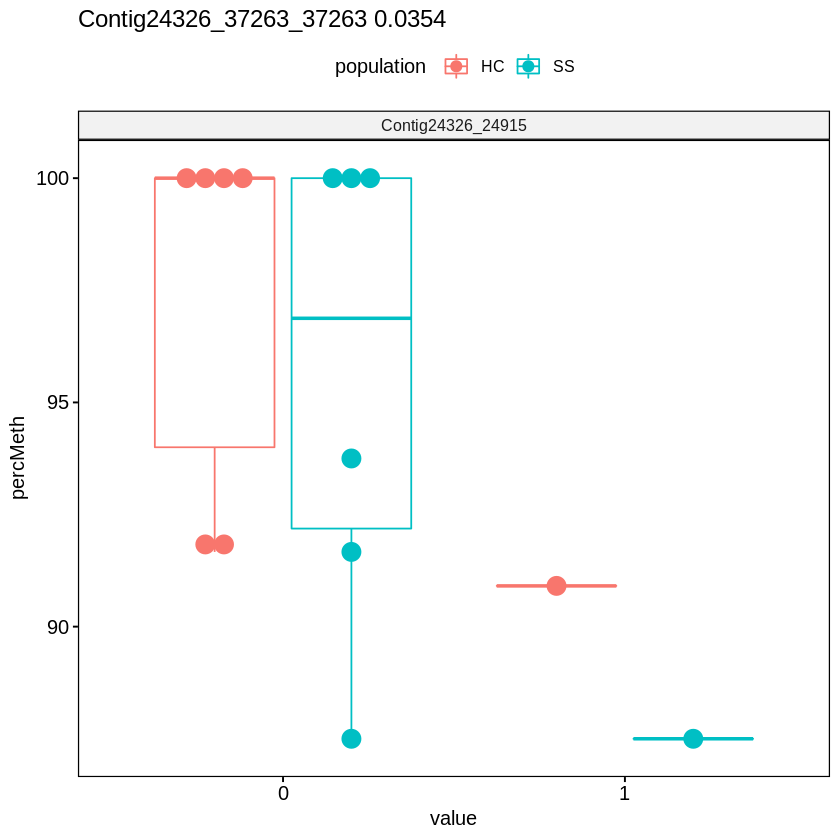

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



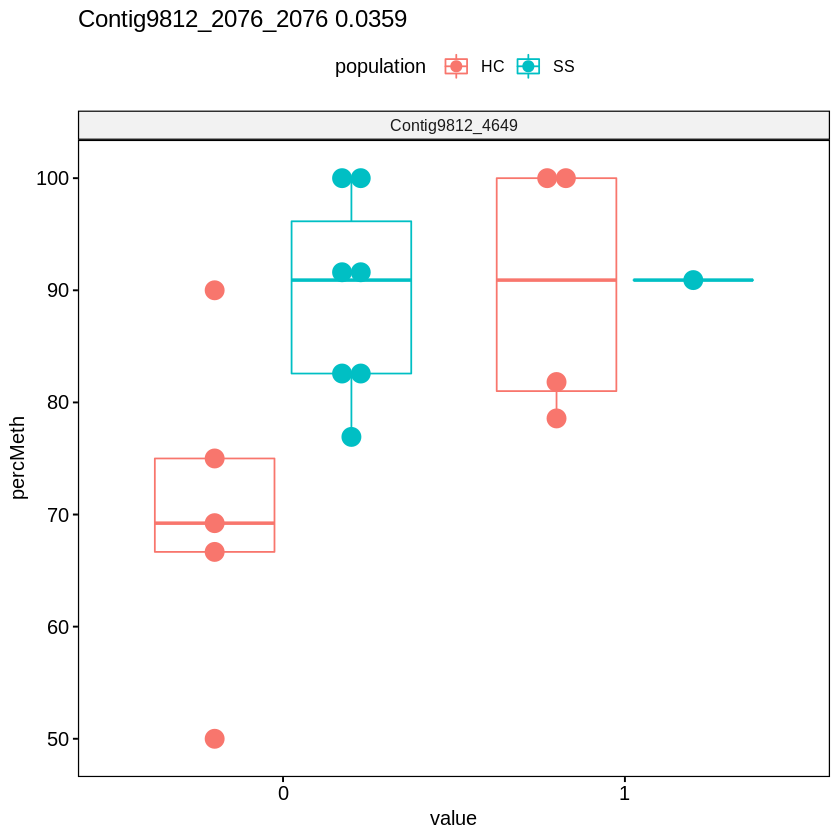

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



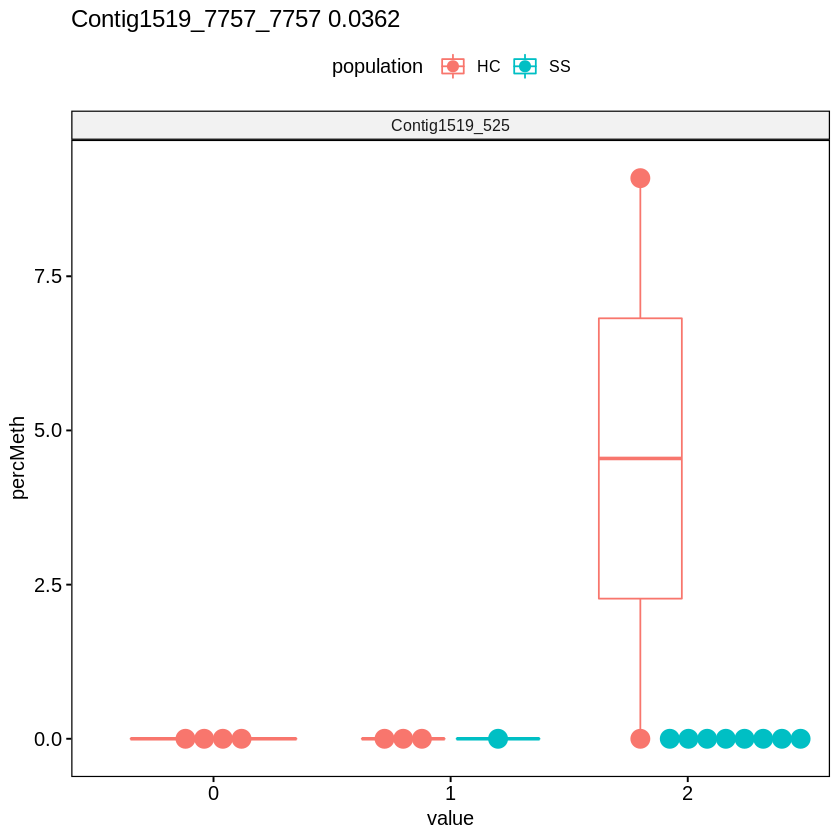

Warning message:
"Removed 3 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 3 rows containing non-finite values (stat_bindot)."


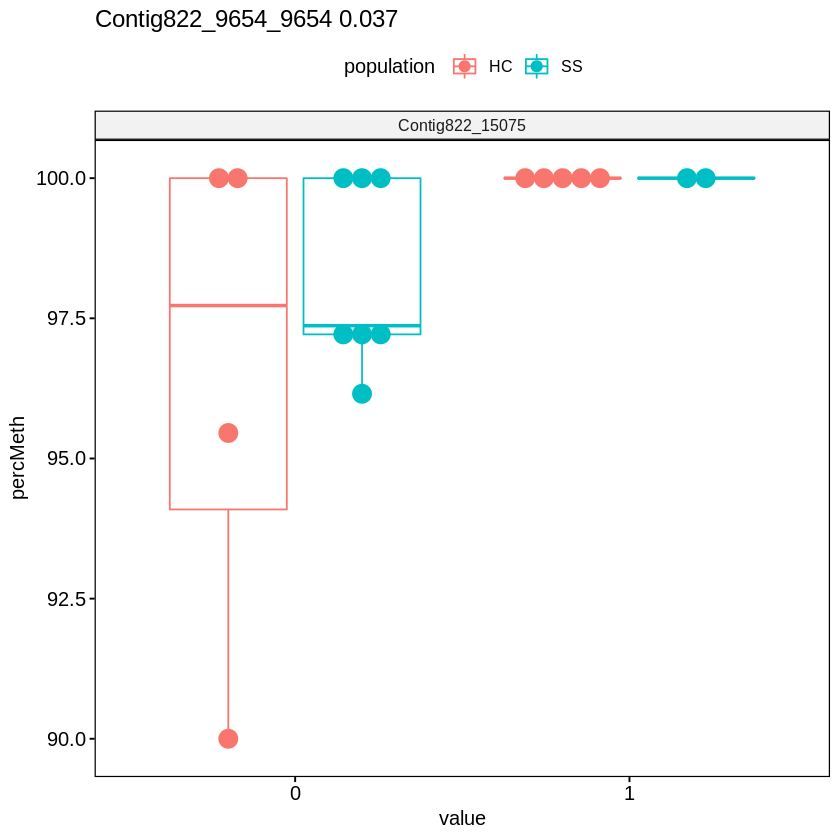

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



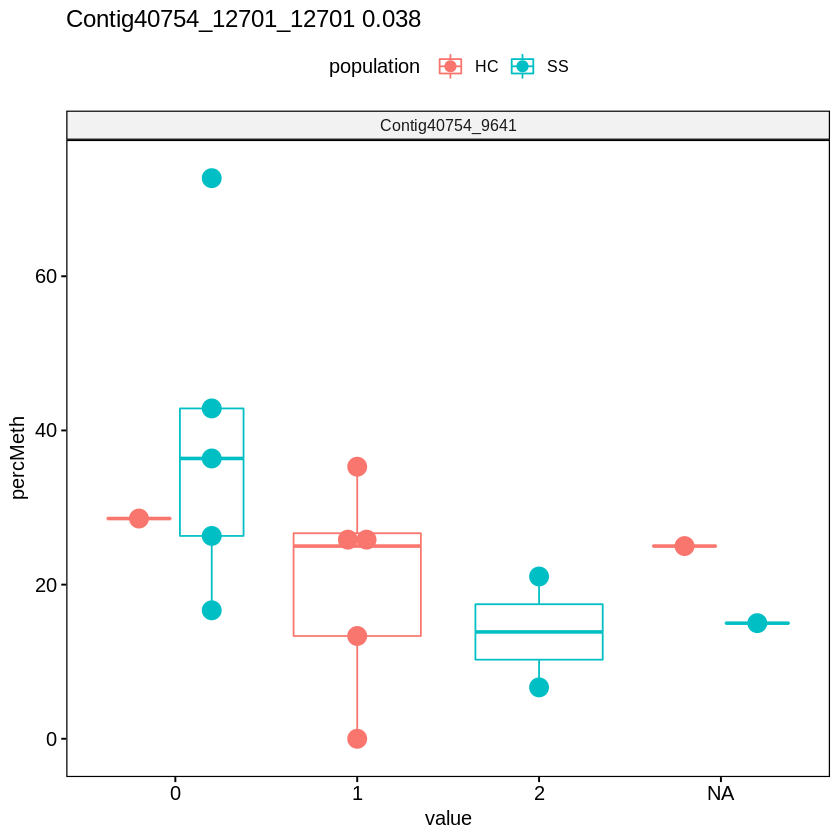

Warning message:
"Removed 1 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 1 rows containing non-finite values (stat_bindot)."


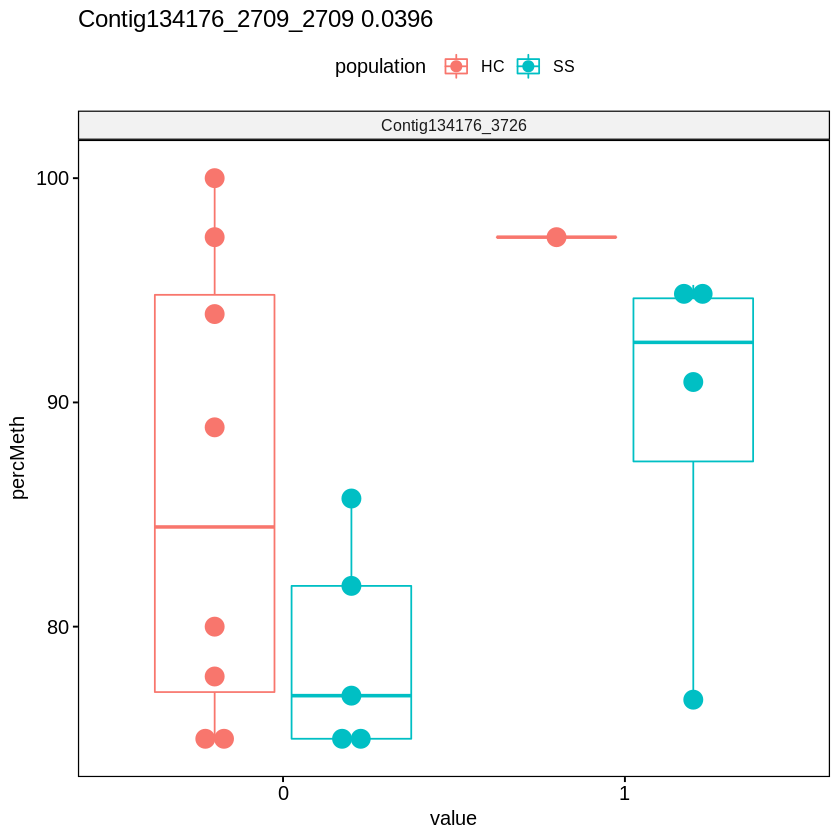

Warning message:
"Removed 3 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 3 rows containing non-finite values (stat_bindot)."


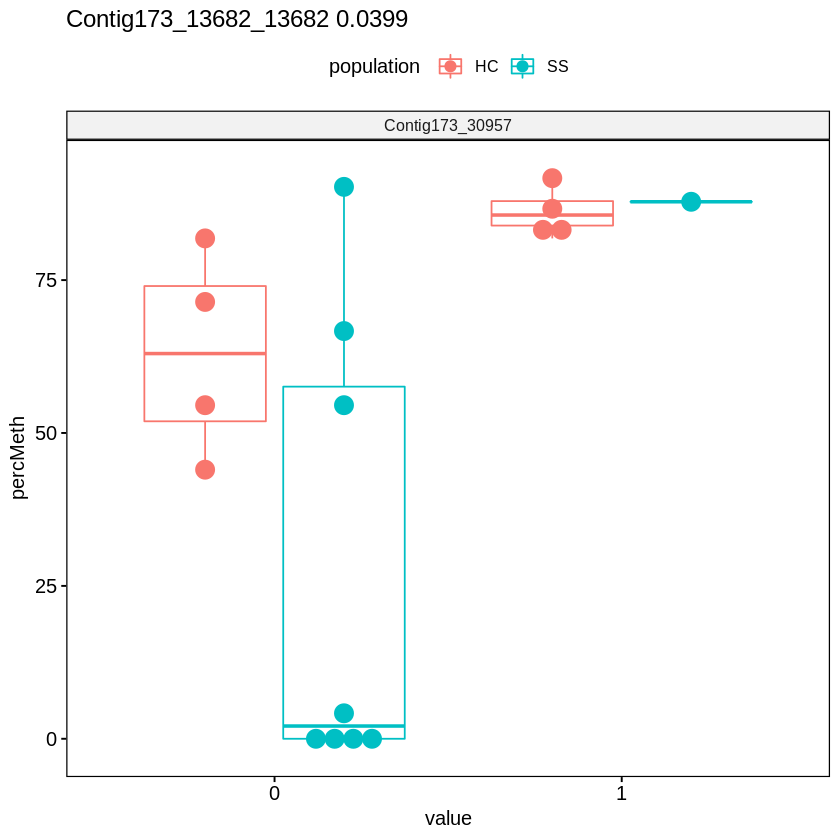

Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 2 rows containing non-finite values (stat_bindot)."


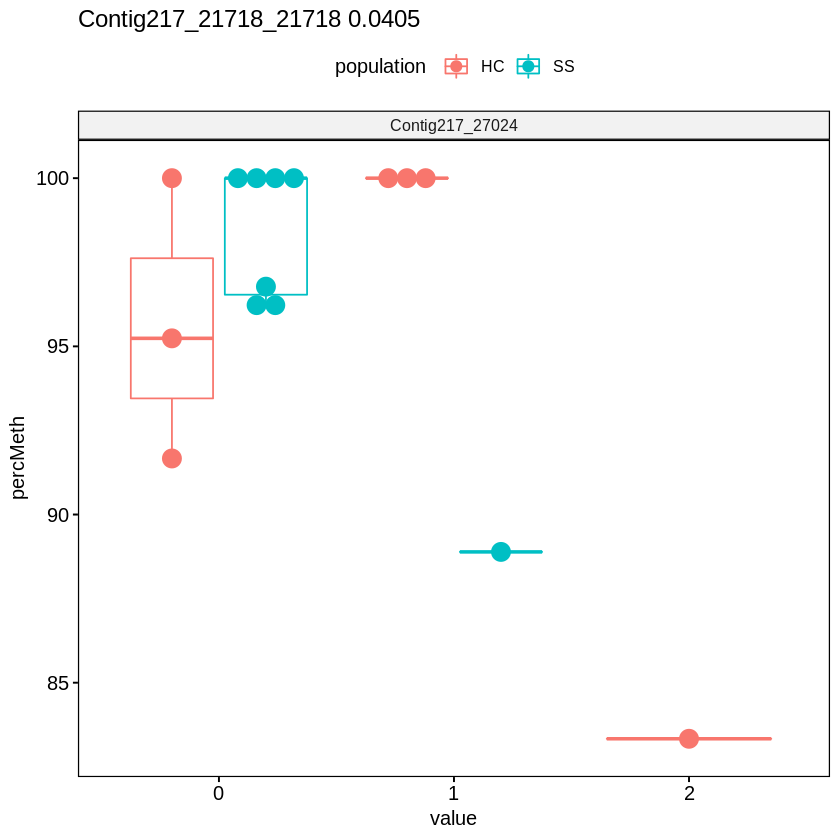

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



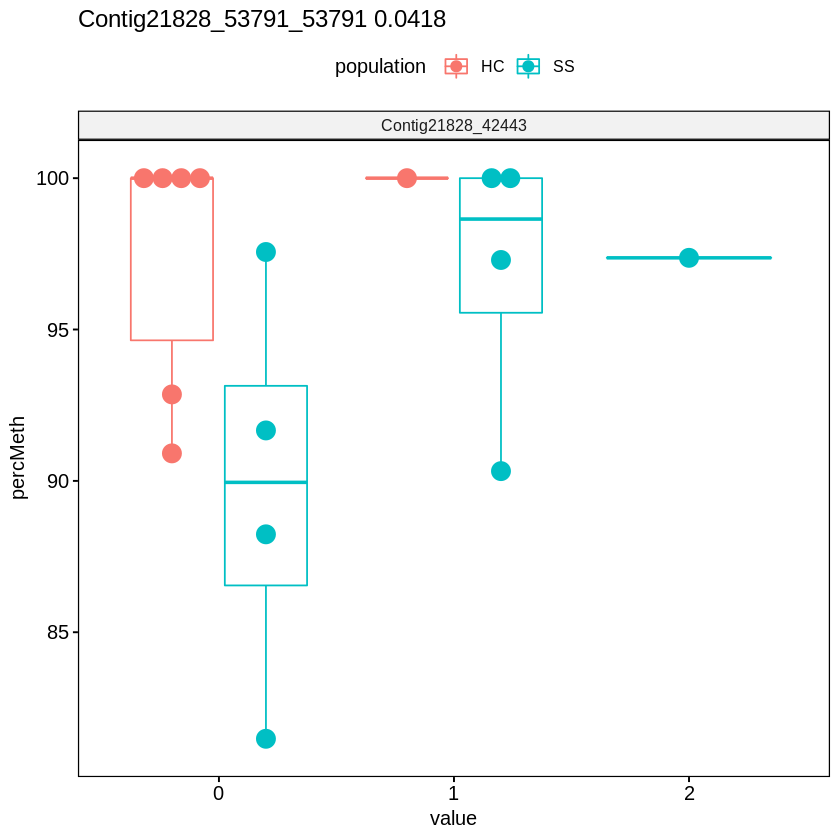

Warning message:
"Removed 3 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 3 rows containing non-finite values (stat_bindot)."


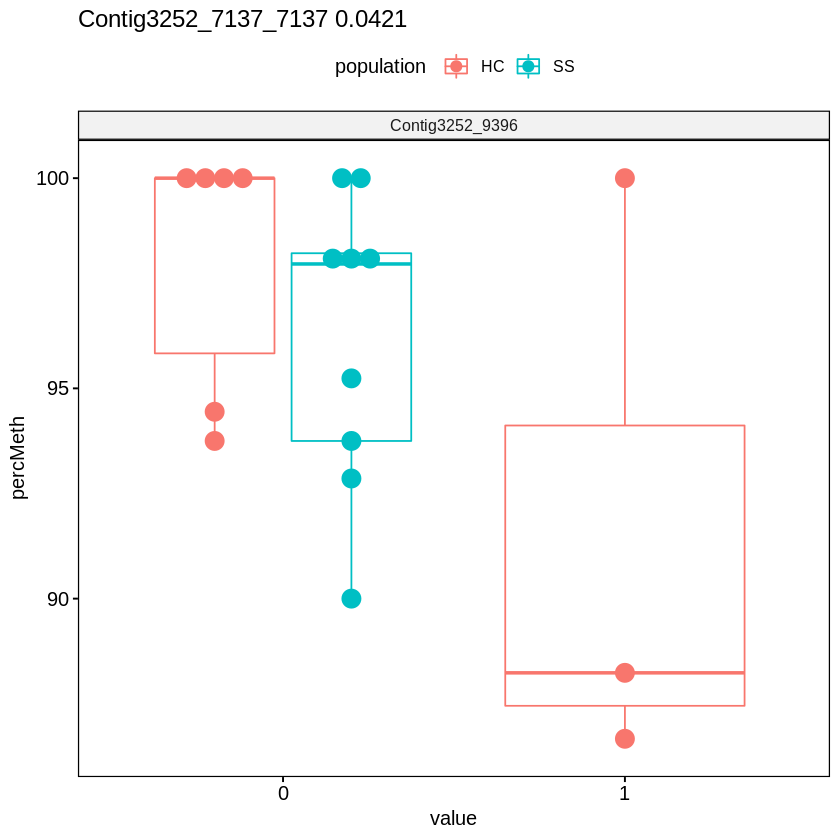

Warning message:
"Removed 1 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 1 rows containing non-finite values (stat_bindot)."


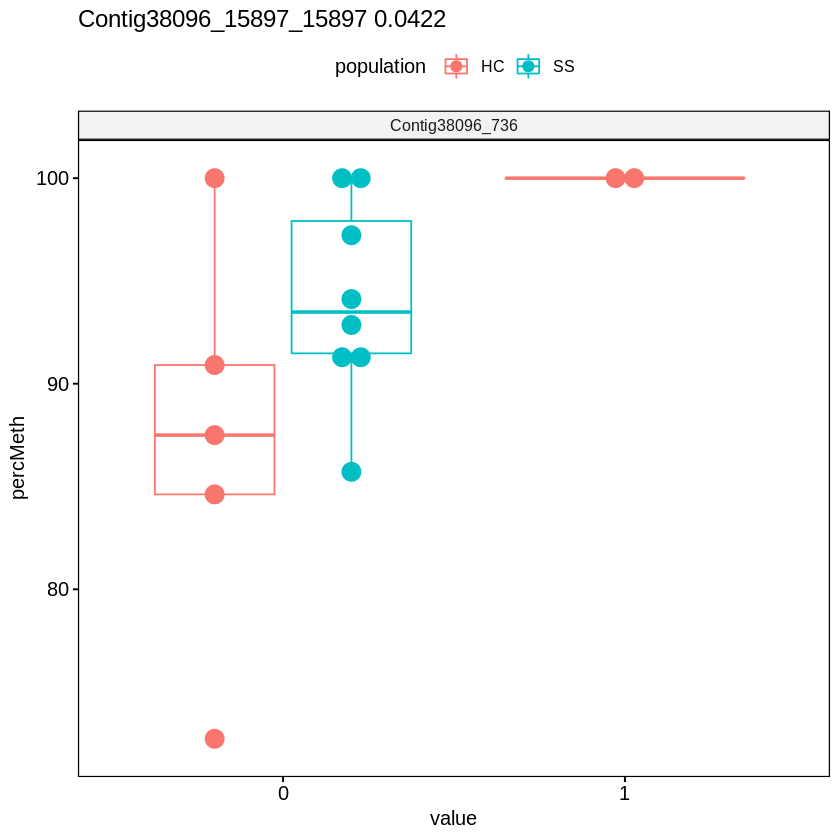

Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 2 rows containing non-finite values (stat_bindot)."


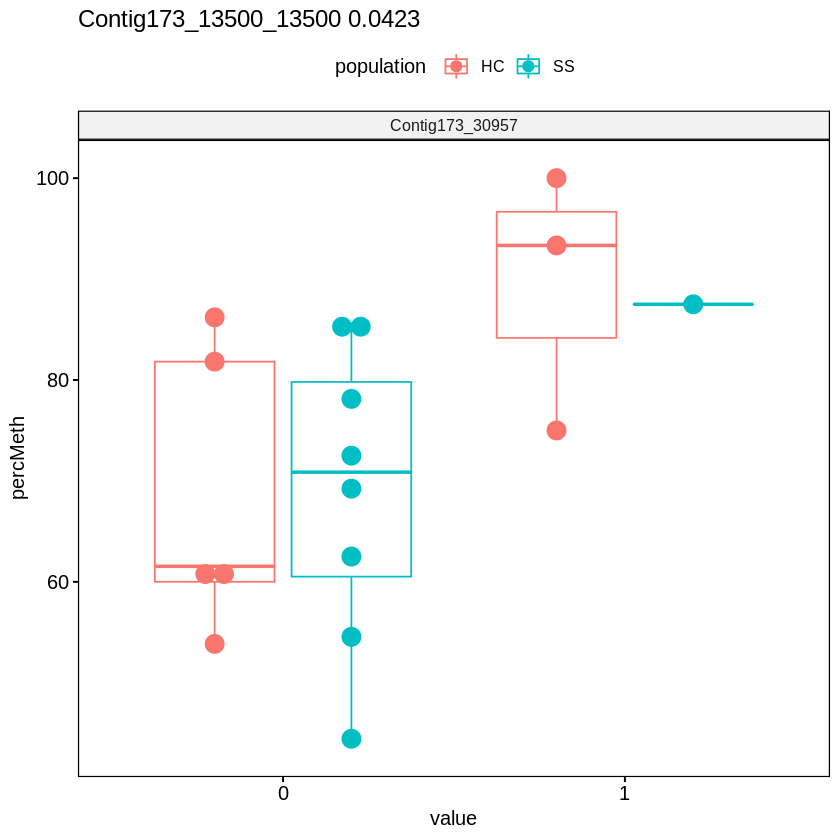

Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 2 rows containing non-finite values (stat_bindot)."


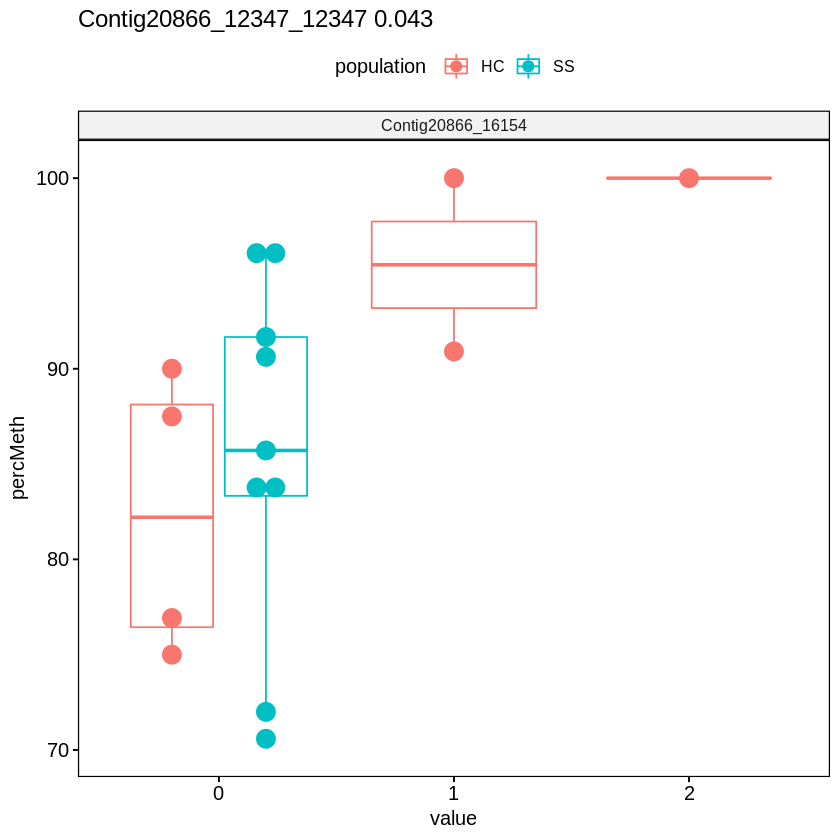

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



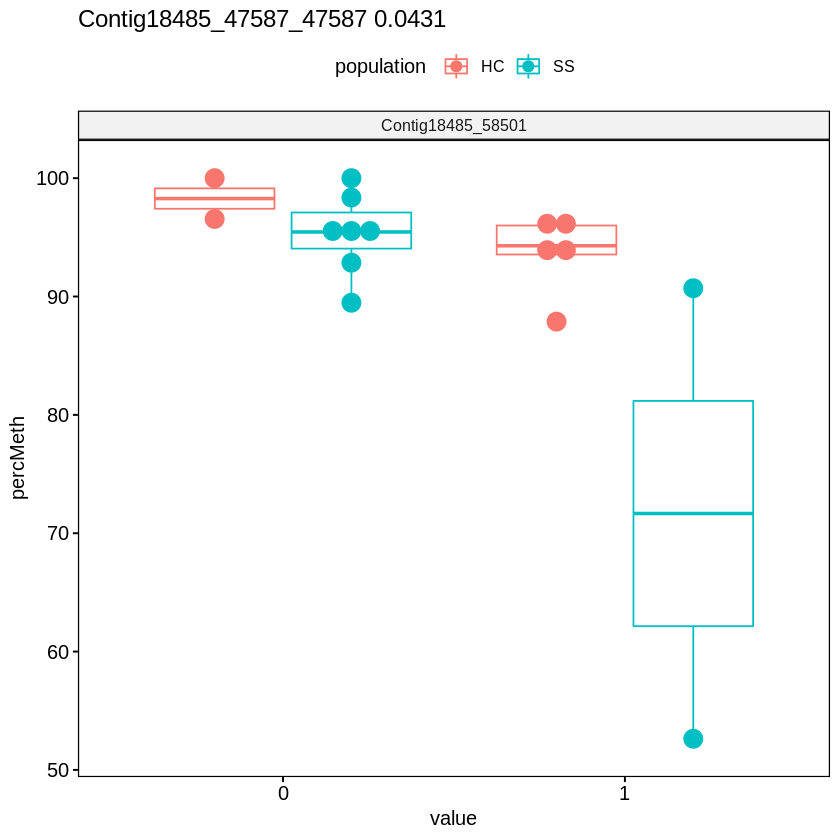

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



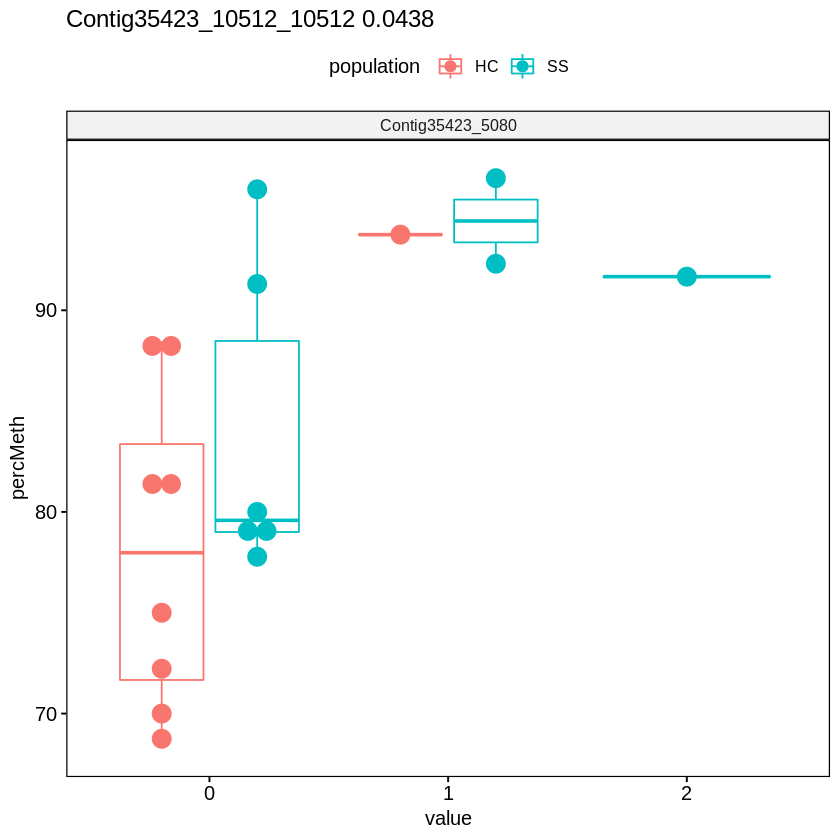

Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 2 rows containing non-finite values (stat_bindot)."


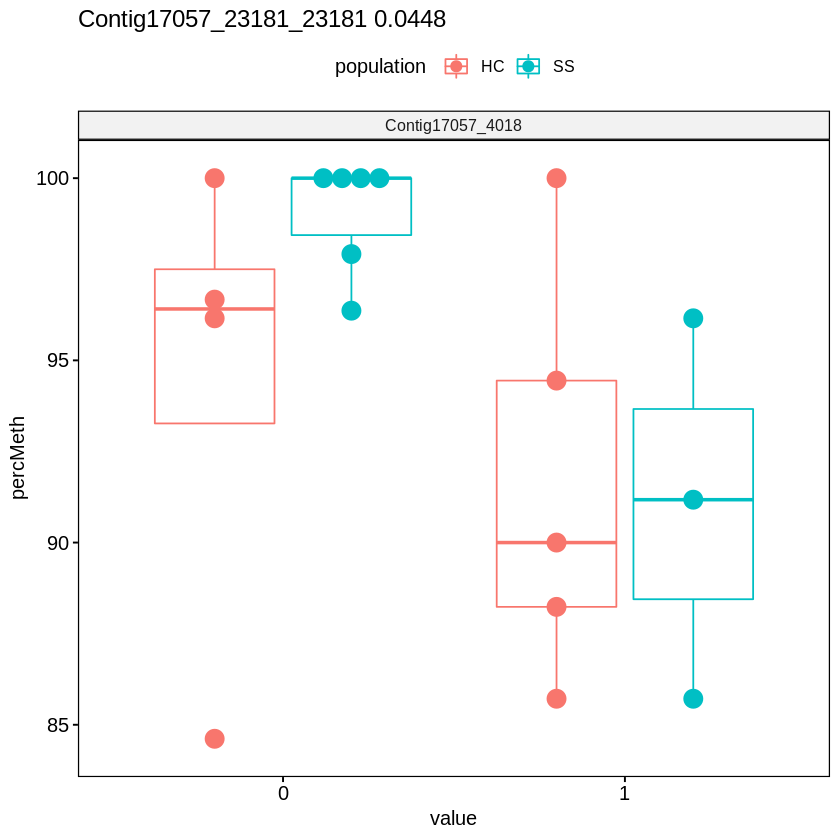

Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 2 rows containing non-finite values (stat_bindot)."


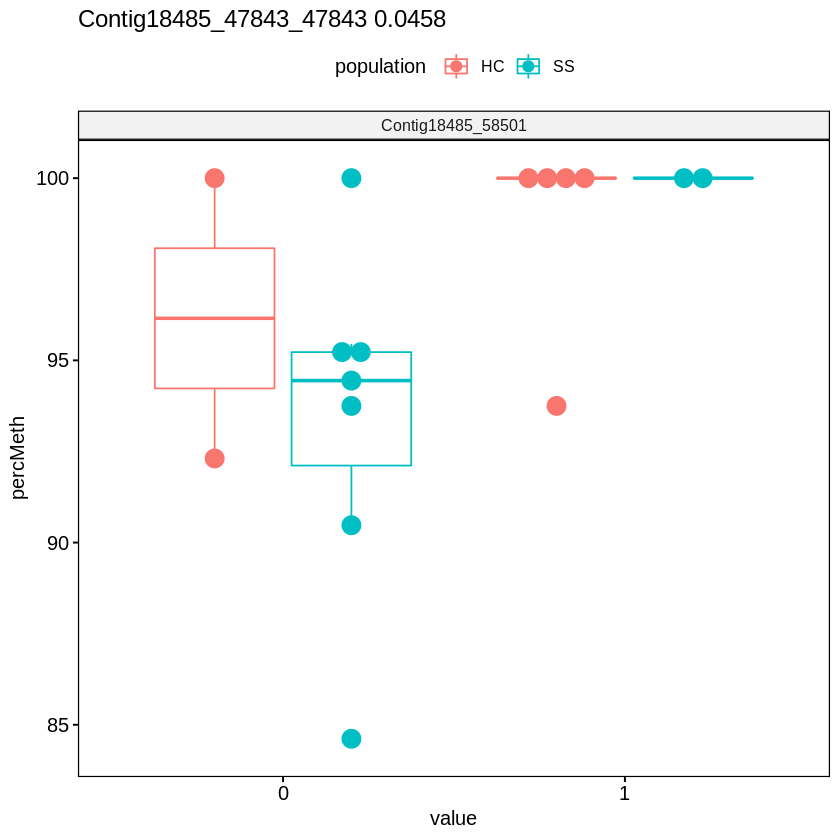

Warning message:
"Removed 3 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 3 rows containing non-finite values (stat_bindot)."


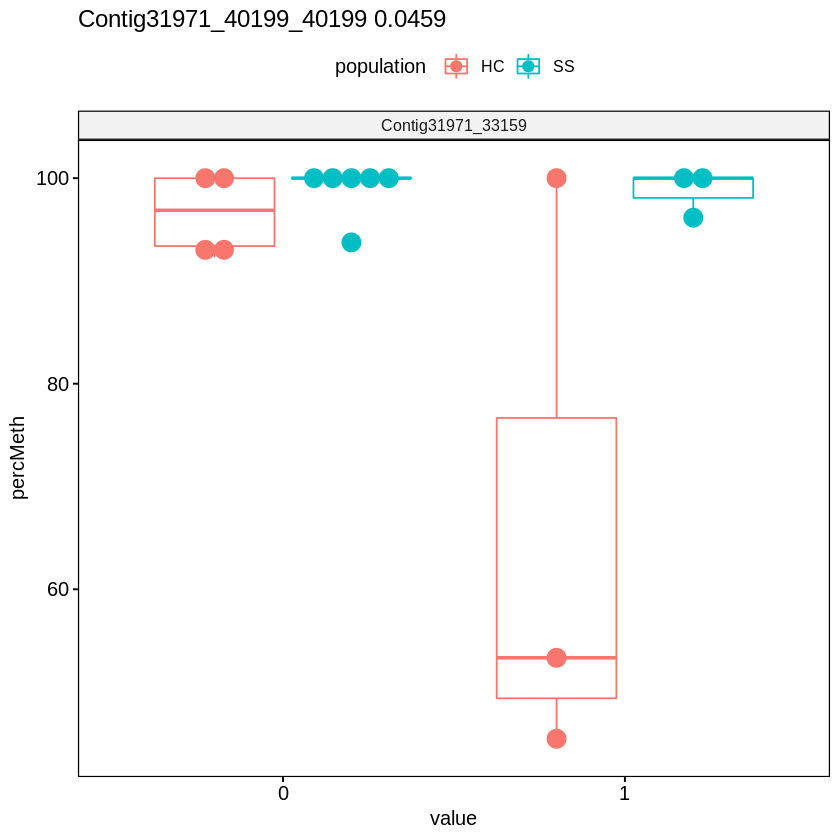

Warning message:
"Removed 1 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 1 rows containing non-finite values (stat_bindot)."


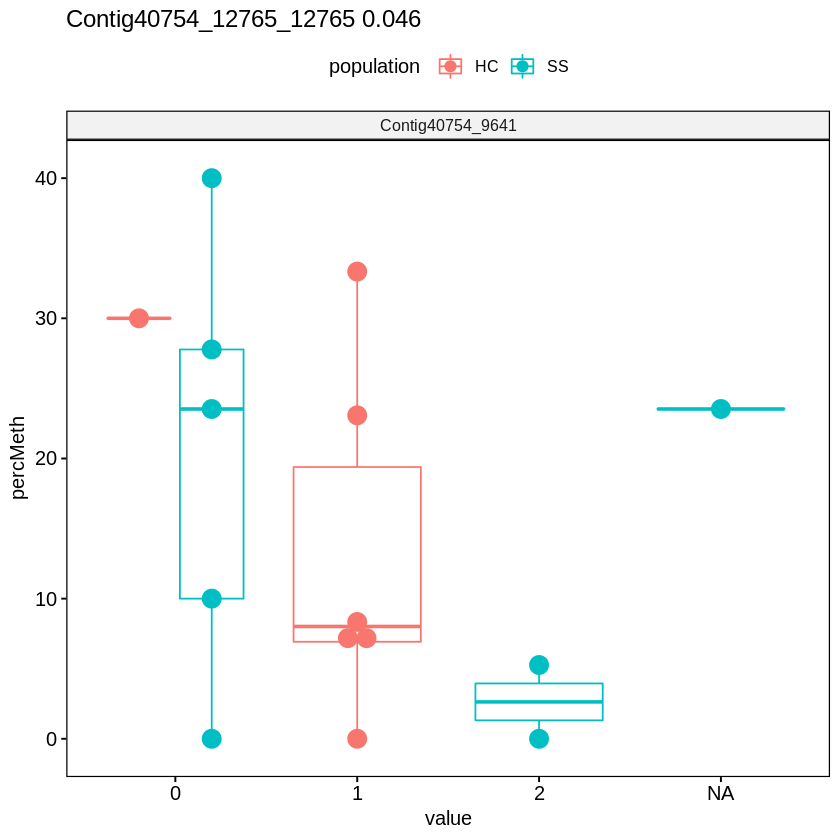

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 2 rows containing non-finite values (stat_bindot)."


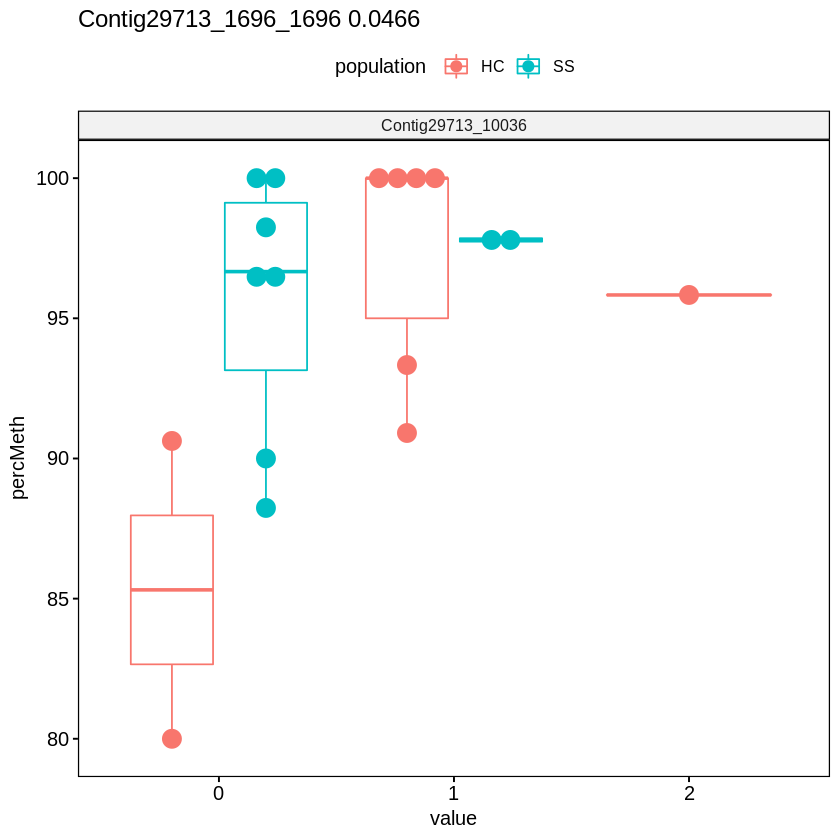

Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 2 rows containing non-finite values (stat_bindot)."


`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



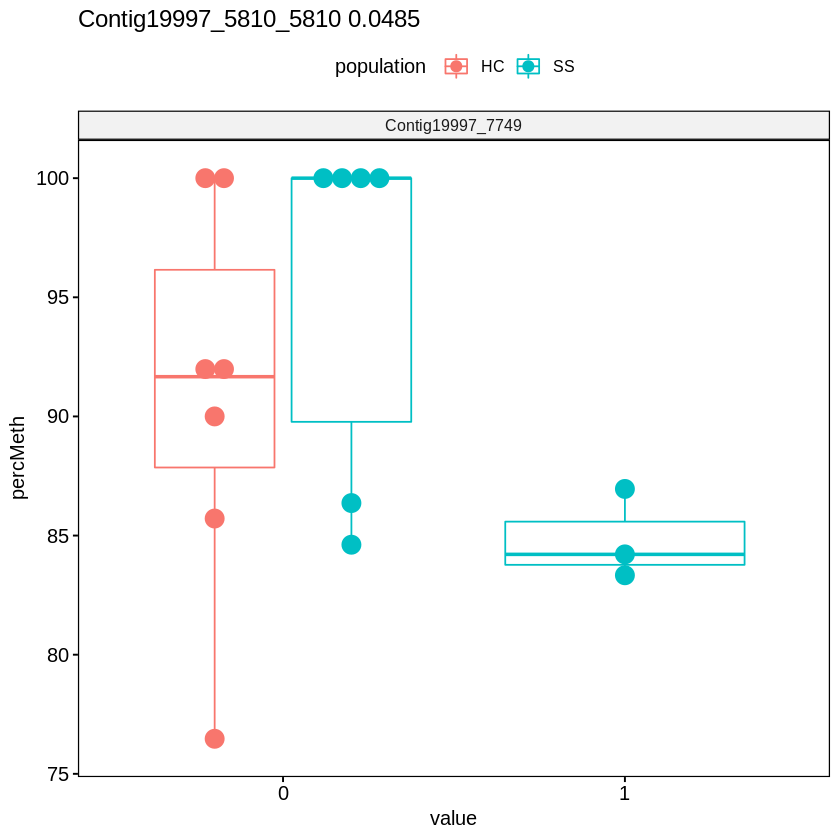

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



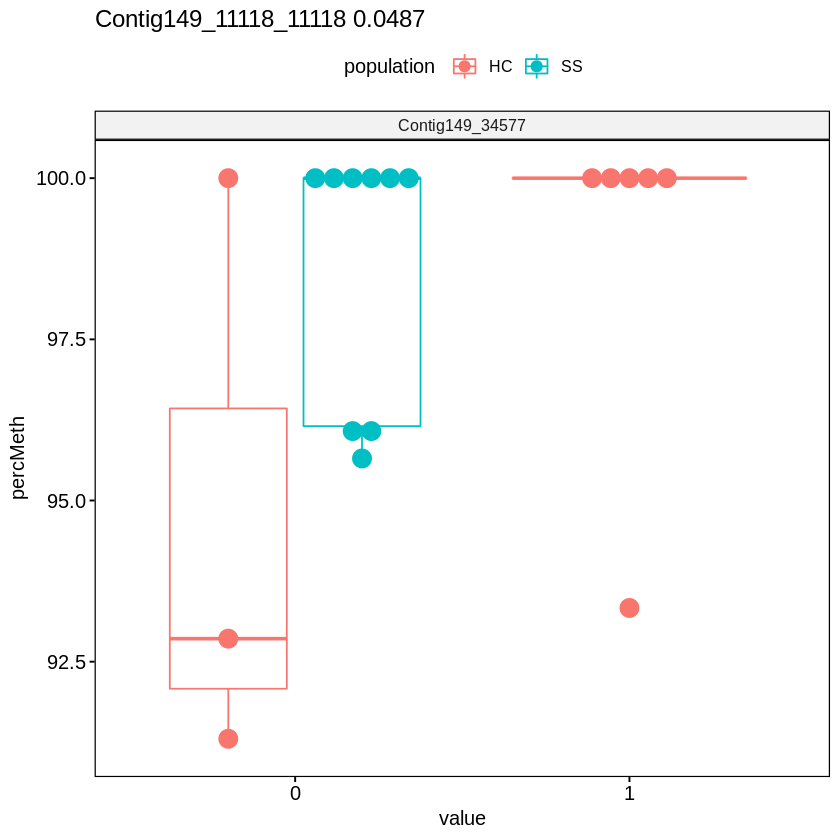

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



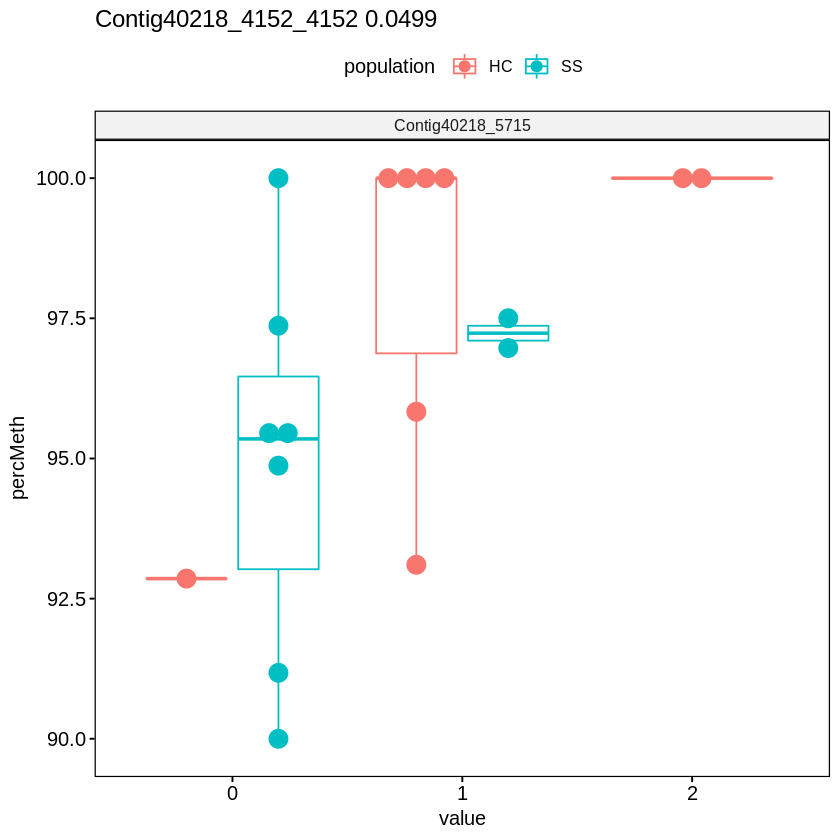

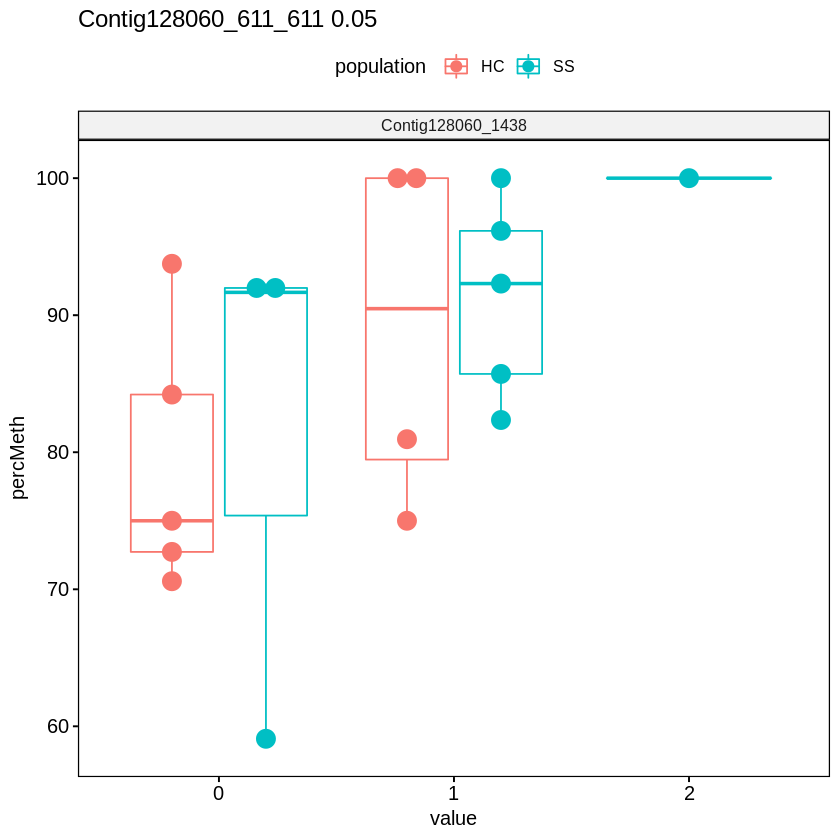

In [356]:
for(gene in unique(meS$cis$eqtls$gene)){
    m <- perc_meth %>% filter(site==gene)
s <- meS$cis$eqtls[which(meS$cis$eqtls$gene == gene),]$snps
    pval <- signif(mean_sigcis[which(mean_sigcis$gene == gene),"mean_pval"],digits=3)

g <- as.data.frame(t(geno[geno$id %in% s,]),stringsAsFactors = F)
colnames(g) <- g[1,]
g$sample <- rownames(g)
g <- g[-1,]
    
mer <- merge(m,g) %>% tidyr::gather("id","value",9:ncol(merge(m,g)))
mer$value <- as.numeric(mer$value)

plot <- mer %>%
ggboxplot(., x = "value", y= "percMeth",color="population", facet.by = c("id") , add ="dotplot") + 
    ggtitle(paste(gene,pval,sep=" "))
#stat_compare_means( method = "t.test",label="p.format") + ggtitle(gene)
print(plot)
}

In [214]:
m <- perc_meth %>% filter(site %in% meS$cis$eqtls$gene & population %in% "HC")
hist(m$percMeth,breaks = 20)

In [215]:
m <- perc_meth %>% filter(site %in% meS$cis$eqtls$gene & population %in% "SS")
hist(m$percMeth,breaks = 20)

### are there more cis mqtl than trans mqtl 

In [2]:
ncis_snpT = 349 
ncis_snp = 96 
ntran_snpT = 2860 
ntran_snp = 501

In [3]:
mat <- matrix(c(ncis_snp,ntran_snp,ncis_snpT-ncis_snp,ntran_snpT-ntran_snp),ncol=2)
dimnames(mat) <- list(c("cis","trans"),c("mQTL","non-mQTL"))
mat

mQTL non-mQTL
cis    96   253    
trans 501  2359

In [4]:
test <- chisq.test(mat)
test


	Pearson's Chi-squared test with Yates' continuity correction

data:  mat
X-squared = 19.844, df = 1, p-value = 8.403e-06


## Enrichment

#### Make background and cis beds

Make bed file of all snps and all meth sites

#### meth background

In [36]:
# meth background
dc <- as.data.frame(dc,stringsAsFactors = F)
chr = sapply(strsplit(dc$id,"_"), '[',1)
s1 = as.numeric(sapply(strsplit(dc$id,"_"), '[',2))
s2 = as.numeric(sapply(strsplit(dc$id,"_"), '[',3))
bed <- cbind(chr,s1,s2)
write.table(bed,paste0(mQTL,"meth_allsites_mbd.bed"),row.names = F, col.names = F,quote = F, sep = "\t")

In [37]:
js("bedtools intersect -wb -a ../analyses/2bRAD/mQTL/meth_allsites_mbd.bed -b ../genome-features/Olurida_v081-20190709.gene.gff >  ../analyses/2bRAD/mQTL/meth-background-gene.bed")
js("bedtools intersect -wb -a ../analyses/2bRAD/mQTL/meth_allsites_mbd.bed -b ../genome-features/Olurida_v081-20190709.gene.2kbslop.gff >  ../analyses/2bRAD/mQTL/meth-background-gene2kb.bed")
js("bedtools intersect -wb -a ../analyses/2bRAD/mQTL/meth_allsites_mbd.bed -b ../genome-features/Olurida_v081-20190709.2kbflank-up.gff >  ../analyses/2bRAD/mQTL/meth-background-2kbflank-up.bed")
js("bedtools intersect -wb -a ../analyses/2bRAD/mQTL/meth_allsites_mbd.bed -b ../genome-features/Olurida_v081-20190709.2kbflank-down.gff >  ../analyses/2bRAD/mQTL/meth-background-2kbflank-down.bed")
js("bedtools intersect -wb -a ../analyses/2bRAD/mQTL/meth_allsites_mbd.bed -b ../genome-features/Olurida_v081-20190709.exon.gff >  ../analyses/2bRAD/mQTL/meth-background-exon.bed")
js("bedtools intersect -wb -a ../analyses/2bRAD/mQTL/meth_allsites_mbd.bed -b ../genome-features/Olurida_v081-20190709.CDS.gff >  ../analyses/2bRAD/mQTL/meth-background-CDS.bed")
js("bedtools intersect -wb -a ../analyses/2bRAD/mQTL/meth_allsites_mbd.bed -b ../genome-features/Olurida_v081-20190709.mRNA.gff >  ../analyses/2bRAD/mQTL/meth-background-mRNA.bed")
js("bedtools intersect -wb -a ../analyses/2bRAD/mQTL/meth_allsites_mbd.bed -b ../genome-features/Olurida_v081_TE-Cg.gff >  ../analyses/2bRAD/mQTL/meth-background-TE.bed")
js("bedtools intersect -v -a ../analyses/2bRAD/mQTL/meth_allsites_mbd.bed -b ../genome-features/Olurida_v081-20190709.gene.2kbslop.gff ../genome-features/Olurida_v081-20190709.exon.gff ../genome-features/Olurida_v081-20190709.CDS.gff ../genome-features/Olurida_v081-20190709.mRNA.gff ../genome-features/Olurida_v081_TE-Cg.gff >  ../analyses/2bRAD/mQTL/meth-background-unknown.bed")

In [38]:

cisfiles <- c("../analyses/2bRAD/mQTL/meth-background-CDS.bed", "../analyses/2bRAD/mQTL/meth-background-exon.bed", "../analyses/2bRAD/mQTL/meth-background-gene.bed", "../analyses/2bRAD/mQTL/meth-background-gene2kb.bed", "../analyses/2bRAD/mQTL/meth-background-2kbflank-up.bed", "../analyses/2bRAD/mQTL/meth-background-2kbflank-down.bed", "../analyses/2bRAD/mQTL/meth-background-mRNA.bed", "../analyses/2bRAD/mQTL/meth-background-TE.bed", "../analyses/2bRAD/mQTL/meth-background-unknown.bed")
cis.features <- list()
for (i in c(1:9)) {
  cis.features[[i]] <- read_delim(cisfiles[i], delim = '\t', col_names = FALSE) %>% as_tibble()}
for (i in 1:8) {
  cis.features[[i]] <- cis.features[[i]] %>%
    setNames(c("contig.cis","start.cis","end.cis","contig.feat", "source.feat","feature","start.feat","end.feat","unknown1","strand","unknown2","attribute")) %>%
mutate(ID=str_extract(attribute, "ID=(.*?);"),
       Parent=str_extract(attribute, "Parent=(.*?);"),
       Name=str_extract(attribute, "Name=(.*?);"),
       Alias=str_extract(attribute, "Alias=(.*?);"),
       AED=str_extract(attribute, "AED=(.*?);"),
       eAED=str_extract(attribute, "eAED=(.*?);"),
       Note=str_extract(attribute, "Note=(.*?);"),
       Ontology_term=str_extract(attribute, "Ontology_term=(.*?);"),
       Dbxref=str_extract(attribute, "Dbxref=(.*?);"),
       uniprotID=str_extract(attribute, "SPID=(.*?);")
       ) %>%
mutate_at("feature", as.factor)
}
names(cis.features) <- c("cis.CDS", "cis.exon", "cis.gene","cis.gene2kb", "cis.flank-up", "cis.flank-down","cis.mRNA", "cis.TE", "cis.unknown")
cis.features[["cis.unknown"]] <- 
  cis.features[["cis.unknown"]] %>% 
  setNames(c("contig.cis", "start.cis", "end.cis", "score.cis"))
cis.features[["cis.CDS"]] <- cis.features[["cis.CDS"]] %>% mutate_at("unknown2", as.character)
cis.features[["cis.TE"]] <- cis.features[["cis.TE"]] %>% mutate_at("unknown1", as.character)
cis.features[["cis.gene2kb"]]$feature <- "gene2kb"
cis.features[["cis.flank-up"]]$feature <- "flank-up"
cis.features[["cis.flank-down"]]$feature <- "flank-down"
cis.features[["cis.unknown"]]$feature <- "unknown"
cis.features.df <- bind_rows(cis.features) 
#save cis loci feature df object to file, to use in notebook #12 
save(cis.features.df, file="../analyses/2bRAD/mQTL/meth-background.features.df")


── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_character(),
  X5 = col_character(),
  X6 = col_character(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_character(),
  X10 = col_character(),
  X11 = col_double(),
  X12 = col_character()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_character(),
  X5 = col_character(),
  X6 = col_character(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_character(),
  X10 = col_character(),
  X11 = col_character(),
  X12 = col_character()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_character(),
  X5 = col_character(),
  X6 = col_character(),
  X7 = col_double(),
  X8 = col_doubl

In [39]:
cis.summary <- table(cis.features.df[c("feature")]) #Note: "similarity" refers to transposable elements; also NO alternative splice variants are included. 
print(cis.summary)
save(cis.summary, file="../analyses/2bRAD/mQTL/meth-background_feature.summary")
print(round(table(cis.features.df[c("feature")])/33738,2))


       CDS       exon flank-down   flank-up       gene    gene2kb       mRNA 
     15322      15943       1202       1184      18688      21073      18688 
similarity    unknown 
      1588      13072 

       CDS       exon flank-down   flank-up       gene    gene2kb       mRNA 
      0.45       0.47       0.04       0.04       0.55       0.62       0.55 
similarity    unknown 
      0.05       0.39 


In [40]:
cis.features[["cis.gene2kb"]] %>%
   mutate(uniprotID=str_remove(uniprotID, "SPID=")) %>% mutate(uniprotID=str_remove(uniprotID, ";")) %>%
  select(uniprotID) %>% na.omit() %>% as.vector() %>% unique() %>% write.table(file="../analyses/2bRAD/mQTL/background_meth_genes2kb_uniprot.txt",quote = F,row.names = F,col.names = F)

In [119]:
# how many background meth sites in genes
cat ../analyses/2bRAD/mQTL/meth-background-gene.bed \
| cut  -f1,2 | sort | uniq | wc -l

18097


In [120]:
%expand
# how many genes with background meth sites
cat {mQTL}meth-background-gene.bed \
| cut  -f4,7,8 | sort | uniq | wc -l

3304


In [41]:
# get sig meth sites
sig_meth_cis <- as.character(unique(meS$cis$eqtls$gene))

In [42]:
length(sig_meth_cis)

[1] 121

In [44]:
chr <- sapply(strsplit(sig_meth_cis,"_"), `[`, 1)
start <- sapply(strsplit(sig_meth_cis,"_"), `[`, 2)
end <- start
bed <- cbind(chr,start,end)
write.table(bed,"../analyses/2bRAD/mQTL/meth_mbd_maf05_sites_cis.bed",row.names = F, col.names = F,quote = F, sep = "\t")

### Identify cis meth sites in each feature with Bedtools

#### SNP background

In [58]:
js("bedtools intersect -wb -a ../analyses/2bRAD/mQTL/snppos_mqtl_05_m2pop.BED -b ../genome-features/Olurida_v081-20190709.gene.gff >  ../analyses/2bRAD/mQTL/snp-background-gene.bed")
js("bedtools intersect -wb -a ../analyses/2bRAD/mQTL/snppos_mqtl_05_m2pop.BED -b ../genome-features/Olurida_v081-20190709.gene.2kbslop.gff >  ../analyses/2bRAD/mQTL/snp-background-gene2kb.bed")
js("bedtools intersect -wb -a ../analyses/2bRAD/mQTL/snppos_mqtl_05_m2pop.BED -b ../genome-features/Olurida_v081-20190709.2kbflank-up.gff >  ../analyses/2bRAD/mQTL/snp-background-2kbflank-up.bed")
js("bedtools intersect -wb -a ../analyses/2bRAD/mQTL/snppos_mqtl_05_m2pop.BED -b ../genome-features/Olurida_v081-20190709.2kbflank-down.gff >  ../analyses/2bRAD/mQTL/snp-background-2kbflank-down.bed")
js("bedtools intersect -wb -a ../analyses/2bRAD/mQTL/snppos_mqtl_05_m2pop.BED -b ../genome-features/Olurida_v081-20190709.exon.gff >  ../analyses/2bRAD/mQTL/snp-background-exon.bed")
js("bedtools intersect -wb -a ../analyses/2bRAD/mQTL/snppos_mqtl_05_m2pop.BED -b ../genome-features/Olurida_v081-20190709.CDS.gff >  ../analyses/2bRAD/mQTL/snp-background-CDS.bed")
js("bedtools intersect -wb -a ../analyses/2bRAD/mQTL/snppos_mqtl_05_m2pop.BED -b ../genome-features/Olurida_v081-20190709.mRNA.gff >  ../analyses/2bRAD/mQTL/snp-background-mRNA.bed")
js("bedtools intersect -wb -a ../analyses/2bRAD/mQTL/snppos_mqtl_05_m2pop.BED -b ../genome-features/Olurida_v081_TE-Cg.gff >  ../analyses/2bRAD/mQTL/snp-background-TE.bed")
js("bedtools intersect -v -a ../analyses/2bRAD/mQTL/snppos_mqtl_05_m2pop.BED -b ../genome-features/Olurida_v081-20190709.gene.2kbslop.gff ../genome-features/Olurida_v081-20190709.exon.gff ../genome-features/Olurida_v081-20190709.CDS.gff ../genome-features/Olurida_v081-20190709.mRNA.gff ../genome-features/Olurida_v081_TE-Cg.gff >  ../analyses/2bRAD/mQTL/snp-background-unknown.bed")

In [80]:

cisfiles <- c("../analyses/2bRAD/mQTL/snp-background-CDS.bed", "../analyses/2bRAD/mQTL/snp-background-exon.bed", "../analyses/2bRAD/mQTL/snp-background-gene.bed", "../analyses/2bRAD/mQTL/snp-background-gene2kb.bed", "../analyses/2bRAD/mQTL/snp-background-2kbflank-up.bed", "../analyses/2bRAD/mQTL/snp-background-2kbflank-down.bed", "../analyses/2bRAD/mQTL/snp-background-mRNA.bed", "../analyses/2bRAD/mQTL/snp-background-TE.bed", "../analyses/2bRAD/mQTL/snp-background-unknown.bed")
cis.features <- list()
for (i in c(1:9)) {
  cis.features[[i]] <- read_delim(cisfiles[i], delim = '\t', col_names = FALSE) %>% as_tibble()}
for (i in 1:8) {
  cis.features[[i]] <- cis.features[[i]] %>%
    setNames(c("contig.cis","start.cis","end.cis","id.feat","contig.feat", "source.feat","feature","start.feat","end.feat","unknown1","strand","unknown2","attribute")) %>%
mutate(ID=str_extract(attribute, "ID=(.*?);"),
       Parent=str_extract(attribute, "Parent=(.*?);"),
       Name=str_extract(attribute, "Name=(.*?);"),
       Alias=str_extract(attribute, "Alias=(.*?);"),
       AED=str_extract(attribute, "AED=(.*?);"),
       eAED=str_extract(attribute, "eAED=(.*?);"),
       Note=str_extract(attribute, "Note=(.*?);"),
       Ontology_term=str_extract(attribute, "Ontology_term=(.*?);"),
       Dbxref=str_extract(attribute, "Dbxref=(.*?);"),
       uniprotID=str_extract(attribute, "SPID=(.*?);")
       ) %>%
mutate_at("feature", as.factor)
}
names(cis.features) <- c("cis.CDS", "cis.exon", "cis.gene","cis.gene2kb", "cis.flank-up", "cis.flank-down","cis.mRNA", "cis.TE", "cis.unknown")
cis.features[["cis.unknown"]] <- 
  cis.features[["cis.unknown"]] %>% 
  setNames(c("contig.cis", "start.cis", "end.cis", "score.cis"))
cis.features[["cis.CDS"]] <- cis.features[["cis.CDS"]] %>% mutate_at("unknown2", as.character)
cis.features[["cis.TE"]] <- cis.features[["cis.TE"]] %>% mutate_at("unknown1", as.character)
cis.features[["cis.gene2kb"]]$feature <- "gene2kb"
cis.features[["cis.flank-up"]]$feature <- "flank-up"
cis.features[["cis.flank-down"]]$feature <- "flank-down"
cis.features[["cis.unknown"]]$feature <- "unknown"
cis.features.df <- bind_rows(cis.features) 
#save cis loci feature df object to file, to use in notebook #12 
save(cis.features.df, file="../analyses/2bRAD/mQTL/snp-background.features.df")


── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_character(),
  X5 = col_character(),
  X6 = col_character(),
  X7 = col_character(),
  X8 = col_double(),
  X9 = col_double(),
  X10 = col_character(),
  X11 = col_character(),
  X12 = col_double(),
  X13 = col_character()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_character(),
  X5 = col_character(),
  X6 = col_character(),
  X7 = col_character(),
  X8 = col_double(),
  X9 = col_double(),
  X10 = col_character(),
  X11 = col_character(),
  X12 = col_character(),
  X13 = col_character()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_character(),
  X5 = col_character(),
  X6 = col_

In [83]:
cis.summary <- table(cis.features.df[c("feature")]) #Note: "similarity" refers to transposable elements; also NO alternative splice variants are included. 
print(cis.summary)
save(cis.summary, file="../analyses/2bRAD/mQTL/snp-background_feature.summary")
print(round(table(cis.features.df[c("feature")])/2860,2))


       CDS       exon flank-down   flank-up       gene    gene2kb       mRNA 
       171        202        126        135        785       1046        785 
similarity    unknown 
       259       1720 

       CDS       exon flank-down   flank-up       gene    gene2kb       mRNA 
      0.06       0.07       0.04       0.05       0.27       0.37       0.27 
similarity    unknown 
      0.09       0.60 


In [84]:
cis.features[["cis.gene2kb"]] %>%
   mutate(uniprotID=str_remove(uniprotID, "SPID=")) %>% mutate(uniprotID=str_remove(uniprotID, ";")) %>%
  select(uniprotID) %>% na.omit() %>% as.vector() %>% unique() %>% write.table(file="../analyses/2bRAD/mQTL/background_snp_genes2kb_uniprot.txt",quote = F,row.names = F,col.names = F)

## Cis meth sites

In [45]:
js("bedtools intersect -wb -a ../analyses/2bRAD/mQTL/meth_mbd_maf05_sites_cis.bed -b ../genome-features/Olurida_v081-20190709.gene.gff >  ../analyses/2bRAD/mQTL/cis-meth-gene.bed")
js("bedtools intersect -wb -a ../analyses/2bRAD/mQTL/meth_mbd_maf05_sites_cis.bed -b ../genome-features/Olurida_v081-20190709.gene.2kbslop.gff >  ../analyses/2bRAD/mQTL/cis-meth-gene2kb.bed")
js("bedtools intersect -wb -a ../analyses/2bRAD/mQTL/meth_mbd_maf05_sites_cis.bed -b ../genome-features/Olurida_v081-20190709.2kbflank-up.gff >  ../analyses/2bRAD/mQTL/cis-meth-2kbflank-up.bed")
js("bedtools intersect -wb -a ../analyses/2bRAD/mQTL/meth_mbd_maf05_sites_cis.bed -b ../genome-features/Olurida_v081-20190709.2kbflank-down.gff >  ../analyses/2bRAD/mQTL/cis-meth-2kbflank-down.bed")
js("bedtools intersect -wb -a ../analyses/2bRAD/mQTL/meth_mbd_maf05_sites_cis.bed -b ../genome-features/Olurida_v081-20190709.exon.gff >  ../analyses/2bRAD/mQTL/cis-meth-exon.bed")
js("bedtools intersect -wb -a ../analyses/2bRAD/mQTL/meth_mbd_maf05_sites_cis.bed -b ../genome-features/Olurida_v081-20190709.CDS.gff >  ../analyses/2bRAD/mQTL/cis-meth-CDS.bed")
js("bedtools intersect -wb -a ../analyses/2bRAD/mQTL/meth_mbd_maf05_sites_cis.bed -b ../genome-features/Olurida_v081-20190709.mRNA.gff >  ../analyses/2bRAD/mQTL/cis-meth-mRNA.bed")
js("bedtools intersect -wb -a ../analyses/2bRAD/mQTL/meth_mbd_maf05_sites_cis.bed -b ../genome-features/Olurida_v081_TE-Cg.gff >  ../analyses/2bRAD/mQTL/cis-meth-TE.bed")
js("bedtools intersect -v -a ../analyses/2bRAD/mQTL/meth_mbd_maf05_sites_cis.bed -b ../genome-features/Olurida_v081-20190709.gene.2kbslop.gff ../genome-features/Olurida_v081-20190709.exon.gff ../genome-features/Olurida_v081-20190709.CDS.gff ../genome-features/Olurida_v081-20190709.mRNA.gff ../genome-features/Olurida_v081_TE-Cg.gff >  ../analyses/2bRAD/mQTL/cis-meth-unknown.bed")


In [46]:
cisfiles <- c("../analyses/2bRAD/mQTL/cis-meth-CDS.bed", "../analyses/2bRAD/mQTL/cis-meth-exon.bed", "../analyses/2bRAD/mQTL/cis-meth-gene.bed", "../analyses/2bRAD/mQTL/cis-meth-gene2kb.bed", "../analyses/2bRAD/mQTL/cis-meth-2kbflank-up.bed", "../analyses/2bRAD/mQTL/cis-meth-2kbflank-down.bed", "../analyses/2bRAD/mQTL/cis-meth-mRNA.bed", "../analyses/2bRAD/mQTL/cis-meth-TE.bed", "../analyses/2bRAD/mQTL/cis-meth-unknown.bed")
cis.features <- list()
for (i in c(1:9)) {
  cis.features[[i]] <- read_delim(cisfiles[i], delim = '\t', col_names = FALSE) %>% as_tibble()}
for (i in 1:8) {
  cis.features[[i]] <- cis.features[[i]] %>%
    setNames(c("contig.cis","start.cis","end.cis","contig.feat", "source.feat","feature","start.feat","end.feat","unknown1","strand","unknown2","attribute")) %>%
mutate(ID=str_extract(attribute, "ID=(.*?);"),
       Parent=str_extract(attribute, "Parent=(.*?);"),
       Name=str_extract(attribute, "Name=(.*?);"),
       Alias=str_extract(attribute, "Alias=(.*?);"),
       AED=str_extract(attribute, "AED=(.*?);"),
       eAED=str_extract(attribute, "eAED=(.*?);"),
       Note=str_extract(attribute, "Note=(.*?);"),
       Ontology_term=str_extract(attribute, "Ontology_term=(.*?);"),
       Dbxref=str_extract(attribute, "Dbxref=(.*?);"),
       uniprotID=str_extract(attribute, "SPID=(.*?);")
       ) %>%
mutate_at("feature", as.factor)
}
names(cis.features) <- c("cis.CDS", "cis.exon", "cis.gene","cis.gene2kb", "cis.flank-up", "cis.flank-down","cis.mRNA", "cis.TE", "cis.unknown")
cis.features[["cis.unknown"]] <- 
  cis.features[["cis.unknown"]] %>% 
  setNames(c("contig.cis", "start.cis", "end.cis", "score.cis"))
cis.features[["cis.CDS"]] <- cis.features[["cis.CDS"]] %>% mutate_at("unknown2", as.character)
cis.features[["cis.TE"]] <- cis.features[["cis.TE"]] %>% mutate_at("unknown1", as.character)
cis.features[["cis.gene2kb"]]$feature <- "gene2kb"
cis.features[["cis.flank-up"]]$feature <- "flank-up"
cis.features[["cis.flank-down"]]$feature <- "flank-down"
cis.features[["cis.unknown"]]$feature <- "unknown"
cis.features.df <- bind_rows(cis.features) 
#save cis loci feature df object to file, to use in notebook #12 
save(cis.features.df, file="../analyses/2bRAD/mQTL/cis-meth.features.df")


── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_character(),
  X5 = col_character(),
  X6 = col_character(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_character(),
  X10 = col_character(),
  X11 = col_double(),
  X12 = col_character()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_character(),
  X5 = col_character(),
  X6 = col_character(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_character(),
  X10 = col_character(),
  X11 = col_character(),
  X12 = col_character()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_character(),
  X5 = col_character(),
  X6 = col_character(),
  X7 = col_double(),
  X8 = col_doubl

In [48]:
cis.summary <- table(cis.features.df[c("feature")]) #Note: "similarity" refers to transposable elements; also NO alternative splice variants are included. 
print(cis.summary)
save(cis.summary, file="../analyses/2bRAD/mQTL/cis-meth_feature.summary")
print(round(table(cis.features.df[c("feature")])/121,2))


       CDS       exon flank-down   flank-up       gene    gene2kb       mRNA 
        68         72          2          4         82         88         82 
similarity    unknown 
         2         35 

       CDS       exon flank-down   flank-up       gene    gene2kb       mRNA 
      0.56       0.60       0.02       0.03       0.68       0.73       0.68 
similarity    unknown 
      0.02       0.29 


In [49]:
cis.features[["cis.gene2kb"]] %>%
  mutate(uniprotID=str_remove(uniprotID, "SPID=")) %>% mutate(uniprotID=str_remove(uniprotID, ";")) %>%
  select(uniprotID) %>% na.omit() %>% as.vector() %>% unique() %>% write.table(file="../analyses/2bRAD/mQTL/meqtl_cis-methP05_genes2kb_uniprot.txt",quote = F,row.names = F,col.names = F)  

In [50]:
unique(cis.features[["cis.gene2kb"]][,c("contig.cis","Note")])

contig.cis 
1  Contig41076
2  Contig31124
3  Contig22638
4  Contig16063
5  Contig18086
6  Contig54642
7  Contig18485
8  Contig43574
9  Contig38096
10 Contig60781
11 Contig24017
12 Contig37183
13 Contig24215
14 Contig17057
15 Contig17057
16 Contig22083
17 Contig18889
18 Contig20037
19 Contig52798
20 Contig17705
21 Contig45294
22 Contig822  
23 Contig33157
24 Contig52148
25 Contig32566
26 Contig32566
27 Contig40218
28 Contig25452
29 Contig82836
30 Contig29713
31 Contig292  
32 Contig17378
33 Contig20866
34 Contig40754
35 Contig50657
36 Contig43656
37 Contig19662
38 Contig28902
39 Contig16263
40 Contig61494
41 Contig24215
42 Contig30980
43 Contig38940
44 Contig21828
45 Contig48059
46 Contig22797
47 Contig75   
48 Contig22654
49 Contig31515
50 Contig39605
51 Contig47538
52 Contig77382
53 Contig27602
54 Contig32498
55 Contig32526
56 Contig34824
57 Contig24326
   Note                                                                                                         
1  Note=Protein of unknown function;                                                                            
2  Note=Similar to Chdh: Choline dehydrogenase%2C mitochondrial (Mus musculus OX%3D10090);                      
3  Note=Protein of unknown function;                                                                            
4  Note=Similar to RAPGEF2: Rap guanine nucleotide exchange factor 2 (Canis lupus familiaris OX%3D9615);        
5  Note=Similar to PRICKLE2: Prickle-like protein 2 (Homo sapiens OX%3D9606);                                   
6  Note=Similar to ANK1: Ankyrin-1 (Homo sapiens OX%3D9606);                                                    
7  Note=Similar to RREB1: Ras-responsive element-binding protein 1 (Gallus gallus OX%3D9031);                   
8  Note=Protein of unknown function;                                                                            
9  Note=Similar to RXYLT1: Ribitol-5-phosphate xylosyltransferase 1 (Homo sapiens OX%3D9606);                   
10 Note=Protein of unknown function;                                                                            
11 Note=Similar to ZUP1: Zinc finger-containing ubiquitin peptidase 1 (Macaca fascicularis OX%3D9541);          
12 Note=Protein of unknown function;                                                                            
13 Note=Similar to alpha-Spec: Spectrin alpha chain (Drosophila melanogaster OX%3D7227);                        
14 Note=Similar to Dcaf8: DDB1- and CUL4-associated factor 8 (Mus musculus OX%3D10090);                         
15 Note=Protein of unknown function;                                                                            
16 Note=Protein of unknown function;                                                                            
17 Note=Similar to C12orf56: Uncharacterized protein C12orf56 (Homo sapiens OX%3D9606);                         
18 Note=Similar to P3H2: Prolyl 3-hydroxylase 2 (Homo sapiens OX%3D9606);                                       
19 Note=Protein of unknown function;                                                                            
20 Note=Similar to Vps45: Vacuolar protein sorting-associated protein 45 (Rattus norvegicus OX%3D10116);        
21 Note=Protein of unknown function;                                                                            
22 Note=Similar to DUSP16: Dual specificity protein phosphatase 16 (Homo sapiens OX%3D9606);                    
23 Note=Similar to THG1L: Probable tRNA(His) guanylyltransferase (Bos taurus OX%3D9913);                        
24 Note=Similar to TRIM2: Tripartite motif-containing protein 2 (Bos taurus OX%3D9913);                         
25 Note=Protein of unknown function;                                                                            
26 Note=Similar to HECTD1: E3 ubiquitin-protein ligase HECTD1 (Homo sapiens OX%3D9606);                         
27 Note=Similar to UBR5: E3 ubiquitin-protein ligase UBR5 (Homo sapiens OX%3D9606)

## Cis-meth DAVID results  
42 david ids  
interpro:zing finger region:C2H2 types , MF: protein binding, MF metal ion binding, BP: actin filament capping, BP : ox-reduct

In [ ]:
../analyses/2bRAD/mQTL/meth_mbd_maf05_sites_cis.bed

### cis-mQTL cpg-snp

In [5]:
# how many cis-meth in Cpg-snp
js("bedtools window -w 350 -u -a ../analyses/2bRAD/mQTL/meth_mbd_maf05_sites_cis.bed -b ../analyses/2bRAD/MethGen/cpgsnps.bed  >  ../analyses/2bRAD/mQTL/cis-meth-cpgsnp.bed")
js("wc -l ../analyses/2bRAD/mQTL/cis-meth-cpgsnp.bed")


6 ../analyses/2bRAD/mQTL/cis-meth-cpgsnp.bed


In [49]:
# how many background cis meth in Cpg-snp
js("bedtools window -w 350 -u -a ../analyses/2bRAD/mQTL/snpBmethA_50kb.txt -b ../analyses/2bRAD/MethGen/cpgsnps.bed  >  ../analyses/2bRAD/mQTL/background-cismeth-cpgsnp.bed")
js("wc -l ../analyses/2bRAD/mQTL/background-cismeth-cpgsnp.bed")


22 ../analyses/2bRAD/mQTL/background-cismeth-cpgsnp.bed


In [4]:
# how many cis-meth near non-cpg snp
js("bedtools window -w 350 -u -a ../analyses/2bRAD/mQTL/meth_mbd_maf05_sites_cis.bed -b  ../analyses/2bRAD/Inputs/non-cpgsnps.bed  >  ../analyses/2bRAD/mQTL/cis-meth-noncpgsnp.bed")
js("wc -l ../analyses/2bRAD/mQTL/cis-meth-noncpgsnp.bed")


15 ../analyses/2bRAD/mQTL/cis-meth-noncpgsnp.bed


In [6]:
# how many background cis meth near nonCpg-snp
js("bedtools window -w 350 -u -a ../analyses/2bRAD/mQTL/snpBmethA_50kb.txt -b ../analyses/2bRAD/Inputs/non-cpgsnps.bed  >  ../analyses/2bRAD/mQTL/background-cismeth-noncpgsnp.bed")
js("wc -l ../analyses/2bRAD/mQTL/background-cismeth-noncpgsnp.bed")


107 ../analyses/2bRAD/mQTL/background-cismeth-noncpgsnp.bed


### 6 cis-meth sites have cpg-snps (27% out of cismeth background near cpgsnp), not enriched  

In [7]:
Input=("
mqtl    cpgsnp noncpgsnp
cismeth   6      15
noncismeth 16    92
")
Matriz = as.matrix(read.table(textConnection(Input),
                   header=TRUE, 
                   row.names=1))
fisher.test(Matriz,alternative = "two.sided")


	Fisher's Exact Test for Count Data

data:  Matriz
p-value = 0.1997
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.6301577 7.4760840
sample estimates:
odds ratio 
  2.282473 


In [8]:
Matriz

cpgsnp noncpgsnp
cismeth     6     15       
noncismeth 16     92

In [62]:
chisq.test(Matriz)$expected

Warning message in chisq.test(Matriz):
“Chi-squared approximation may be incorrect”


cpgsnp    noncpgsnp
cismeth     1.764082  119.2359
noncismeth 20.235918 1367.7641

### Identify cis snps in each feature with Bedtools

In [51]:
# get sig cis snp sites
sig_snp_cis <- as.character(unique(meS$cis$eqtls$snps))

In [52]:
length(sig_snp_cis)

[1] 96

In [53]:
chr <- sapply(strsplit(sig_snp_cis,"_"), `[`, 1)
start <- sapply(strsplit(sig_snp_cis,"_"), `[`, 2)
end <- start
bed <- cbind(chr,start,end)
write.table(bed,"../analyses/2bRAD/mQTL/snp_mbd_maf05_sites_cis.bed",row.names = F, col.names = F,quote = F, sep = "\t")

In [54]:
js("bedtools intersect -wb -a ../analyses/2bRAD/mQTL/snp_mbd_maf05_sites_cis.bed -b ../genome-features/Olurida_v081-20190709.gene.gff >  ../analyses/2bRAD/mQTL/cis-snp-gene.bed")
js("bedtools intersect -wb -a ../analyses/2bRAD/mQTL/snp_mbd_maf05_sites_cis.bed -b ../genome-features/Olurida_v081-20190709.gene.2kbslop.gff >  ../analyses/2bRAD/mQTL/cis-snp-gene2kb.bed")
js("bedtools intersect -wb -a ../analyses/2bRAD/mQTL/snp_mbd_maf05_sites_cis.bed -b ../genome-features/Olurida_v081-20190709.2kbflank-up.gff >  ../analyses/2bRAD/mQTL/cis-snp-2kbflank-up.bed")
js("bedtools intersect -wb -a ../analyses/2bRAD/mQTL/snp_mbd_maf05_sites_cis.bed -b ../genome-features/Olurida_v081-20190709.2kbflank-down.gff >  ../analyses/2bRAD/mQTL/cis-snp-2kbflank-down.bed")
js("bedtools intersect -wb -a ../analyses/2bRAD/mQTL/snp_mbd_maf05_sites_cis.bed -b ../genome-features/Olurida_v081-20190709.exon.gff >  ../analyses/2bRAD/mQTL/cis-snp-exon.bed")
js("bedtools intersect -wb -a ../analyses/2bRAD/mQTL/snp_mbd_maf05_sites_cis.bed -b ../genome-features/Olurida_v081-20190709.CDS.gff >  ../analyses/2bRAD/mQTL/cis-snp-CDS.bed")
js("bedtools intersect -wb -a ../analyses/2bRAD/mQTL/snp_mbd_maf05_sites_cis.bed -b ../genome-features/Olurida_v081-20190709.mRNA.gff >  ../analyses/2bRAD/mQTL/cis-snp-mRNA.bed")
js("bedtools intersect -wb -a ../analyses/2bRAD/mQTL/snp_mbd_maf05_sites_cis.bed -b ../genome-features/Olurida_v081_TE-Cg.gff >  ../analyses/2bRAD/mQTL/cis-snp-TE.bed")
js("bedtools intersect -v -a ../analyses/2bRAD/mQTL/snp_mbd_maf05_sites_cis.bed -b ../genome-features/Olurida_v081-20190709.gene.2kbslop.gff ../genome-features/Olurida_v081-20190709.exon.gff ../genome-features/Olurida_v081-20190709.CDS.gff ../genome-features/Olurida_v081-20190709.mRNA.gff ../genome-features/Olurida_v081_TE-Cg.gff >  ../analyses/2bRAD/mQTL/cis-snp-unknown.bed")

In [55]:
cisfiles <- c("../analyses/2bRAD/mQTL/cis-snp-CDS.bed", "../analyses/2bRAD/mQTL/cis-snp-exon.bed", "../analyses/2bRAD/mQTL/cis-snp-gene.bed", "../analyses/2bRAD/mQTL/cis-snp-gene2kb.bed", "../analyses/2bRAD/mQTL/cis-snp-2kbflank-up.bed", "../analyses/2bRAD/mQTL/cis-snp-2kbflank-down.bed", "../analyses/2bRAD/mQTL/cis-snp-mRNA.bed", "../analyses/2bRAD/mQTL/cis-snp-TE.bed", "../analyses/2bRAD/mQTL/cis-snp-unknown.bed")
cis.features <- list()
for (i in c(1:9)) {
  cis.features[[i]] <- read_delim(cisfiles[i], delim = '\t', col_names = FALSE) %>% as_tibble()}
for (i in 1:8) {
  cis.features[[i]] <- cis.features[[i]] %>%
    setNames(c("contig.cis","start.cis","end.cis","contig.feat", "source.feat","feature","start.feat","end.feat","unknown1","strand","unknown2","attribute")) %>%
mutate(ID=str_extract(attribute, "ID=(.*?);"),
       Parent=str_extract(attribute, "Parent=(.*?);"),
       Name=str_extract(attribute, "Name=(.*?);"),
       Alias=str_extract(attribute, "Alias=(.*?);"),
       AED=str_extract(attribute, "AED=(.*?);"),
       eAED=str_extract(attribute, "eAED=(.*?);"),
       Note=str_extract(attribute, "Note=(.*?);"),
       Ontology_term=str_extract(attribute, "Ontology_term=(.*?);"),
       Dbxref=str_extract(attribute, "Dbxref=(.*?);"),
       uniprotID=str_extract(attribute, "SPID=(.*?);")
       ) %>%
mutate_at("feature", as.factor)
}
names(cis.features) <- c("cis.CDS", "cis.exon", "cis.gene","cis.gene2kb", "cis.flank-up", "cis.flank-down","cis.mRNA", "cis.TE", "cis.unknown")
cis.features[["cis.unknown"]] <- 
  cis.features[["cis.unknown"]] %>% 
  setNames(c("contig.cis", "start.cis", "end.cis", "score.cis"))
cis.features[["cis.CDS"]] <- cis.features[["cis.CDS"]] %>% mutate_at("unknown2", as.character)
cis.features[["cis.TE"]] <- cis.features[["cis.TE"]] %>% mutate_at("unknown1", as.character)
cis.features[["cis.gene2kb"]]$feature <- "gene2kb"
cis.features[["cis.flank-up"]]$feature <- "flank-up"
cis.features[["cis.flank-down"]]$feature <- "flank-down"
cis.features[["cis.unknown"]]$feature <- "unknown"
cis.features.df <- bind_rows(cis.features) 
#save cis loci feature df object to file, to use in notebook #12 
save(cis.features.df, file="../analyses/2bRAD/mQTL/cis-snp.features.df")


── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_character(),
  X5 = col_character(),
  X6 = col_character(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_character(),
  X10 = col_character(),
  X11 = col_double(),
  X12 = col_character()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_character(),
  X5 = col_character(),
  X6 = col_character(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_character(),
  X10 = col_character(),
  X11 = col_character(),
  X12 = col_character()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_character(),
  X5 = col_character(),
  X6 = col_character(),
  X7 = col_double(),
  X8 = col_doubl

In [56]:
cis.summary <- table(cis.features.df[c("feature")]) #Note: "similarity" refers to transposable elements; also NO alternative splice variants are included. 
print(cis.summary)
save(cis.summary, file="../analyses/2bRAD/mQTL/cis-snp_feature.summary")
print(round(table(cis.features.df[c("feature")])/96,2))


       CDS       exon flank-down   flank-up       gene    gene2kb       mRNA 
         5          8          8          6         49         63         49 
similarity    unknown 
         4         33 

       CDS       exon flank-down   flank-up       gene    gene2kb       mRNA 
      0.05       0.08       0.08       0.06       0.51       0.66       0.51 
similarity    unknown 
      0.04       0.34 


In [57]:
cis.features[["cis.gene2kb"]] %>%
  mutate(uniprotID=str_remove(uniprotID, "SPID=")) %>% mutate(uniprotID=str_remove(uniprotID, ";")) %>%
  select(uniprotID) %>% na.omit() %>% as.vector() %>% unique() %>% write.table(file="../analyses/2bRAD/mQTL/meqtl_cis-snpP05_genes2kb_uniprot.txt",quote = F,row.names = F,col.names = F)  

### Cis snp DAVID results  
35 genes,796  in background

BP: protein ubiquination 
BP: DNA replication   
MF: ATPase binding  
BP DNA repair  
17 cpg-snps are sig cis out of 59 cis cpg-snps

In [57]:
# how many cis-snps in Cpg-snp
js("bedtools intersect -f 0.9 -u -a ../analyses/2bRAD/mQTL/snp_mbd_maf05_sites_cis.bed -b ../analyses/2bRAD/MethGen/cpgsnps.bed  >  ../analyses/2bRAD/mQTL/cis-snp-cpgsnp.bed")
js("wc -l ../analyses/2bRAD/mQTL/cis-snp-cpgsnp.bed")


17 ../analyses/2bRAD/mQTL/cis-snp-cpgsnp.bed


17

In [21]:
# how many background cis snp in Cpg-snp
js("bedtools intersect -f 0.9 -u -a ../analyses/2bRAD/mQTL/snpAmethB_50kb.txt -b ../analyses/2bRAD/MethGen/cpgsnps.bed  >  ../analyses/2bRAD/mQTL/background-cissnp-cpgsnp.bed")
js("wc -l ../analyses/2bRAD/mQTL/background-cissnp-cpgsnp.bed")


59 ../analyses/2bRAD/mQTL/background-cissnp-cpgsnp.bed


In [19]:
# how many of all snps are in a cpg-snp
js("bedtools intersect -u -f 0.9 -a ../analyses/2bRAD/Inputs/HCSS_Afilt32m70_01_pp90.BED -b ../analyses/2bRAD/MethGen/cpgsnps.bed  >  ../analyses/2bRAD/mQTL/allsnps-cpgsnp.bed")
js("wc -l ../analyses/2bRAD/mQTL/allsnps-cpgsnp.bed")



651 ../analyses/2bRAD/mQTL/allsnps-cpgsnp.bed


### 17 cis-snps are cpg-snps, not enriched  

In [22]:
Input=("
mqtl    cpgsnp noncpgsnp
cissnp   17      79
noncissnp 42    211
")
Matriz = as.matrix(read.table(textConnection(Input),
                   header=TRUE, 
                   row.names=1))
fisher.test(Matriz,alternative = "two.sided")


	Fisher's Exact Test for Count Data

data:  Matriz
p-value = 0.8731
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.5437395 2.0744597
sample estimates:
odds ratio 
  1.080826 


In [23]:
chisq.test(Matriz)


	Pearson's Chi-squared test with Yates' continuity correction

data:  Matriz
X-squared = 0.0074998, df = 1, p-value = 0.931


In [24]:
# how many background snps in Cpg-snp
js("bedtools intersect -f 0.9 -u -a ../analyses/2bRAD/mQTL/snppos_mqtl_05_m2pop.BED -b ../analyses/2bRAD/MethGen/cpgsnps.bed  >  ../analyses/2bRAD/mQTL/background-snp-cpgsnp.bed")
js("wc -l ../analyses/2bRAD/mQTL/background-snp-cpgsnp.bed")


369 ../analyses/2bRAD/mQTL/background-snp-cpgsnp.bed


## Trans enrichment

In [85]:
# get sig SNPs
sig_snp_trans <- as.character(unique(meS$trans$eqtls$snps[which(meS$trans$eqtls$FDR <0.05)]))

In [86]:
length(sig_snp_trans)

[1] 501

In [87]:
chr <- sapply(strsplit(sig_snp_trans,"_"), `[`, 1)
start <- sapply(strsplit(sig_snp_trans,"_"), `[`, 2)
end <- start
bed <- cbind(chr,start,end)
write.table(bed,"../analyses/2bRAD/mQTL/snps_mbd_maf05_sites_transF05.bed",row.names = F, col.names = F,quote = F, sep = "\t")

### Identify trans snps in each feature with Bedtools

In [89]:

js("bedtools intersect -wb -a ../analyses/2bRAD/mQTL/snps_mbd_maf05_sites_transF05.bed -b ../genome-features/Olurida_v081-20190709.gene.gff >  ../analyses/2bRAD/mQTL/transF05-snp-gene.bed")
js("bedtools intersect -wb -a ../analyses/2bRAD/mQTL/snps_mbd_maf05_sites_transF05.bed -b ../genome-features/Olurida_v081-20190709.gene.2kbslop.gff >  ../analyses/2bRAD/mQTL/transF05-snp-gene2kb.bed")
js("bedtools intersect -wb -a ../analyses/2bRAD/mQTL/snps_mbd_maf05_sites_transF05.bed -b ../genome-features/Olurida_v081-20190709.2kbflank-up.gff >  ../analyses/2bRAD/mQTL/transF05-snp-2kbflank-up.bed")
js("bedtools intersect -wb -a ../analyses/2bRAD/mQTL/snps_mbd_maf05_sites_transF05.bed -b ../genome-features/Olurida_v081-20190709.2kbflank-down.gff >  ../analyses/2bRAD/mQTL/transF05-snp-2kbflank-down.bed")
js("bedtools intersect -wb -a ../analyses/2bRAD/mQTL/snps_mbd_maf05_sites_transF05.bed -b ../genome-features/Olurida_v081-20190709.exon.gff >  ../analyses/2bRAD/mQTL/transF05-snp-exon.bed")
js("bedtools intersect -wb -a ../analyses/2bRAD/mQTL/snps_mbd_maf05_sites_transF05.bed -b ../genome-features/Olurida_v081-20190709.CDS.gff >  ../analyses/2bRAD/mQTL/transF05-snp-CDS.bed")
js("bedtools intersect -wb -a ../analyses/2bRAD/mQTL/snps_mbd_maf05_sites_transF05.bed -b ../genome-features/Olurida_v081-20190709.mRNA.gff >  ../analyses/2bRAD/mQTL/transF05-snp-mRNA.bed")
js("bedtools intersect -wb -a ../analyses/2bRAD/mQTL/snps_mbd_maf05_sites_transF05.bed -b ../genome-features/Olurida_v081_TE-Cg.gff >  ../analyses/2bRAD/mQTL/transF05-snp-TE.bed")
js("bedtools intersect -v -a ../analyses/2bRAD/mQTL/snps_mbd_maf05_sites_transF05.bed -b ../genome-features/Olurida_v081-20190709.gene.2kbslop.gff ../genome-features/Olurida_v081-20190709.exon.gff ../genome-features/Olurida_v081-20190709.CDS.gff ../genome-features/Olurida_v081-20190709.mRNA.gff ../genome-features/Olurida_v081_TE-Cg.gff >  ../analyses/2bRAD/mQTL/transF05-snp-unknown.bed")

In [90]:

trans01files <- c("../analyses/2bRAD/mQTL/transF05-snp-CDS.bed", "../analyses/2bRAD/mQTL/transF05-snp-exon.bed", "../analyses/2bRAD/mQTL/transF05-snp-gene.bed", "../analyses/2bRAD/mQTL/transF05-snp-gene2kb.bed", "../analyses/2bRAD/mQTL/transF05-snp-2kbflank-up.bed", "../analyses/2bRAD/mQTL/transF05-snp-2kbflank-down.bed", "../analyses/2bRAD/mQTL/transF05-snp-mRNA.bed", "../analyses/2bRAD/mQTL/transF05-snp-TE.bed", "../analyses/2bRAD/mQTL/transF05-snp-unknown.bed")
trans01.features <- list()
for (i in c(1:9)) {
  trans01.features[[i]] <- read_delim(trans01files[i], delim = '\t', col_names = FALSE) %>% as_tibble()}
for (i in 1:8) {
  trans01.features[[i]] <- trans01.features[[i]] %>%
    setNames(c("contig.trans01","start.trans01","end.trans01","contig.feat", "source.feat","feature","start.feat","end.feat","unknown1","strand","unknown2","attribute")) %>%
mutate(ID=str_extract(attribute, "ID=(.*?);"),
       Parent=str_extract(attribute, "Parent=(.*?);"),
       Name=str_extract(attribute, "Name=(.*?);"),
       Alias=str_extract(attribute, "Alias=(.*?);"),
       AED=str_extract(attribute, "AED=(.*?);"),
       eAED=str_extract(attribute, "eAED=(.*?);"),
       Note=str_extract(attribute, "Note=(.*?);"),
       Ontology_term=str_extract(attribute, "Ontology_term=(.*?);"),
       Dbxref=str_extract(attribute, "Dbxref=(.*?);"),
       uniprotID=str_extract(attribute, "SPID=(.*?);")
       ) %>%
mutate_at("feature", as.factor)
}
names(trans01.features) <- c("trans01.CDS", "trans01.exon", "trans01.gene","trans01.gene2kb", "trans01.flank-up", "trans01.flank-down","trans01.mRNA", "trans01.TE", "trans01.unknown")
trans01.features[["trans01.unknown"]] <- 
  trans01.features[["trans01.unknown"]] %>% 
  setNames(c("contig.trans01", "start.trans01", "end.trans01", "score.trans01"))
trans01.features[["trans01.CDS"]] <- trans01.features[["trans01.CDS"]] %>% mutate_at("unknown2", as.character)
trans01.features[["trans01.TE"]] <- trans01.features[["trans01.TE"]] %>% mutate_at("unknown1", as.character)
trans01.features[["trans01.gene2kb"]]$feature <- "gene2kb"
trans01.features[["trans01.flank-up"]]$feature <- "flank-up"
trans01.features[["trans01.flank-down"]]$feature <- "flank-down"
trans01.features[["trans01.unknown"]]$feature <- "unknown"
trans01.features.df <- bind_rows(trans01.features) 
#trans01.features[[3]] %>% left_join(uniprot, by=c("contig.feat","start.feat", "end.feat")) 
#save trans01 loci feature df object to file, to use in notebook #12 
save(trans01.features.df, file="../analyses/2bRAD/mQTL/transF05_snp.features.df")


── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_character(),
  X5 = col_character(),
  X6 = col_character(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_character(),
  X10 = col_character(),
  X11 = col_double(),
  X12 = col_character()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_character(),
  X5 = col_character(),
  X6 = col_character(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_character(),
  X10 = col_character(),
  X11 = col_character(),
  X12 = col_character()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_character(),
  X5 = col_character(),
  X6 = col_character(),
  X7 = col_double(),
  X8 = col_doubl

In [92]:

print(trans01.summary <- table(trans01.features.df[c("feature")]))#Note: "similarity" refers to transposable elements; also NO alternative splice variants are included. 
print(round(table(trans01.features.df[c("feature")])/501,2))
save(trans01.summary, file="../analyses/2bRAD/mQTL/transF05_snp_feature.summary")


       CDS       exon flank-down   flank-up       gene    gene2kb       mRNA 
        24         33         20         28        129        177        129 
similarity    unknown 
        51        299 

       CDS       exon flank-down   flank-up       gene    gene2kb       mRNA 
      0.05       0.07       0.04       0.06       0.26       0.35       0.26 
similarity    unknown 
      0.10       0.60 


In [93]:
trans01.features[["trans01.gene2kb"]] %>%
   mutate(uniprotID=str_remove(uniprotID, "SPID=")) %>% mutate(uniprotID=str_remove(uniprotID, ";")) %>%
  select(uniprotID) %>% na.omit() %>% as.vector() %>% unique() %>% write.table(file="../analyses/2bRAD/mQTL/transF05_snps_genes2kb_uniprot.txt",quote = F,row.names = F,col.names = F)

In [95]:
js("wc -l ../analyses/2bRAD/mQTL/transF05_snps_genes2kb_uniprot.txt")

87 ../analyses/2bRAD/mQTL/transF05_snps_genes2kb_uniprot.txt


### Trans snp DAVID results  
87 genes, 796 in background  

MF: ATPase binding
UP: disulfide bond

#### Enrichment of methylation sites with a trans snp

In [96]:
# get sig SNPs
sig_meth_trans <- as.character(unique(meS$trans$eqtls$gene[which(meS$trans$eqtls$FDR <0.05)]))

In [97]:
length(sig_meth_trans)

[1] 362

In [98]:
chr <- sapply(strsplit(sig_meth_trans,"_"), `[`, 1)
start <- sapply(strsplit(sig_meth_trans,"_"), `[`, 2)
end <- start
bed <- cbind(chr,start,end)
write.table(bed,"../analyses/2bRAD/mQTL/meth_mbd_maf05_sites_transF05.bed",row.names = F, col.names = F,quote = F, sep = "\t")

### Identify trans meth sites in each feature with Bedtools

In [99]:

js("bedtools intersect -wb -a ../analyses/2bRAD/mQTL/meth_mbd_maf05_sites_transF05.bed -b ../genome-features/Olurida_v081-20190709.gene.gff >  ../analyses/2bRAD/mQTL/methtransF05-gene.bed")
js("bedtools intersect -wb -a ../analyses/2bRAD/mQTL/meth_mbd_maf05_sites_transF05.bed -b ../genome-features/Olurida_v081-20190709.gene.2kbslop.gff >  ../analyses/2bRAD/mQTL/methtransF05-gene2kb.bed")
js("bedtools intersect -wb -a ../analyses/2bRAD/mQTL/meth_mbd_maf05_sites_transF05.bed -b ../genome-features/Olurida_v081-20190709.2kbflank-up.gff >  ../analyses/2bRAD/mQTL/methtransF05-2kbflank-up.bed")
js("bedtools intersect -wb -a ../analyses/2bRAD/mQTL/meth_mbd_maf05_sites_transF05.bed -b ../genome-features/Olurida_v081-20190709.2kbflank-down.gff >  ../analyses/2bRAD/mQTL/methtransF05-2kbflank-down.bed")
js("bedtools intersect -wb -a ../analyses/2bRAD/mQTL/meth_mbd_maf05_sites_transF05.bed -b ../genome-features/Olurida_v081-20190709.exon.gff >  ../analyses/2bRAD/mQTL/methtransF05-exon.bed")
js("bedtools intersect -wb -a ../analyses/2bRAD/mQTL/meth_mbd_maf05_sites_transF05.bed -b ../genome-features/Olurida_v081-20190709.CDS.gff >  ../analyses/2bRAD/mQTL/methtransF05-CDS.bed")
js("bedtools intersect -wb -a ../analyses/2bRAD/mQTL/meth_mbd_maf05_sites_transF05.bed -b ../genome-features/Olurida_v081-20190709.mRNA.gff >  ../analyses/2bRAD/mQTL/methtransF05-mRNA.bed")
js("bedtools intersect -wb -a ../analyses/2bRAD/mQTL/meth_mbd_maf05_sites_transF05.bed -b ../genome-features/Olurida_v081_TE-Cg.gff >  ../analyses/2bRAD/mQTL/methtransF05-TE.bed")
js("bedtools intersect -v -a ../analyses/2bRAD/mQTL/meth_mbd_maf05_sites_transF05.bed -b ../genome-features/Olurida_v081-20190709.gene.2kbslop.gff ../genome-features/Olurida_v081-20190709.exon.gff ../genome-features/Olurida_v081-20190709.CDS.gff ../genome-features/Olurida_v081-20190709.mRNA.gff ../genome-features/Olurida_v081_TE-Cg.gff >  ../analyses/2bRAD/mQTL/methtransF05-unknown.bed")

In [100]:

trans01files <- c("../analyses/2bRAD/mQTL/methtransF05-CDS.bed", "../analyses/2bRAD/mQTL/methtransF05-exon.bed", "../analyses/2bRAD/mQTL/methtransF05-gene.bed", "../analyses/2bRAD/mQTL/methtransF05-gene2kb.bed", "../analyses/2bRAD/mQTL/methtransF05-2kbflank-up.bed", "../analyses/2bRAD/mQTL/methtransF05-2kbflank-down.bed", "../analyses/2bRAD/mQTL/methtransF05-mRNA.bed", "../analyses/2bRAD/mQTL/methtransF05-TE.bed", "../analyses/2bRAD/mQTL/methtransF05-unknown.bed")
methtrans01.features <- list()
for (i in c(1:9)) {
  methtrans01.features[[i]] <- read_delim(trans01files[i], delim = '\t', col_names = FALSE) %>% as_tibble()}
for (i in 1:8) {
  methtrans01.features[[i]] <- methtrans01.features[[i]] %>%
    setNames(c("contig.trans01","start.trans01","end.trans01","contig.feat", "source.feat","feature","start.feat","end.feat","unknown1","strand","unknown2","attribute")) %>%
mutate(ID=str_extract(attribute, "ID=(.*?);"),
       Parent=str_extract(attribute, "Parent=(.*?);"),
       Name=str_extract(attribute, "Name=(.*?);"),
       Alias=str_extract(attribute, "Alias=(.*?);"),
       AED=str_extract(attribute, "AED=(.*?);"),
       eAED=str_extract(attribute, "eAED=(.*?);"),
       Note=str_extract(attribute, "Note=(.*?);"),
       Ontology_term=str_extract(attribute, "Ontology_term=(.*?);"),
       Dbxref=str_extract(attribute, "Dbxref=(.*?);"),
       uniprotID=str_extract(attribute, "SPID=(.*?);")
       ) %>%
mutate_at("feature", as.factor)
}
names(methtrans01.features) <- c("trans01.CDS", "trans01.exon", "trans01.gene","trans01.gene2kb", "trans01.flank-up", "trans01.flank-down","trans01.mRNA", "trans01.TE", "trans01.unknown")
methtrans01.features[["trans01.unknown"]] <- 
  methtrans01.features[["trans01.unknown"]] %>% 
  setNames(c("contig.trans01", "start.trans01", "end.trans01", "score.trans01"))
methtrans01.features[["trans01.CDS"]] <- methtrans01.features[["trans01.CDS"]] %>% mutate_at("unknown2", as.character)
methtrans01.features[["trans01.TE"]] <- methtrans01.features[["trans01.TE"]] %>% mutate_at("unknown1", as.character)
methtrans01.features[["trans01.gene2kb"]]$feature <- "gene2kb"
methtrans01.features[["trans01.flank-up"]]$feature <- "flank-up"
methtrans01.features[["trans01.flank-down"]]$feature <- "flank-down"
methtrans01.features[["trans01.unknown"]]$feature <- "unknown"
methtrans01.features.df <- bind_rows(methtrans01.features) 
#methtrans01.features[[3]] %>% left_join(uniprot, by=c("contig.feat","start.feat", "end.feat")) 
#save trans01 loci feature df object to file, to use in notebook #12 
save(methtrans01.features.df, file="../analyses/2bRAD/mQTL/methtransF05.features.df")


── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_character(),
  X5 = col_character(),
  X6 = col_character(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_character(),
  X10 = col_character(),
  X11 = col_double(),
  X12 = col_character()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_character(),
  X5 = col_character(),
  X6 = col_character(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_character(),
  X10 = col_character(),
  X11 = col_character(),
  X12 = col_character()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_character(),
  X5 = col_character(),
  X6 = col_character(),
  X7 = col_double(),
  X8 = col_doubl

In [101]:

print(methtrans01.summary <- table(methtrans01.features.df[c("feature")]))#Note: "similarity" refers to transposable elements; also NO alternative splice variants are included. 
print(round(table(methtrans01.features.df[c("feature")])/362,2))
save(methtrans01.summary, file="../analyses/2bRAD/mQTL/methtransF05_feature.summary")


       CDS       exon flank-down   flank-up       gene    gene2kb       mRNA 
       162        174         11         11        204        226        204 
similarity    unknown 
        15        137 

       CDS       exon flank-down   flank-up       gene    gene2kb       mRNA 
      0.45       0.48       0.03       0.03       0.56       0.62       0.56 
similarity    unknown 
      0.04       0.38 


In [103]:

methtrans01.features[["trans01.gene2kb"]] %>%
   mutate(uniprotID=str_remove(uniprotID, "SPID=")) %>% mutate(uniprotID=str_remove(uniprotID, ";")) %>%
  select(uniprotID) %>% na.omit() %>% as.vector() %>% unique() %>% write.table(file="../analyses/2bRAD/mQTL/methtransF05_genes2kb_uniprot.txt",quote = F,row.names = F,col.names = F)

In [104]:
js("wc -l ../analyses/2bRAD/mQTL/methtransF05_genes2kb_uniprot.txt")

155 ../analyses/2bRAD/mQTL/methtransF05_genes2kb_uniprot.txt


### Trans meth DAVID results  
155 genes, 2367 in background

In [24]:
meS$trans$eqtls[which(meS$trans$eqtls$snps == "Contig647_25180" & meS$trans$eqtls$FDR < 0.05),]

snps            gene                    statistic pvalue       FDR         
542 Contig647_25180 Contig117248_9019_9019  -13.80867 3.814750e-09 0.0006596418
617 Contig647_25180 Contig63502_10530_10530 -12.78051 9.779209e-09 0.0014906521
    beta     
542 -1.760032
617 -1.710748

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 57 rows containing non-finite values (stat_bindot).”
Warning message:
“Removed 57 rows containing non-finite values (stat_boxplot).”


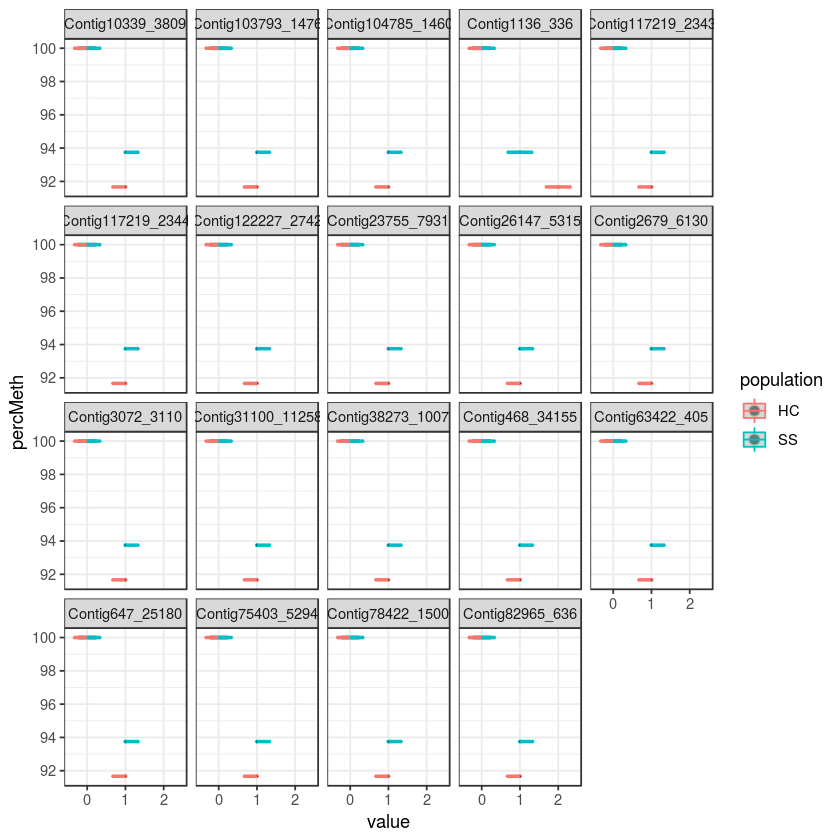

In [26]:
loci = "Contig63502_10530_10530"
m <- perc_meth %>% filter(site==loci)
s <- meS$trans$eqtls[which(meS$trans$eqtls$gene == loci & meS$trans$eqtls$FDR < 0.05),]$snps

g <- as.data.frame(t(geno[geno$id %in% s,]),stringsAsFactors = F)
colnames(g) <- g[1,]
g$sample <- rownames(g)
g <- g[-1,]
merge(m,g) %>% tidyr::gather("id","value",9:ncol(merge(m,g))) %>%
ggplot(., aes(value, percMeth,colour=population)) + 
        geom_dotplot(binaxis='y', stackdir='center',dotsize=0.6) +
        geom_boxplot(outlier.size=0, alpha=0.6, fill="grey") +
        facet_wrap(~id) + theme_bw()

In [2]:
# how many trans-meth in Cpg-snp
js("bedtools window -w 350 -u -a ../analyses/2bRAD/mQTL/meth_mbd_maf05_sites_transF05.bed -b ../analyses/2bRAD/MethGen/cpgsnps.bed  >  ../analyses/2bRAD/mQTL/trans-meth-cpgsnp.bed")
js("wc -l ../analyses/2bRAD/mQTL/trans-meth-cpgsnp.bed")


0 ../analyses/2bRAD/mQTL/trans-meth-cpgsnp.bed


In [7]:
# how many background meth in Cpg-snp
js("bedtools window -w 350 -u -a ../analyses/2bRAD/mQTL/meth_allsites_mbd.bed -b ../analyses/2bRAD/MethGen/cpgsnps.bed  >  ../analyses/2bRAD/mQTL/background-meth-cpgsnp.bed")
js("wc -l ../analyses/2bRAD/mQTL/background-meth-cpgsnp.bed")


43 ../analyses/2bRAD/mQTL/background-meth-cpgsnp.bed


In [9]:
# how many trans-meth in nonCpg-snp
js("bedtools window -w 350 -u -a ../analyses/2bRAD/mQTL/meth_mbd_maf05_sites_transF05.bed -b ../analyses/2bRAD/Inputs/non-cpgsnps.bed   >  ../analyses/2bRAD/mQTL/trans-meth-noncpgsnp.bed")
js("wc -l ../analyses/2bRAD/mQTL/trans-meth-noncpgsnp.bed")


1 ../analyses/2bRAD/mQTL/trans-meth-noncpgsnp.bed


In [51]:
# how many background meth in non Cpg-snp
js("bedtools window -w 350 -u -a ../analyses/2bRAD/mQTL/meth_allsites_mbd.bed -b ../analyses/2bRAD/Inputs/non-cpgsnps.bed  >  ../analyses/2bRAD/mQTL/background-meth-noncpgsnp.bed")
js("wc -l ../analyses/2bRAD/mQTL/background-meth-noncpgsnp.bed")


164 ../analyses/2bRAD/mQTL/background-meth-noncpgsnp.bed


### 0 trans-meth sites are near cpg-snps, cpg snps enriched in cis meth relative to trans meth

In [10]:
Input=("
mqtl    cpgsnp noncpgsnp
transm   0      1
nontransm 43    163
")

In [11]:
Matriz = as.matrix(read.table(textConnection(Input),
                   header=TRUE, 
                   row.names=1))
fisher.test(Matriz,alternative = "two.sided")


	Fisher's Exact Test for Count Data

data:  Matriz
p-value = 1
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
   0.0000 148.4016
sample estimates:
odds ratio 
         0 


### meth sites near cis-mqtls enriched for cpg-snps over meth sites near trans-mqtls

In [12]:
Input=("
cpgsnp  cis  trans 
mqtl   6      0
nonmqtl  16    43
")

In [13]:
Matriz = as.matrix(read.table(textConnection(Input),
                   header=TRUE, 
                   row.names=1))
fisher.test(Matriz,alternative = "two.sided")


	Fisher's Exact Test for Count Data

data:  Matriz
p-value = 0.0009033
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 2.727558      Inf
sample estimates:
odds ratio 
       Inf 


### cis vs trans near a CpG-SNP 

In [6]:
Input=("
loc    cis trans
mqtl   6     0
nomqtl 16    43
")
Matriz = as.matrix(read.table(textConnection(Input),
                   header=TRUE, 
                   row.names=1))
fisher.test(Matriz,alternative = "two.sided")


	Fisher's Exact Test for Count Data

data:  Matriz
p-value = 0.0009033
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 2.727558      Inf
sample estimates:
odds ratio 
       Inf 


In [7]:
Matriz

cis trans
mqtl    6   0   
nomqtl 16  43

### tested meth sites with a cpg-snp

In [11]:
#shouls all add up to 33738
cis.cpg = 22
trans.cpg = 43

Input=("
loc    cis trans
cpg    22     43
npcpg  1487    33695
")

Matriz = as.matrix(read.table(textConnection(Input),
                   header=TRUE, 
                   row.names=1))
fisher.test(Matriz,alternative = "two.sided")


	Fisher's Exact Test for Count Data

data:  Matriz
p-value = 1.4e-14
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
  6.585298 19.863602
sample estimates:
odds ratio 
  11.58959 


In [12]:
Matriz

cis  trans
cpg     22    43
npcpg 1487 33695

### unique meth sites with a mQTL

In [22]:
Input=("
loc    mQTL nomQTL
cis 121     1388
trans 362    31988
")
Matriz = as.matrix(read.table(textConnection(Input),
                   header=TRUE, 
                   row.names=1))
fisher.test(Matriz,alternative = "two.sided")


	Fisher's Exact Test for Count Data

data:  Matriz
p-value < 2.2e-16
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 6.172463 9.558390
sample estimates:
odds ratio 
  7.703465 


In [23]:
Matriz

mQTL nomQTL
cis   121   1388 
trans 362  31988

## methQTLs and DML/DMG overlap 
* What percent of local methQTLs near a DML vs non local mQTLS ? : 14.9% v 10.5%, not significant

In [13]:
# how many DMLs near a local methQTL meth site
js("bedtools window -w 350 -u -a ../analyses/2bRAD/mQTL/meth_mbd_maf05_sites_cis.bed -b ../analyses/DMLs/dml25_forIGV.bed > ../analyses/2bRAD/mQTL/cis-meth-DMLs-350bp.bed")
js("wc -l ../analyses/2bRAD/mQTL/cis-meth-DMLs-350bp.bed")


18 ../analyses/2bRAD/mQTL/cis-meth-DMLs-350bp.bed


In [14]:
# how many background cis meth 
js("bedtools window -w 350 -u -a ../analyses/2bRAD/mQTL/snpBmethA_50kb.txt -b ../analyses/DMLs/dml25_forIGV.bed  >  ../analyses/2bRAD/mQTL/background-cismeth-DMLs-350bp.bed")
js("wc -l ../analyses/2bRAD/mQTL/background-cismeth-DMLs-350bp.bed")


139 ../analyses/2bRAD/mQTL/background-cismeth-DMLs-350bp.bed


In [16]:
139-18
(1509-362)-121

[1] 121

[1] 1026

In [17]:
Input=("
loc    mQTL nonmQTL
DML    18    121
nonDML  103   1026
")
Matriz = as.matrix(read.table(textConnection(Input),
                   header=TRUE, 
                   row.names=1))
fisher.test(Matriz,alternative = "two.sided")


	Fisher's Exact Test for Count Data

data:  Matriz
p-value = 0.1669
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.8155921 2.5645514
sample estimates:
odds ratio 
  1.481304 


In [18]:
Matriz

mQTL nonmQTL
DML     18   121   
nonDML 103  1026

In [19]:
js("cat ../analyses/2bRAD/mQTL/cis-meth-DMLs-350bp.bed")

Contig173	13455	13455
Contig31124	5961	5961
Contig173	13500	13500
Contig18086	7978	7978
Contig7105	298	298
Contig24692	5520	5520
Contig173	13682	13682
Contig52148	10814	10814
Contig18086	7792	7792
Contig168159	621	621
Contig82938	2352	2352
Contig173	13651	13651
Contig168159	846	846
Contig168159	859	859
Contig7105	701	701
Contig39605	22761	22761
Contig47538	12037	12037
Contig18086	7781	7781


In [21]:
js("bedtools intersect -a ../analyses/2bRAD/mQTL/cis-meth-DMLs-350bp.bed -wb -b ../genome-features/Olurida_v081-20190709.gene.2kbslop.gff")


Contig31124	5961	5961	Contig31124	maker	gene	1	8078	.	+	.	ID=OLUR_00022522;Name=OLUR_00022522;Alias=maker-Contig31124-snap-gene-0.2;Note=Similar to Chdh: Choline dehydrogenase%2C mitochondrial (Mus musculus OX%3D10090);Dbxref=CDD:cd01427,Gene3D:G3DSA:3.30.560.10,Gene3D:G3DSA:3.40.50.1000,Gene3D:G3DSA:3.50.50.60,InterPro:IPR000172,InterPro:IPR006439,InterPro:IPR007867,InterPro:IPR023214,InterPro:IPR036188,InterPro:IPR036412,MobiDBLite:mobidb-lite,Pfam:PF00732,Pfam:PF05199,Pfam:PF13419,ProSitePatterns:PS00623,ProSitePatterns:PS00624,SUPERFAMILY:SSF51905,SUPERFAMILY:SSF54373,SUPERFAMILY:SSF56784,TIGRFAM:TIGR01549;Ontology_term=GO:0016614,GO:0016787,GO:0050660,GO:0055114;SPID=Q8BJ64;
Contig18086	7978	7978	Contig18086	maker	gene	1	10669	.	+	.	ID=OLUR_00020258;Name=OLUR_00020258;Alias=maker-Contig18086-snap-gene-0.2;Note=Similar to PRICKLE2: Prickle-like protein 2 (Homo sapiens OX%3D9606);Dbxref=CDD:cd09340,CDD:cd09418,CDD:cd09420,CDD:cd09827,Gene3D:G3DSA:2.10.110.10,InterPro:IPR001781,Inter

In [38]:
library(dplyr)
library(ggplot2)

In [28]:
geno <- read.table("../analyses/2bRAD/mQTL/MBD_HCSS_Afilt32m70_maf05_m2pop_format.tab",header = T)

In [32]:
geno %>% mutate_if(is.factor, as.character) -> geno

In [39]:
loci = "Contig31124_5961_5961"
m <- perc_meth %>% filter(site==loci)
s <- meS$cis$eqtls[which(meS$cis$eqtls$gene == loci),]$snps

g <- as.data.frame(t(geno[geno$id %in% s,]),stringsAsFactors = F)
colnames(g) <- g[1,]
g$sample <- rownames(g)
g <- g[-1,]
merge(m,g) %>% tidyr::gather("id","value",9:ncol(merge(m,g))) %>%
ggplot(., aes(value, percMeth,colour=population)) + 
        geom_dotplot(binaxis='y', stackdir='center',dotsize=0.6) +
        geom_boxplot(outlier.size=0, alpha=0.6, fill="grey") +
        facet_wrap(~id) + theme_bw() + ggtitle(paste0(loci," DML and cis-mQTL"))

Bin width defaults to 1/30 of the range of the data. Pick better value with `binwidth`.

Warning message:
“Removed 1 rows containing non-finite values (stat_bindot).”
Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”


In [41]:
loci = "Contig18086_7978_7978"
m <- perc_meth %>% filter(site==loci)
s <- meS$cis$eqtls[which(meS$cis$eqtls$gene == loci),]$snps

g <- as.data.frame(t(geno[geno$id %in% s,]),stringsAsFactors = F)
colnames(g) <- g[1,]
g$sample <- rownames(g)
g <- g[-1,]
merge(m,g) %>% tidyr::gather("id","value",9:ncol(merge(m,g))) %>%
ggplot(., aes(value, percMeth,colour=population)) + 
        geom_dotplot(binaxis='y', stackdir='center',dotsize=0.6) +
        geom_boxplot(outlier.size=0, alpha=0.6, fill="grey") +
        facet_wrap(~id) + theme_bw() + ggtitle(paste0(loci," DML and cis-mQTL"))

Bin width defaults to 1/30 of the range of the data. Pick better value with `binwidth`.



In [43]:
loci = "Contig18086_7781_7781"
m <- perc_meth %>% filter(site==loci)
s <- meS$cis$eqtls[which(meS$cis$eqtls$gene == loci),]$snps

g <- as.data.frame(t(geno[geno$id %in% s,]),stringsAsFactors = F)
colnames(g) <- g[1,]
g$sample <- rownames(g)
g <- g[-1,]
merge(m,g) %>% tidyr::gather("id","value",9:ncol(merge(m,g))) %>%
ggplot(., aes(value, percMeth,colour=population)) + 
        geom_dotplot(binaxis='y', stackdir='center',dotsize=0.6) +
        geom_boxplot(outlier.size=0, alpha=0.6, fill="grey") +
        facet_wrap(~id) + theme_bw() + ggtitle(paste0(loci," DML and cis-mQTL"))

Bin width defaults to 1/30 of the range of the data. Pick better value with `binwidth`.

Warning message:
“Removed 3 rows containing non-finite values (stat_bindot).”
Warning message:
“Removed 3 rows containing non-finite values (stat_boxplot).”


In [42]:
loci = "Contig18086_7792_7792"
m <- perc_meth %>% filter(site==loci)
s <- meS$cis$eqtls[which(meS$cis$eqtls$gene == loci),]$snps

g <- as.data.frame(t(geno[geno$id %in% s,]),stringsAsFactors = F)
colnames(g) <- g[1,]
g$sample <- rownames(g)
g <- g[-1,]
merge(m,g) %>% tidyr::gather("id","value",9:ncol(merge(m,g))) %>%
ggplot(., aes(value, percMeth,colour=population)) + 
        geom_dotplot(binaxis='y', stackdir='center',dotsize=0.6) +
        geom_boxplot(outlier.size=0, alpha=0.6, fill="grey") +
        facet_wrap(~id) + theme_bw() + ggtitle(paste0(loci," DML and cis-mQTL"))

Bin width defaults to 1/30 of the range of the data. Pick better value with `binwidth`.

Warning message:
“Removed 3 rows containing non-finite values (stat_bindot).”
Warning message:
“Removed 3 rows containing non-finite values (stat_boxplot).”


In [ ]:
Contig173	13455	13455
Contig31124	5961	5961
Contig173	13500	13500
Contig168159	621	621
Contig82938	2352	2352
Contig39605	22761	22761

ERROR while rich displaying an object: Error: Faceting variables must have at least one value

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste

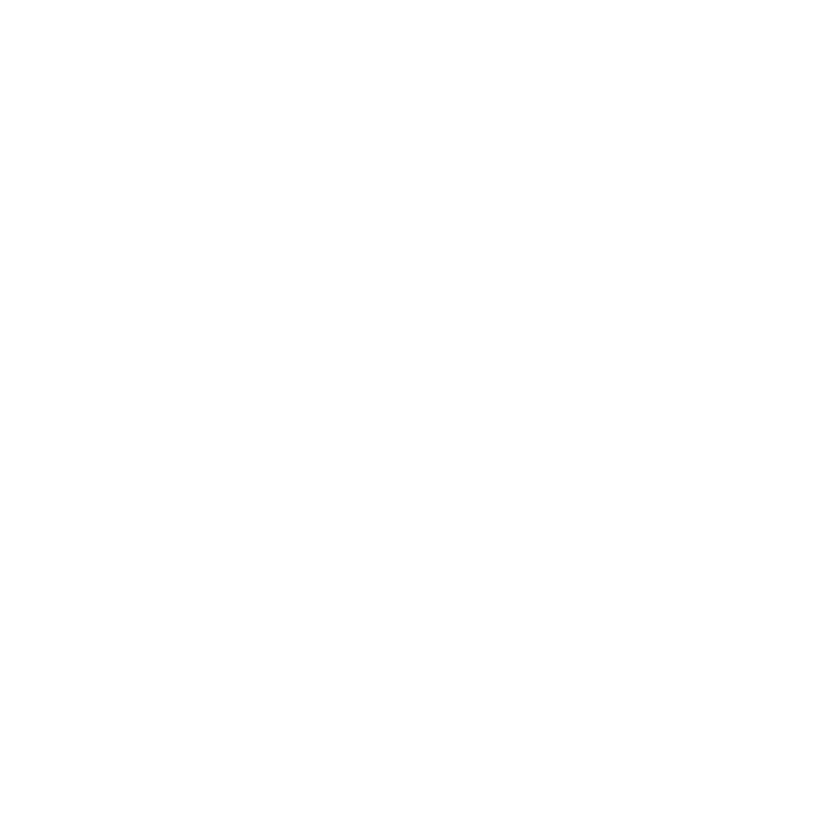

In [40]:
loci = "Contig173_13455_13455"
m <- perc_meth %>% filter(site==loci)
s <- meS$cis$eqtls[which(meS$cis$eqtls$gene == loci),]$snps

g <- as.data.frame(t(geno[geno$id %in% s,]),stringsAsFactors = F)
colnames(g) <- g[1,]
g$sample <- rownames(g)
g <- g[-1,]
merge(m,g) %>% tidyr::gather("id","value",9:ncol(merge(m,g))) %>%
ggplot(., aes(value, percMeth,colour=population)) + 
        geom_dotplot(binaxis='y', stackdir='center',dotsize=0.6) +
        geom_boxplot(outlier.size=0, alpha=0.6, fill="grey") +
        facet_wrap(~id) + theme_bw() + ggtitle(paste0(loci," DML and cis-mQTL"))

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 1 rows containing non-finite values (stat_bindot).”
Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”


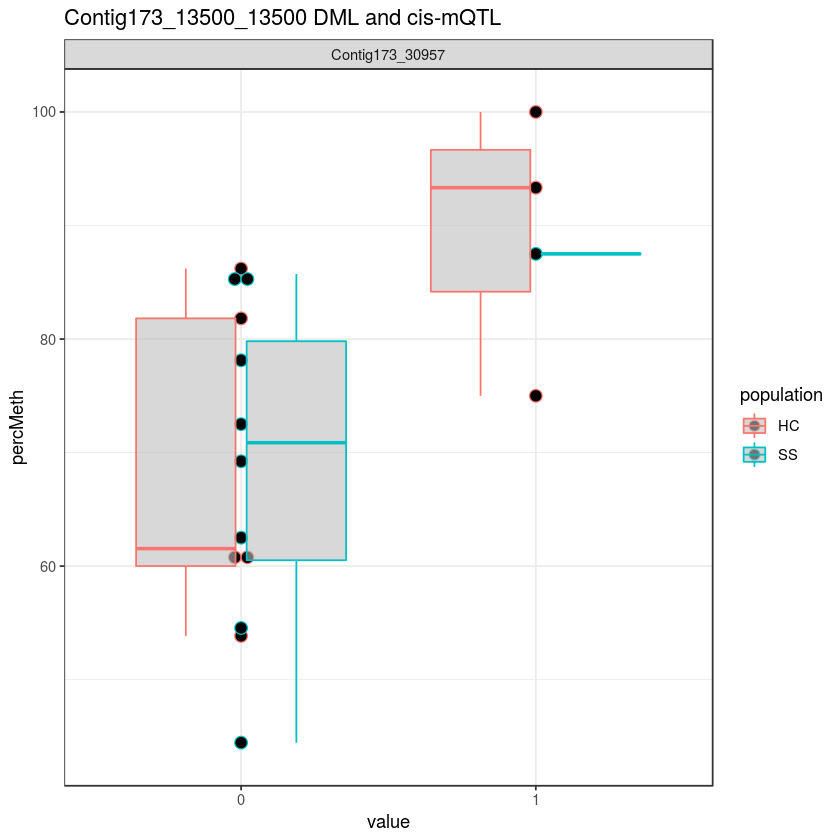

In [53]:
loci = "Contig173_13500_13500"
m <- perc_meth %>% filter(site==loci)
s <- meS$cis$eqtls[which(meS$cis$eqtls$gene == loci),]$snps

g <- as.data.frame(t(geno[geno$id %in% s,]),stringsAsFactors = F)
colnames(g) <- g[1,]
g$sample <- rownames(g)
g <- g[-1,]
merge(m,g) %>% tidyr::gather("id","value",9:ncol(merge(m,g))) %>%
ggplot(., aes(value, percMeth,colour=population)) + 
        geom_dotplot(binaxis='y', stackdir='center',dotsize=0.6) +
        geom_boxplot(outlier.size=0, alpha=0.6, fill="grey") +
        facet_wrap(~id) + theme_bw() + ggtitle(paste0(loci," DML and cis-mQTL"))

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 4 rows containing non-finite values (stat_bindot).”
Warning message:
“Removed 4 rows containing non-finite values (stat_boxplot).”


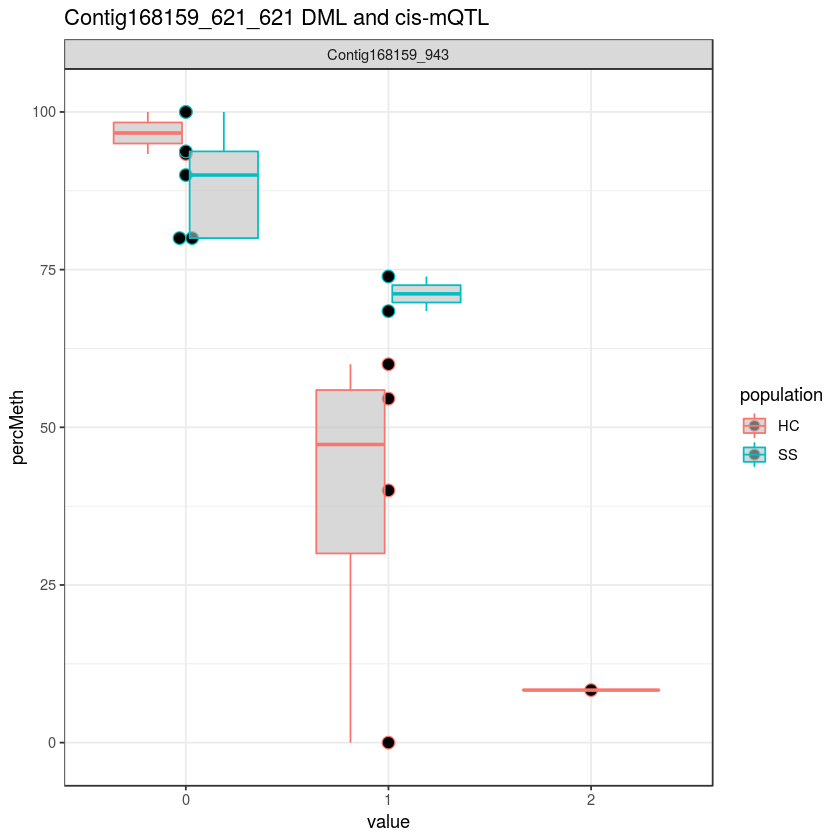

In [54]:
loci = "Contig168159_621_621"
m <- perc_meth %>% filter(site==loci)
s <- meS$cis$eqtls[which(meS$cis$eqtls$gene == loci),]$snps

g <- as.data.frame(t(geno[geno$id %in% s,]),stringsAsFactors = F)
colnames(g) <- g[1,]
g$sample <- rownames(g)
g <- g[-1,]
merge(m,g) %>% tidyr::gather("id","value",9:ncol(merge(m,g))) %>%
ggplot(., aes(value, percMeth,colour=population)) + 
        geom_dotplot(binaxis='y', stackdir='center',dotsize=0.6) +
        geom_boxplot(outlier.size=0, alpha=0.6, fill="grey") +
        facet_wrap(~id) + theme_bw() + ggtitle(paste0(loci," DML and cis-mQTL"))

* What percent of DMLs overall are associated with a distant mqtl vs non overall dmls

In [22]:
js("bedtools window -w 350 -u -a ../analyses/2bRAD/mQTL/meth_allsites_mbd.bed -b ../analyses/DMLs/dml25_forIGV.bed >  ../analyses/2bRAD/mQTL/background-meth-DML-350bp.bed")
js("wc -l ../analyses/2bRAD/mQTL/background-meth-DML-350bp.bed")


2112 ../analyses/2bRAD/mQTL/background-meth-DML-350bp.bed


In [23]:
# how many DMLs near a distant methQTL meth site
js("bedtools window -w 350 -u -a ../analyses/2bRAD/mQTL/meth_mbd_maf05_sites_transF05.bed -b ../analyses/DMLs/dml25_forIGV.bed > ../analyses/2bRAD/mQTL/trans-meth-DMLs-350bp.bed")
js("wc -l ../analyses/2bRAD/mQTL/trans-meth-DMLs-350bp.bed")


12 ../analyses/2bRAD/mQTL/trans-meth-DMLs-350bp.bed


### are proportion of local mQTL with DML higher than distant mQTL with DML? yes (14.9% vs 3.3%)

In [14]:
Input=("
DML    local distant
mQ     18      12
nmQ  139   2112
")

In [15]:

Matriz = as.matrix(read.table(textConnection(Input),
                   header=TRUE, 
                   row.names=1))
fisher.test(Matriz,alternative = "two.sided")


	Fisher's Exact Test for Count Data

data:  Matriz
p-value = 1.965e-14
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 10.11296 52.78938
sample estimates:
odds ratio 
  22.69976 


In [26]:
js("cat ../analyses/2bRAD/mQTL/trans-meth-DMLs-350bp.bed")

Contig32656	11956	11956
Contig48322	769	769
Contig34596	13436	13436
Contig152	9299	9299
Contig158671	1771	1771
Contig31171	23860	23860
Contig128000	3308	3308
Contig9165	801	801
Contig857	14584	14584
Contig62898	1215	1215
Contig47816	2372	2372
Contig17966	14589	14589


In [27]:
js("bedtools intersect -a ../analyses/2bRAD/mQTL/trans-meth-DMLs-350bp.bed -wb -b ../genome-features/Olurida_v081-20190709.gene.2kbslop.gff")


Contig32656	11956	11956	Contig32656	maker	gene	3107	13766	.	-	.	ID=OLUR_00016774;Name=OLUR_00016774;Alias=maker-Contig32656-snap-gene-0.3;Note=Protein of unknown function;Dbxref=MobiDBLite:mobidb-lite;
Contig34596	13436	13436	Contig34596	maker	gene	10571	27315	.	+	.	ID=OLUR_00006369;Name=OLUR_00006369;Alias=maker-Contig34596-snap-gene-0.4;Note=Protein of unknown function;Dbxref=MobiDBLite:mobidb-lite;
Contig152	9299	9299	Contig152	maker	gene	4965	37832	.	-	.	ID=OLUR_00002517;Name=OLUR_00002517;Alias=snap_masked-Contig152-processed-gene-0.3;Note=Similar to ahctf1: Protein ELYS (Xenopus laevis OX%3D8355);Dbxref=Coils:Coil,InterPro:IPR025151,InterPro:IPR032040,MobiDBLite:mobidb-lite,Pfam:PF13934,Pfam:PF16687;SPID=Q5U249;
Contig31171	23860	23860	Contig31171	maker	gene	1	40835	.	-	.	ID=OLUR_00000353;Name=OLUR_00000353;Alias=maker-Contig31171-snap-gene-0.6;Note=Similar to Crocc: Rootletin (Mus musculus OX%3D10090);Dbxref=Coils:Coil,Gene3D:G3DSA:1.20.5.340,MobiDBLite:mobidb-lite,Pfam:PF15035,